## Analyse final list of mutations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', module='seaborn')
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
samples = ['AQ5180','AQ5186','AQ5174','AX4954','AX4955','AX4956','AX4957','AX4962','AX4963','AX4964','AX4965','AX4966']
tissues = ['tumor1', 'tumor2', 'blood', 'kidney', 'liver', 'pancreas', 'heart','lung','medulla','spleen','brain','bma']
samples_dict = {samples[i]:tissues[i] for i in range(0,len(samples))}
suffixes_dict = {'tumor1':'_t1','tumor2':'_t2','blood':'_b','kidney':'_k','liver':'_l','pancreas':'_p','heart':'_h','lung':'_lu','medulla':'_me','spleen':'_s','brain':'_br','bma':'_bm'}

In [5]:
def density_plot (data,y_var,title,xlim_min,xlim_max, bins=100):
    '''Create density plot for CCF
    input: tumor data, title and xlim max
    output: plot()'''
    
    data = data[(~data[y_var].isnull())]
    data = data[y_var]
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 2)
    ax = sns.distplot(data,rug=True,bins=bins)
    ax.set_title(title,size=20,pad=20)
    ax.set_xlim(xlim_min,xlim_max)

In [33]:
df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_muts_final.tsv.gz',sep='\t')
df

CHROM        POS   REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
0     chr1     865445     G   C     NaN    False      snv      81.0     136.0   
1     chr1    4101122     G   T     NaN    False      snv      81.0     117.0   
2     chr1    4352976     G   A     NaN    False      snv      73.0     121.0   
3     chr1    7591505     T   C     NaN    False      snv      75.0     121.0   
4     chr1    7983849     G   T     NaN    False      snv      76.0     125.0   
...    ...        ...   ...  ..     ...      ...      ...       ...       ...   
2381  chrX   16318693     A   -     NaN    False    indel      88.0     111.0   
2382  chrX   23394410  ACAC   -     NaN    False    indel      97.0     123.0   
2383  chrX   23394410    AC   -     NaN    False    indel      97.0     123.0   
2384  chrX   41403630  TATT   -     NaN    False    indel     132.0     125.0   
2385  chrX  153583477     T   A     NaN    False      snv     113.0     129.0   

      depth_b  ...  EAS_AF  EUR_AF  SAS_AF  CLIN_SIG  SOMATIC  PHENO  \
0       128.0  ...     NaN     NaN     NaN       NaN      NaN    NaN   
1       134.0  ...       -       -       -         -        -      -   
2       126.0  ...     NaN     NaN     NaN       NaN      NaN    NaN   
3       129.0  ...       -       -       -         -        -      -   
4       127.0  ...       -       -       -         -        -      -   
...       ...  ...     ...     ...     ...       ...      ...    ...   
2381    131.0  ...       -       -       -         -        -      -   
2382    121.0  ...       -       -       -         -        -      -   
2383    121.0  ...       -       -       -         -        -      -   
2384    130.0  ...       -       -       -         -        -      -   
2385    123.0  ...       -       -       -         -        -      -   

                       gnomADg  gnomADg_AF  gnomADg_NFE  Change  
0                          NaN         NaN          NaN     NaN  
1                            -    0.000000            -     G/T  
2                          NaN         NaN          NaN     NaN  
3                            -    0.000000            -     T/C  
4                            -    0.000000            -     G/T  
...                        ...         ...          ...     ...  
2381              rs1229315805    0.015355            -     A/-  
2382              rs1434371549    0.006857            -  ACAC/-  
2383              rs1311221502    0.022496            -    AC/-  
2384               rs758164281    0.067212            -  TATT/-  
2385  chrX:153583477-153583477    0.000794            -     T/A  

[2386 rows x 220 columns]

## Number of shared mutations

In [34]:
list(df)

['CHROM',
 'POS',
 'REF',
 'ALT',
 '_merge',
 'parents',
 'mut_type',
 'depth_t1',
 'depth_t2',
 'depth_b',
 'depth_k',
 'depth_l',
 'depth_p',
 'depth_h',
 'depth_lu',
 'depth_me',
 'depth_s',
 'depth_br',
 'depth_bm',
 'filter_depth_t1',
 'filter_depth_t2',
 'filter_depth_b',
 'filter_depth_k',
 'filter_depth_l',
 'filter_depth_p',
 'filter_depth_h',
 'filter_depth_lu',
 'filter_depth_me',
 'filter_depth_s',
 'filter_depth_br',
 'filter_depth_bm',
 'filter_depth_all',
 'AF_t1',
 'ref_reads_t1',
 'alt_reads_t1',
 'DP_t1',
 'AF_t2',
 'ref_reads_t2',
 'alt_reads_t2',
 'DP_t2',
 'AF_b',
 'ref_reads_b',
 'alt_reads_b',
 'DP_b',
 'AF_k',
 'ref_reads_k',
 'alt_reads_k',
 'DP_k',
 'AF_l',
 'ref_reads_l',
 'alt_reads_l',
 'DP_l',
 'AF_p',
 'ref_reads_p',
 'alt_reads_p',
 'DP_p',
 'AF_h',
 'ref_reads_h',
 'alt_reads_h',
 'DP_h',
 'AF_lu',
 'ref_reads_lu',
 'alt_reads_lu',
 'DP_lu',
 'AF_me',
 'ref_reads_me',
 'alt_reads_me',
 'DP_me',
 'AF_s',
 'ref_reads_s',
 'alt_reads_s',
 'DP_s',
 'AF_br',

In [35]:
#no common clonal mutations between tumor1 and tumor2
af_cols = ['AF'+suffixes_dict[tissue] for tissue in tissues]
df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)&(df['n_tissues']==2)]

AF_t1   AF_t2  AF_b  AF_k  AF_l  AF_p  AF_h  AF_lu  AF_me  AF_s  AF_br  \
72    0.4404  0.0112   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
138   0.3846  0.0074   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
264   0.3039  0.0082   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
282   0.0078  0.2429   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
351   0.4219  0.0067   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
416   0.4717  0.0078   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
417   0.3421  0.0068   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
527   0.4530  0.0092   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
701   0.4483  0.0085   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
713   0.3106  0.0070   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
878   0.4175  0.0076   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
880   0.2695  0.0095   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1117  0.4239  0.0078   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1272  0.4151  0.0071   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1365  0.3790  0.0081   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1475  0.2764  0.0067   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1571  0.3932  0.0087   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1580  0.2903  0.0148   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1639  0.3643  0.0079   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1772  0.3578  0.0073   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1997  0.3982  0.0067   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
1999  0.2931  0.0068   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
2013  0.0086  0.3435   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
2120  0.3491  0.0148   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
2166  0.4074  0.0078   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
2183  0.3853  0.0081   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
2218  0.3036  0.0080   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   
2220  0.3672  0.0081   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0    0.0   

      AF_bm  
72      0.0  
138     0.0  
264     0.0  
282     0.0  
351     0.0  
416     0.0  
417     0.0  
527     0.0  
701     0.0  
713     0.0  
878     0.0  
880     0.0  
1117    0.0  
1272    0.0  
1365    0.0  
1475    0.0  
1571    0.0  
1580    0.0  
1639    0.0  
1772    0.0  
1997    0.0  
1999    0.0  
2013    0.0  
2120    0.0  
2166    0.0  
2183    0.0  
2218    0.0  
2220    0.0

In [47]:
#mutations de novo germline
df1 = df[af_cols][(df['AF_t1']>0.25)&(df['AF_t2']>0.2)&(df['denovo_germline']==True)&(df['n_tissues']==12)]
print(len(df1))
df1

84


AF_t1   AF_t2    AF_b    AF_k    AF_l    AF_p    AF_h   AF_lu   AF_me  \
23    0.8261  0.4818  0.4403  0.3986  0.5435  0.5526  0.4560  0.4783  0.5065   
42    0.8767  0.5652  0.4365  0.4922  0.5154  0.3778  0.5537  0.4841  0.4571   
57    0.8367  0.5591  0.5221  0.5354  0.4426  0.5448  0.5625  0.5000  0.6714   
129   0.4603  0.4444  0.3622  0.3429  0.3245  0.4296  0.3226  0.3471  0.3158   
137   0.5603  0.5000  0.4859  0.4583  0.4783  0.4846  0.4646  0.4435  0.5246   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2233  0.4174  0.4308  0.5909  0.5573  0.4365  0.6304  0.4433  0.5397  0.4800   
2255  0.4771  0.5909  0.3952  0.5344  0.5500  0.5484  0.5000  0.5224  0.5692   
2292  0.4194  0.5570  0.5607  0.4891  0.4538  0.5221  0.4095  0.5043  0.5556   
2312  0.5943  0.6557  0.5678  0.5804  0.5500  0.5664  0.5300  0.5545  0.4930   
2379  0.3421  0.3023  0.3294  0.3412  0.2766  0.3735  0.3226  0.3646  0.4754   

        AF_s   AF_br   AF_bm  
23    0.4362  0.4741  0.5122  
42    0.3562  0.5690  0.4899  
57    0.5411  0.4796  0.5694  
129   0.2979  0.3220  0.3653  
137   0.4961  0.4727  0.5563  
...      ...     ...     ...  
2233  0.5646  0.5045  0.5603  
2255  0.5305  0.3905  0.4184  
2292  0.4476  0.4505  0.4437  
2312  0.5062  0.5213  0.5273  
2379  0.2766  0.4426  0.2870  

[84 rows x 12 columns]

In [44]:
#mutations clonal in tumor1
df1 = df[af_cols][(df['AF_t1']>0.25)]
print(len(df1))
df1

997


AF_t1   AF_t2    AF_b    AF_k    AF_l    AF_p    AF_h   AF_lu   AF_me  \
5     0.6538  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
11    0.6481  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
21    0.7455  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
23    0.8261  0.4818  0.4403  0.3986  0.5435  0.5526  0.4560  0.4783  0.5065   
26    0.5942  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2377  0.2889  0.0097  0.0093  0.0077  0.0103  0.0109  0.0208  0.0658  0.1837   
2379  0.3421  0.3023  0.3294  0.3412  0.2766  0.3735  0.3226  0.3646  0.4754   
2382  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2383  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2384  0.3100  0.2551  0.2347  0.3115  0.2527  0.3474  0.2816  0.2844  0.3137   

        AF_s   AF_br   AF_bm  
5     0.0000  0.0000  0.0068  
11    0.0000  0.0000  0.0000  
21    0.0000  0.0000  0.0000  
23    0.4362  0.4741  0.5122  
26    0.0068  0.0000  0.0000  
...      ...     ...     ...  
2377  0.0263  0.0667  0.0084  
2379  0.2766  0.4426  0.2870  
2382  0.2655  0.3725  0.2987  
2383  0.2655  0.3725  0.2987  
2384  0.2761  0.2712  0.2353  

[997 rows x 12 columns]

In [45]:
#mutations clonal in tumor2
df1 = df[af_cols][(df['AF_t2']>0.2)]
print(len(df1))
df1

1491


AF_t1   AF_t2    AF_b    AF_k    AF_l    AF_p    AF_h   AF_lu   AF_me  \
0     0.0000  0.3015  0.0000  0.0263  0.0000  0.0000  0.0066  0.0070  0.0000   
1     0.0000  0.3162  0.0000  0.0161  0.0000  0.0000  0.0091  0.0076  0.0000   
2     0.0000  0.2727  0.0000  0.0070  0.0060  0.0000  0.0142  0.0000  0.0000   
3     0.0000  0.3306  0.0000  0.0082  0.0000  0.0000  0.0000  0.0000  0.0000   
4     0.0000  0.2960  0.0000  0.0077  0.0071  0.0000  0.0373  0.0000  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2381  0.1481  0.2029  0.1558  0.2051  0.1905  0.1486  0.2283  0.3108  0.2391   
2382  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2383  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2384  0.3100  0.2551  0.2347  0.3115  0.2527  0.3474  0.2816  0.2844  0.3137   
2385  0.1770  0.2093  0.1951  0.1742  0.1652  0.1984  0.2083  0.1009  0.0909   

        AF_s   AF_br   AF_bm  
0     0.0000  0.0000  0.0000  
1     0.0000  0.0000  0.0000  
2     0.0000  0.0066  0.0000  
3     0.0000  0.0000  0.0000  
4     0.0000  0.0000  0.0000  
...      ...     ...     ...  
2381  0.2297  0.2361  0.2024  
2382  0.2655  0.3725  0.2987  
2383  0.2655  0.3725  0.2987  
2384  0.2761  0.2712  0.2353  
2385  0.1157  0.0909  0.1000  

[1491 rows x 12 columns]

In [38]:
#mutations clonal in tumor1 and not present in kidney but not in others
df1 = df[af_cols][(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal unique RT')
df1 = df[af_cols][(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney')
df1 = df[af_cols][(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney and heart')
df1 = df[af_cols][(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney, heart and pancreas')
df1 = df[af_cols][(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney, heart, pancreas and liver')
df1 = df[af_cols][(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]
print(len(df1),'clonal RT and shared with kidney, heart, pancreas, liver and blood')

168 clonal unique RT
224 clonal RT and shared with kidney
422 clonal RT and shared with kidney and heart
106 clonal RT and shared with kidney, heart and pancreas
30 clonal RT and shared with kidney, heart, pancreas and liver
165 clonal RT and shared with kidney, heart, pancreas, liver and blood


In [40]:
#mutations clonal in tumor1 and not present in kidney but not in others
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal unique NB')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart and pancreas')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart, pancreas and kidney')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart, pancreas, kidney and blood')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]
print(len(df1),'clonal NB and shared with heart, pancreas, kidney, blood and liver')

703 clonal unique NB
30 clonal NB and shared with heart
4 clonal NB and shared with heart and pancreas
5 clonal NB and shared with heart, pancreas and kidney
0 clonal NB and shared with heart, pancreas, kidney and blood
165 clonal NB and shared with heart, pancreas, kidney, blood and liver


In [13]:
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)&(df['denovo_germline']==False)]
print(len(df1),'present in NB and RT')
df1

180 present in NB and RT


AF_t1   AF_t2    AF_b    AF_k    AF_l    AF_p    AF_h   AF_lu   AF_me  \
10    0.0114  0.2913  0.0074  0.0073  0.0000  0.0000  0.0077  0.0000  0.0000   
12    0.1406  0.3750  0.4074  0.3248  0.3167  0.5079  0.3459  0.3846  0.2958   
29    0.1124  0.3889  0.3944  0.3778  0.3594  0.4412  0.4236  0.3540  0.3733   
61    0.0448  0.4519  0.3214  0.2481  0.3221  0.3889  0.2522  0.2193  0.2414   
72    0.4404  0.0112  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2381  0.1481  0.2029  0.1558  0.2051  0.1905  0.1486  0.2283  0.3108  0.2391   
2382  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2383  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2384  0.3100  0.2551  0.2347  0.3115  0.2527  0.3474  0.2816  0.2844  0.3137   
2385  0.1770  0.2093  0.1951  0.1742  0.1652  0.1984  0.2083  0.1009  0.0909   

        AF_s   AF_br   AF_bm  
10    0.0000  0.0078  0.0000  
12    0.3377  0.3223  0.3904  
29    0.3818  0.3852  0.3226  
61    0.2583  0.2500  0.2993  
72    0.0000  0.0000  0.0000  
...      ...     ...     ...  
2381  0.2297  0.2361  0.2024  
2382  0.2655  0.3725  0.2987  
2383  0.2655  0.3725  0.2987  
2384  0.2761  0.2712  0.2353  
2385  0.1157  0.0909  0.1000  

[180 rows x 12 columns]

In [39]:
df1 = df[af_cols][(df['AF_t1']>0.25)&(df['AF_t2']>0.2)&(df['n_tissues']==7)&(df['denovo_germline']==False)]
print(len(df1),'clonals in NB and RT, present in all tissues')
df1 = df[af_cols][(df['AF_t1']>0.25)&(df['AF_t2']>0.2)&(df['n_tissues']==7)&(df['denovo_germline']==True)]
print(len(df1),'clonals in NB and RT, de novo germline')
df1 = df[af_cols][(df['AF_t1']>0.25)&(df['AF_t2']>0.2)]
print(len(df1),'clonals in NB and RT')

0 clonals in NB and RT, present in all tissues
0 clonals in NB and RT, de novo germline
102 clonals in NB and RT


## Shared mutations tumors and some tissues

In [14]:
alt_reads_cols = ['alt_reads'+suffixes_dict[sample] for sample in suffixes_dict.keys()]

In [15]:
#mutations clonal in both tumors, but not in all tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)&(df['n_tissues']!=7)]

SYMBOL              Consequence  alt_reads_t1  alt_reads_t2  \
10      KAZN           intron_variant             1            37   
12         -       intergenic_variant             9            48   
23     GRIK3           intron_variant            57            66   
29    ELAVL4           intron_variant            10            56   
42    SRSF11         missense_variant            64            78   
...      ...                      ...           ...           ...   
2381       -       intergenic_variant             8            14   
2382  PTCHD1      3_prime_UTR_variant            19            22   
2383  PTCHD1      3_prime_UTR_variant            19            22   
2384       -       intergenic_variant            31            25   
2385  ATP2B3  downstream_gene_variant            20            27   

      alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  alt_reads_h  \
10              1            1            0            0            1   
12             44           38           38           64           46   
23             59           57           75           84           57   
29             56           51           46           45           61   
42             55           63           67           51           67   
...           ...          ...          ...          ...          ...   
2381           12           16           16           11           21   
2382           25           23           30           24           28   
2383           25           23           30           24           28   
2384           23           38           23           33           29   
2385           24           23           19           25           25   

      alt_reads_lu  alt_reads_me  alt_reads_s  alt_reads_br  alt_reads_bm  
10               0             0            0             1             0  
12              40            21           52            39            57  
23              55            39           65            64            84  
29              40            28           63            47            40  
42              61            32           52            66            73  
...            ...           ...          ...           ...           ...  
2381            23            11           17            17            17  
2382            17            12           30            38            23  
2383            17            12           30            38            23  
2384            31            16           37            32            28  
2385            11             6           14            10             9  

[261 rows x 14 columns]

In [16]:
#mutations clonal in NB, not clonal in RT, and present in the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']==6)]

Empty DataFrame
Columns: [SYMBOL, Consequence, alt_reads_t1, alt_reads_t2, alt_reads_b, alt_reads_k, alt_reads_l, alt_reads_p, alt_reads_h, alt_reads_lu, alt_reads_me, alt_reads_s, alt_reads_br, alt_reads_bm]
Index: []

In [17]:
#mutations clonal in NB, not clonal in RT, and present in the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']<6)]

SYMBOL                                   Consequence  alt_reads_t1  \
5             -                            intergenic_variant            34   
11            -                            intergenic_variant            35   
21        CSMD2                                intron_variant            41   
26        KIF2C                                intron_variant            41   
38            -                            intergenic_variant            48   
...         ...                                           ...           ...   
2325          -                            intergenic_variant            47   
2327       AFF2                           3_prime_UTR_variant            34   
2328          -                            intergenic_variant            40   
2329  LINC00894  intron_variant,non_coding_transcript_variant            55   
2332          -                            intergenic_variant            43   

      alt_reads_t2  alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  \
5                0            0            0            0            0   
11               0            0            0            0            0   
21               0            0            0            0            0   
26               0            0            0            0            0   
38               0            0            0            0            0   
...            ...          ...          ...          ...          ...   
2325             0            0            0            0            0   
2327             0            0            0            0            0   
2328             0            0            0            0            0   
2329             0            0            0            0            0   
2332             0            0            0            0            0   

      alt_reads_h  alt_reads_lu  alt_reads_me  alt_reads_s  alt_reads_br  \
5               0             0             0            0             0   
11              0             0             0            0             0   
21              0             0             0            0             0   
26              0             0             0            1             0   
38              0             0             0            0             0   
...           ...           ...           ...          ...           ...   
2325            0             0             0            0             0   
2327            0             0             0            0             0   
2328            0             0             0            0             0   
2329            0             0             0            0             0   
2332            0             0             0            0             0   

      alt_reads_bm  
5                1  
11               0  
21               0  
26               0  
38               0  
...            ...  
2325             0  
2327             0  
2328             0  
2329             0  
2332             0  

[814 rows x 14 columns]

In [18]:
#mutations clonal in RT, not clonal in NB, and present in in the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['n_tissues']==6)]

SYMBOL                                   Consequence  alt_reads_t1  \
67             -                            intergenic_variant             0   
98         FCRLA                           3_prime_UTR_variant             0   
123            -                            intergenic_variant             0   
193          NaN                                           NaN             0   
288          NaN                                           NaN             0   
298     HNRNPKP3  intron_variant,non_coding_transcript_variant             0   
299      SLC35C1                         upstream_gene_variant             0   
336            -                            intergenic_variant             0   
372   AC006927.4  intron_variant,non_coding_transcript_variant             0   
460        KDM2B                                intron_variant             0   
482   AL354809.1  intron_variant,non_coding_transcript_variant             0   
517            -                            intergenic_variant             0   
551        MYO16                                intron_variant             0   
647         RYR3                                intron_variant             0   
705      CLEC16A                                intron_variant             0   
729        CRNDE            non_coding_transcript_exon_variant             0   
747         WWOX                                intron_variant             0   
785        MMP28                           3_prime_UTR_variant             0   
787        LYZL6                         upstream_gene_variant             0   
842            -                            intergenic_variant             0   
866         WDR7                                intron_variant             0   
903   AC074139.1                         upstream_gene_variant             0   
1010           -                            intergenic_variant             0   
1073           -                            intergenic_variant             0   
1150           -                            intergenic_variant             0   
1175           -                            intergenic_variant             0   
1217         NaN                                           NaN             0   
1227        FGD5                                intron_variant             0   
1238         NaN                                           NaN             0   
1248      ZNF589                                intron_variant             0   
1254       WNT5A                           3_prime_UTR_variant             0   
1609  AC091987.1  intron_variant,non_coding_transcript_variant             0   
1628       HINT1                         upstream_gene_variant             0   
1694           -                            intergenic_variant             0   
1770       LAMA2                                intron_variant             0   
1790         NaN                                           NaN             0   
1832           -                            intergenic_variant             0   
1943    MRPL49P2                         upstream_gene_variant             0   
1949           -                            intergenic_variant             0   
1959    LEPROTL1                                intron_variant             0   
1998         NaN                                           NaN             0   
2001           -                            intergenic_variant             0   
2043        EXT1                                intron_variant             0   
2078  AL583785.1  intron_variant,non_coding_transcript_variant             0   
2154    ADAMTS13                                intron_variant             0   

      alt_reads_t2  alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  \
67              42            1            2            0            0   
98              38            0            1            1            0   
123             28            0            3            0            1   
193             36            0  

In [19]:
#mutations clonal in RT, not clonal in NB, and present in in the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['n_tissues']<6)]

SYMBOL              Consequence  alt_reads_t1  alt_reads_t2  \
0        NaN                      NaN             0            41   
1          -       intergenic_variant             0            37   
2        NaN                      NaN             0            33   
3     CAMTA1           intron_variant             0            40   
4      PARK7           intron_variant             0            37   
...      ...                      ...           ...           ...   
2321       -       intergenic_variant             0            28   
2326       -       intergenic_variant             0            35   
2330     NaN                      NaN             0            34   
2331  CD99L2           intron_variant             0            38   
2333  FAM50A  downstream_gene_variant             0            31   

      alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  alt_reads_h  \
0               0            4            0            0            1   
1               0            2            0            0            1   
2               0            1            1            0            2   
3               0            1            0            0            0   
4               0            1            1            0            5   
...           ...          ...          ...          ...          ...   
2321            0            1            0            0            0   
2326            0            0            0            0            2   
2330            0            4            0            0            2   
2331            0            4            0            0            2   
2333            0            0            0            1            0   

      alt_reads_lu  alt_reads_me  alt_reads_s  alt_reads_br  alt_reads_bm  
0                1             0            0             0             0  
1                1             0            0             0             0  
2                0             0            0             1             0  
3                0             0            0             0             0  
4                0             0            0             0             0  
...            ...           ...          ...           ...           ...  
2321             0             0            0             0             0  
2326             0             0            0             0             0  
2330             1             0            0             1             0  
2331             1             0            0             0             0  
2333             1             0            0             0             0  

[1246 rows x 14 columns]

In [20]:
#mutations clonal in NB, not clonal in RT, and present some of the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']==5)]

SYMBOL                                   Consequence  alt_reads_t1  \
572            -                            intergenic_variant            54   
766         STX8                                intron_variant            32   
997            -                            intergenic_variant            46   
1377      STK32B                                intron_variant            36   
1603       PCSK1                         upstream_gene_variant            22   
1650  AC010476.2  intron_variant,non_coding_transcript_variant            43   
1893           -                            intergenic_variant            28   
1910           -                            intergenic_variant            31   
2206           -                            intergenic_variant            37   

      alt_reads_t2  alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  \
572              0            0            2            0            1   
766              0            1            0            1            1   
997              0            0            0            0            0   
1377             0            0            1            0            0   
1603             0            0            1            0            1   
1650             0            0            1            1            0   
1893             0            0            0            0            0   
1910             0            2            0            0            1   
2206             0            0            1            0            1   

      alt_reads_h  alt_reads_lu  alt_reads_me  alt_reads_s  alt_reads_br  \
572             1             1             0            0             0   
766             0             0             0            1             0   
997             1             0             0            2             1   
1377            1             1             0            0             1   
1603            1             3             0            0             0   
1650            0             1             1            0             0   
1893            1             2             0            1             1   
1910            0             2             0            0             2   
2206            1             0             0            1             0   

      alt_reads_bm  
572              0  
766              0  
997              1  
1377             0  
1603             0  
1650             0  
1893             0  
1910             0  
2206             0

In [21]:
#mutations clonal in RT, not clonal in NB, and present some of the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['n_tissues']==5)]

SYMBOL                                   Consequence  alt_reads_t1  \
2            NaN                                           NaN             0   
13        EIF4G3                                intron_variant             0   
14          ALPL                                intron_variant             0   
25       ST3GAL3                                intron_variant             0   
30    MROH7-TTC4         intron_variant,NMD_transcript_variant             0   
...          ...                                           ...           ...   
2260           -                            intergenic_variant             0   
2280  AC002072.1  intron_variant,non_coding_transcript_variant             0   
2281       HTR2C                                intron_variant             0   
2305        GPC3                                intron_variant             0   
2330         NaN                                           NaN             0   

      alt_reads_t2  alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  \
2               33            0            1            1            0   
13              38            0            0            0            0   
14              33            0            3            0            1   
25              53            0            1            0            1   
30              28            0            1            1            1   
...            ...          ...          ...          ...          ...   
2260            31            0            2            0            0   
2280            40            0            2            1            0   
2281            32            0            1            1            0   
2305            31            0            4            0            0   
2330            34            0            4            0            0   

      alt_reads_h  alt_reads_lu  alt_reads_me  alt_reads_s  alt_reads_br  \
2               2             0             0            0             1   
13              2             1             0            1             2   
14              1             0             0            1             0   
25              2             1             0            0             0   
30              1             0             0            0             0   
...           ...           ...           ...          ...           ...   
2260            0             1             1            0             0   
2280            1             1             0            0             0   
2281            2             1             0            0             0   
2305            0             3             0            0             1   
2330            2             1             0            0             1   

      alt_reads_bm  
2                0  
13               0  
14               0  
25               0  
30               0  
...            ...  
2260             1  
2280             0  
2281             0  
2305             1  
2330             0  

[132 rows x 14 columns]

In [22]:
#mutations clonal in NB, not clonal in RT, and present some of the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']==4)]

SYMBOL                                   Consequence  alt_reads_t1  \
41           NaN                                           NaN            57   
132      SPATA17                                intron_variant            49   
162   AL355333.1                         upstream_gene_variant            52   
198        BICC1                                intron_variant            39   
236    LINC01514  intron_variant,non_coding_transcript_variant            46   
249            -                            intergenic_variant            31   
326        CAPN5                                intron_variant            47   
383            -                            intergenic_variant            40   
641   AC090983.2  intron_variant,non_coding_transcript_variant            46   
648      SLC12A6                                intron_variant            37   
707          NaN                                           NaN            36   
730            -                            intergenic_variant            40   
873   AC114689.3  intron_variant,non_coding_transcript_variant            47   
963          NaN                                           NaN            41   
1072      NBEAL1                                intron_variant            42   
1077      PARD3B                                intron_variant            47   
1156     FAM217B                                intron_variant            45   
1220       CNTN6                                intron_variant            34   
1303         NaN                                           NaN            57   
1391         NaN                                           NaN            38   
1819        CPVL                                intron_variant            36   
1867       CDK14                                intron_variant            43   
1939        SGCZ                                intron_variant            34   
1958           -                            intergenic_variant            47   
2096           -                            intergenic_variant            42   
2249           -                            intergenic_variant            38   
2262  AL022151.1  intron_variant,non_coding_transcript_variant            48   

      alt_reads_t2  alt_reads_b  alt_reads_k  alt_reads_l  alt_reads_p  \
41               0            0            0            0            0   
132              0            1            0            0            0   
162              0            1            0            0            0   
198              0            0            1            0            0   
236              0            0            0            0            0   
249              0            0            0            0            0   
326              0            0            0            0            0   
383              0            0            0            1            0   
641              0            0            0            0            0   
648              0            0            0            0            0   
707              0            0            1            0            0   
730              0            1            0            0            1   
873              0            0            1            2            1   
963              0            0            1            0            0   
1072             0            2            0            0            0   
1077             0            0            0            0            0   
1156             0            0            0            0            1   
1220             0            0            0            0            2   
1303             0            0            1            0            0   
1391             0            0            0            0            0   
1819             0            1            1            0            0   
1867             0            1            0            1            0   
1939             0            0            0            0          

In [23]:
#mutations clonal in RT, not clonal in NB, and present some of the rest of tissues
df[['SYMBOL','Consequence']+alt_reads_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['n_tissues']==4)]

SYMBOL         Consequence  alt_reads_t1  alt_reads_t2  alt_reads_b  \
0        NaN                 NaN             0            41            0   
1          -  intergenic_variant             0            37            0   
4      PARK7      intron_variant             0            37            0   
7        NaN                 NaN             0            48            0   
9       KAZN      intron_variant             0            47            0   
...      ...                 ...           ...           ...          ...   
2267       -  intergenic_variant             0            56            0   
2291       -  intergenic_variant             0            41            0   
2299       -  intergenic_variant             0            29            0   
2310       -  intergenic_variant             0            58            0   
2331  CD99L2      intron_variant             0            38            0   

      alt_reads_k  alt_reads_l  alt_reads_p  alt_reads_h  alt_reads_lu  \
0               4            0            0            1             1   
1               2            0            0            1             1   
4               1            1            0            5             0   
7               1            1            0            1             0   
9               1            0            0            1             1   
...           ...          ...          ...          ...           ...   
2267            0            1            0            2             1   
2291            1            0            0            1             0   
2299            3            0            0            1             0   
2310            1            0            1            1             0   
2331            4            0            0            2             1   

      alt_reads_me  alt_reads_s  alt_reads_br  alt_reads_bm  
0                0            0             0             0  
1                0            0             0             0  
4                0            0             0             0  
7                0            0             0             0  
9                0            0             0             0  
...            ...          ...           ...           ...  
2267             0            0             0             0  
2291             0            0             1             0  
2299             0            0             1             0  
2310             0            0             0             0  
2331             0            0             0             0  

[386 rows x 14 columns]

## Upset plot

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet

In [25]:
data = df[tissues+['CHROM','POS','REF','ALT']][(df['tumor1']==True)&(df['heart']==True)&(df['pancreas']==True)&(df['kidney']==True)]
index = pd.MultiIndex.from_frame(data[tissues])
data.index = index
data.drop(tissues,inplace=True,axis=1)
data

CHROM  \
tumor1 tumor2 blood kidney liver pancreas heart lung medulla spleen brain bma          
True   True   True  True   True  True     True  True True    True   True  True  chr1   
                                                                          True  chr1   
                                                                          True  chr1   
                                                                          True  chr1   
                                                                          True  chr1   
...                                                                              ...   
                                                                          True  chrX   
                                                                          True  chrX   
                                                                          True  chrX   
                                                                          True  chrX   
                                                                          True  chrX   

                                                                                      POS  \
tumor1 tumor2 blood kidney liver pancreas heart lung medulla spleen brain bma               
True   True   True  True   True  True     True  True True    True   True  True   20581307   
                                                                          True   36833949   
                                                                          True   50054996   
                                                                          True   70221835   
                                                                          True   88873475   
...                                                                                   ...   
                                                                          True   16318693   
                                                                          True   23394410   
                                                                          True   23394410   
                                                                          True   41403630   
                                                                          True  153583477   

                                                                                 REF  \
tumor1 tumor2 blood kidney liver pancreas heart lung medulla spleen brain bma          
True   True   True  True   True  True     True  True True    True   True  True     A   
                                                                          True     A   
                                                                          True     A   
                                                                          True     C   
                                                                          True     G   
...                                                                              ...   
                                                                          True     A   
                                                                          True  ACAC   
                                                                          True    AC   
                                                                          True  TATT   
                                                                          True     T   

                                                                               ALT  
tumor1 tumor2 blood kidney liver pancreas heart lung medulla spleen brain bma       
True   True   True  True   True  True     True  True True    True   True  True   G  
                                                                          True   G  
                                                                          True   G  
                                                                          True   T  
                                                                     

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba40054a8>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba3f00dd8>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba3f81048>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba61bfe48>}

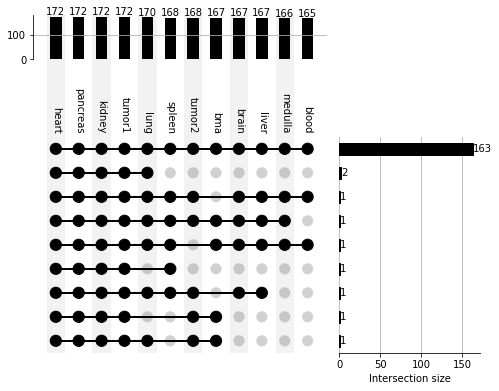

In [26]:
upset = UpSet(data[0:len(data)], min_subset_size=1, orientation='vertical',sort_by='cardinality',  show_counts=True )
# upset.style_subsets(present=["tumor1", "heart"],
#                     facecolor="red",
#                     label="tumor1-heart")
# upset.style_subsets(present=["tumor1", "kidney"],
#                     facecolor="blue",
#                     label="tumor1-kidney")
# upset.style_subsets(present=["tumor1", "pancreas"],
#                     facecolor="purple",
#                     label="tumor1-liver")
# upset.style_subsets(present=["tumor1", "blood"],
#                     facecolor="green",
#                     label="tumor1-blood")
upset.plot()

In [27]:

data = df[tissues+['CHROM','POS','REF','ALT']]
index = pd.MultiIndex.from_frame(data[tissues])
data.index = index
data.drop(tissues,inplace=True,axis=1)
data

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CHROM  \
tumor1 tumor2 blood kidney liver pancreas heart lung  medulla spleen brain bma           
False  True   False True   False False    True  True  False   False  False False  chr1   
                                                                           False  chr1   
                           True  False    True  False False   False  True  False  chr1   
                           False False    False False False   False  False False  chr1   
                           True  False    True  False False   False  False False  chr1   
...                                                                                ...   
True   True   True  True   True  True     True  True  True    True   True  True   chrX   
                                                                           True   chrX   
                                                                           True   chrX   
                                                                           True   chrX   
                                                                           True   chrX   

                                                                                        POS  \
tumor1 tumor2 blood kidney liver pancreas heart lung  medulla spleen brain bma                
False  True   False True   False False    True  True  False   False  False False     865445   
                                                                           False    4101122   
                           True  False    True  False False   False  True  False    4352976   
                           False False    False False False   False  False False    7591505   
                           True  False    True  False False   False  False False    7983849   
...                                                                                     ...   
True   True   True  True   True  True     True  True  True    True   True  True    16318693   
                                                                           True    23394410   
                                                                           True    23394410   
                                                                           True    41403630   
                                                                           True   153583477   

                                                                                   REF  \
tumor1 tumor2 blood kidney liver pancreas heart lung  medulla spleen brain bma           
False  True   False True   False False    True  True  False   False  False False     G   
                                                                           False     G   
                           True  False    True  False False   False  True  False     G   
                           False False    False False False   False  False False     T   
                           True  False    True  False False   False  False False     G   
...                                                                                ...   
True   True   True  True   True  True     True  True  True    True   True  True      A   
                                                                           True   ACAC   
                                                                           True     AC   
                                                                           True   TATT   
                                                                           True      T   

                                                                                 ALT  
tumor1 tumor2 blood kidney liver pancreas heart lung  medulla spleen brain bma        
False  True   False True   False False    True  True  False   False  False False   C  
                                                                           False   T  
                           True  False    True  False False   False  True  False   A  
                           False False    False False False   False 

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba637add8>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba3f9b0b8>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba637a400>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba64c0d68>}

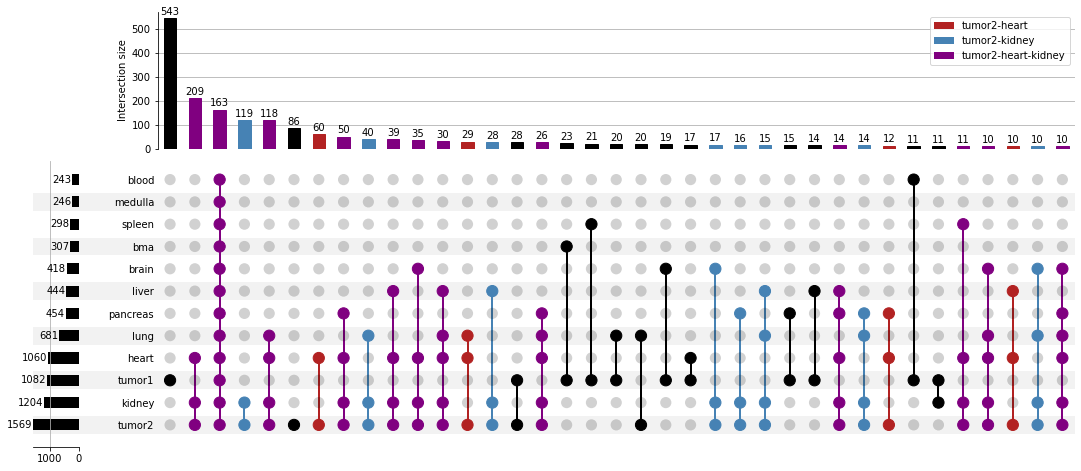

In [28]:
upset = UpSet(data[0:len(data)], min_subset_size=10,  sort_by='cardinality',show_counts=True )
upset.style_subsets(present=["tumor2", "heart"],
                    facecolor="firebrick",
                    label="tumor2-heart")
upset.style_subsets(present=["tumor2", "kidney"],
                    facecolor="steelblue",
                    label="tumor2-kidney")
upset.style_subsets(present=["tumor2", "kidney","heart"],
                    facecolor="purple",
                    label="tumor2-heart-kidney")
upset.plot()

## CF fraction

In [7]:
samples_dict

{'AQ5180': 'tumor1',
 'AQ5186': 'tumor2',
 'AQ5174': 'blood',
 'AX4954': 'kidney',
 'AX4955': 'liver',
 'AX4956': 'pancreas',
 'AX4957': 'heart',
 'AX4962': 'lung',
 'AX4963': 'medulla',
 'AX4964': 'spleen',
 'AX4965': 'brain',
 'AX4966': 'bma'}

In [8]:
suffixes_dict2 = {suffixes_dict[tissue]:tissue for tissue in suffixes_dict.keys()}
suffixes_dict2

{'_t1': 'tumor1',
 '_t2': 'tumor2',
 '_b': 'blood',
 '_k': 'kidney',
 '_l': 'liver',
 '_p': 'pancreas',
 '_h': 'heart',
 '_lu': 'lung',
 '_me': 'medulla',
 '_s': 'spleen',
 '_br': 'brain',
 '_bm': 'bma'}

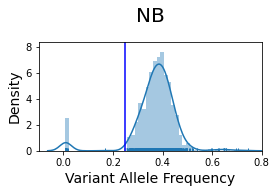

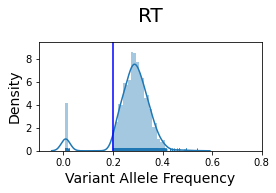

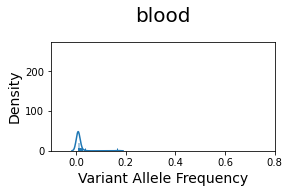

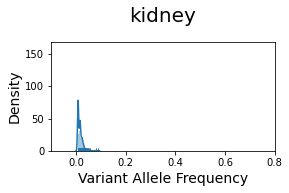

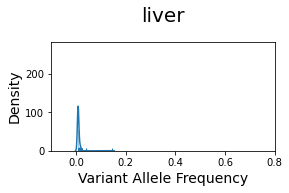

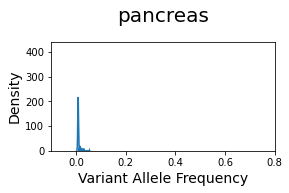

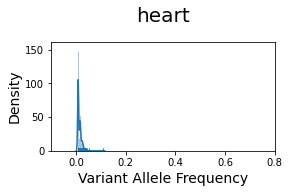

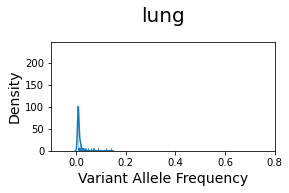

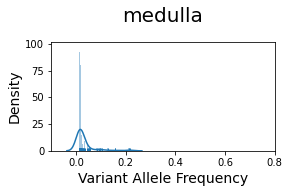

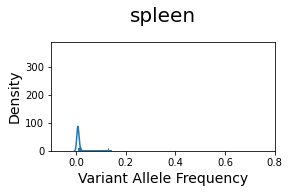

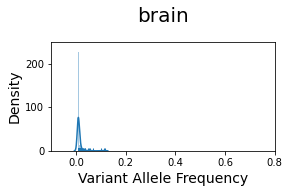

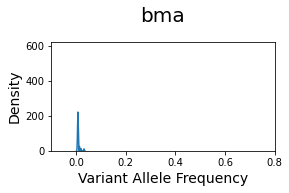

In [9]:
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    col = 'AF'+suffix
    data = df[(df[col]!=0)&(df['denovo_germline']==False)&(df['n_tissues']!=len(tissues))]
    y_var = col
    if tissue == 'tumor1':
        title = 'NB'
    elif tissue == 'tumor2':
        title = 'RT'
    else:
        title = tissue
    xlim = 1
    bins = 10
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=0.8,bins=50)
    plt.xlabel('Variant Allele Frequency',size=14)
    plt.ylabel('Density',size=14)
    if tissue == 'tumor1':
        plt.axvline(x = 0.25, color = 'b', label = 'clonal')
    elif tissue == 'tumor2':
        plt.axvline(x = 0.2, color = 'b', label = 'clonal')

    

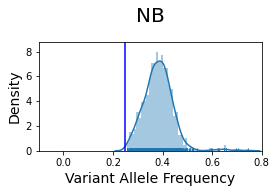

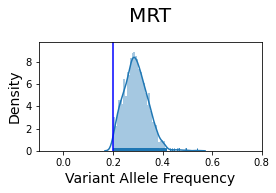

In [288]:
for tissue in ['tumor1','tumor2']:
    suffix = suffixes_dict[tissue]
    col = 'AF'+suffix
    if tissue == 'tumor1':
        title = 'NB'
        threshold = 0.25
    elif tissue == 'tumor2':
        title = 'RT'
        threshold = 0.2
    else:
        title = tissue
    data = df[(df[col]>threshold)&(df['denovo_germline']==False)&(df['n_tissues']!=len(tissues))]
    y_var = col
    if tissue == 'tumor1':
        title = 'NB'
    elif tissue == 'tumor2':
        title = 'MRT'
    else:
        title = tissue
    xlim = 1
    bins = 10
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=0.8,bins=50)
    plt.xlabel('Variant Allele Frequency',size=14)
    plt.ylabel('Density',size=14)

    plt.axvline(x = threshold, color = 'b', label = 'clonal')
    
    plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/'+title+'_VAF_clonal_selection.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

    plt.show()

## Plot depth from chrom1

In [11]:
import gzip
import numpy as np
from scipy.stats import t

In [12]:
input_file = '/workspace/datasets/sjd_seq/sarek_results/pt1/samtools/depth/AQ5174/chr1_depth.txt.gz'

counts = []
with gzip.open(input_file,'r') as file:
    for line in tqdm(file):
        line = str(line)
        count = line.split('\\t')[2].split('\\n')[0]
        if int(count) < 400:
            counts.append(int(count))
    file.close()

In [13]:
mean = np.mean (counts)
sd = np.std (counts)

dof = len(counts)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
left_ci_95 = mean-sd*t_crit/np.sqrt(len(count))
right_ci_95 = mean+sd*t_crit/np.sqrt(len(count))

Text(0.9, 1.1, '2SD')

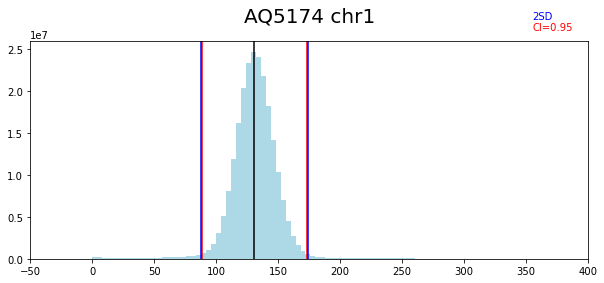

In [14]:
#historgam
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sample = input_file.split('/')[8]
chrom = input_file.split('/')[9].split('_')[0]
title = sample + ' ' + chrom
ax.hist(counts, bins=100, range=(0,400),color='lightblue')
plt.title(title,size=20,pad=20)
plt.xlim(left=-50,right=400)
#plt.axvline(60)
#plt.axvline(200)
plt.axvline(mean,color='black')

plt.axvline(left_ci_95,color='red')
plt.axvline(right_ci_95,color='red')
plt.text(x=.9,y=1.05,s='CI=0.95',transform = ax.transAxes,color='red')

plt.axvline(mean-2*sd,color='blue')
plt.axvline(mean+2*sd,color='blue')
plt.text(x=.9,y=1.10,s='2SD',transform = ax.transAxes,color='blue')


In [15]:
counts2 =[count for count in tqdm(counts) if count<300 ]

In [16]:
print(len(counts))
print(len(counts2))

229247627
228930910


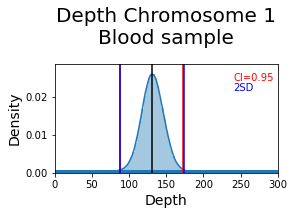

In [22]:
bins = 100
title = 'Depth Chromosome 1\nBlood sample'
xlim_min = 0
xlim_max = 300
data = counts2[10000000:15000000]
fig, ax = plt.subplots()
fig.set_size_inches(4, 2)
ax = sns.distplot(data,rug=True,bins=bins)
ax.set_title(title,size=20,pad=20)
ax.set_xlim(xlim_min,xlim_max)
plt.xlabel('Depth',size=14)
plt.ylabel('Density',size=14)

plt.axvline(mean,color='black')

plt.axvline(left_ci_95,color='red')
plt.axvline(right_ci_95,color='red')
plt.text(x=.8,y=0.85,s='CI=0.95',transform = ax.transAxes,color='red')

plt.axvline(mean-2*sd,color='blue')
plt.axvline(mean+2*sd,color='blue')
plt.text(x=.8,y=0.75,s='2SD',transform = ax.transAxes,color='blue')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/depth_chr1_blood_sample.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### Calculate CF

In [49]:
cnv_df1 = pd.read_csv('/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t1-allsamples-t1/purple/AQ5180.purple.cnv.somatic.tsv',sep='\t')
cnv_df1[['chromosome','start','end','copyNumber']]
cnv_df1['SAMPLE'] = 'tumor1'
cnv_df2 = pd.read_csv('/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t2-allsamples-t2/purple/AQ5186.purple.cnv.somatic.tsv',sep='\t')
cnv_df2[['chromosome','start','end','copyNumber']]
cnv_df2['SAMPLE'] = 'tumor2'
cnv_df = pd.concat([cnv_df1,cnv_df2],ignore_index=True)
purity1 = pd.read_csv('/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t1-allsamples-t1/purple/AQ5180.purple.purity.tsv',sep='\t')
purity1 = purity1.iloc[0,0]
purity_dict = {}
purity_dict['tumor1'] = purity1
purity2 = pd.read_csv('/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t2-allsamples-t2/purple/AQ5186.purple.purity.tsv',sep='\t')
purity2 = purity2.iloc[0,0]
purity_dict['tumor2'] = purity2
purity_dict

{'tumor1': 0.79, 'tumor2': 0.58}

In [50]:
def calculate_ccf (row,tissue,suffix):
    if row['AF'+suffix] == 0:
        ccf = 0
    else:
        chrom_mut = row['CHROM']
        pos_mut = int(row['POS'])
        vaf = row['AF'+suffix]
        purity = purity_dict[tissue]
        cnv_df1 = cnv_df[(cnv_df['SAMPLE']==tissue)&(cnv_df['chromosome']==chrom_mut)] 
#         print(chrom_mut,pos_mut,vaf,purity, len(cnv_df1))
        for row2 in cnv_df1.iterrows():
            pos1_cnv = int(row2[1][1])
            pos2_cnv = int(row2[1][2])
            cnv = row2[1][3]
            if pos1_cnv < pos_mut and pos2_cnv > pos_mut:
                ccf = vaf*(purity*cnv+ (1-purity)*2)/purity
            else:
                ccf = vaf*(purity* 2 + (1-purity)*2)/purity
    return ccf

for tissue in tissues:
    suffix = suffixes_dict[tissue]
    if tissue == 'tumor1' or tissue == 'tumor2':
        df['CF'+suffix] = df.apply(lambda row: calculate_ccf (row,tissue,suffix),axis=1)
    else:
        df['CF'+suffix] = df['AF'+suffix].apply(lambda x: x*2)
df

CHROM        POS   REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
0     chr1     865445     G   C     NaN    False      snv      81.0     136.0   
1     chr1    4101122     G   T     NaN    False      snv      81.0     117.0   
2     chr1    4352976     G   A     NaN    False      snv      73.0     121.0   
3     chr1    7591505     T   C     NaN    False      snv      75.0     121.0   
4     chr1    7983849     G   T     NaN    False      snv      76.0     125.0   
...    ...        ...   ...  ..     ...      ...      ...       ...       ...   
2381  chrX   16318693     A   -     NaN    False    indel      88.0     111.0   
2382  chrX   23394410  ACAC   -     NaN    False    indel      97.0     123.0   
2383  chrX   23394410    AC   -     NaN    False    indel      97.0     123.0   
2384  chrX   41403630  TATT   -     NaN    False    indel     132.0     125.0   
2385  chrX  153583477     T   A     NaN    False      snv     113.0     129.0   

      depth_b  ...    CF_b    CF_k    CF_l    CF_p    CF_h   CF_lu   CF_me  \
0       128.0  ...  0.0000  0.0526  0.0000  0.0000  0.0132  0.0140  0.0000   
1       134.0  ...  0.0000  0.0322  0.0000  0.0000  0.0182  0.0152  0.0000   
2       126.0  ...  0.0000  0.0140  0.0120  0.0000  0.0284  0.0000  0.0000   
3       129.0  ...  0.0000  0.0164  0.0000  0.0000  0.0000  0.0000  0.0000   
4       127.0  ...  0.0000  0.0154  0.0142  0.0000  0.0746  0.0000  0.0000   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
2381    131.0  ...  0.3116  0.4102  0.3810  0.2972  0.4566  0.6216  0.4782   
2382    121.0  ...  0.5748  0.5228  0.5882  0.5394  0.7180  0.4722  0.5714   
2383    121.0  ...  0.5748  0.5228  0.5882  0.5394  0.7180  0.4722  0.5714   
2384    130.0  ...  0.4694  0.6230  0.5054  0.6948  0.5632  0.5688  0.6274   
2385    123.0  ...  0.3902  0.3484  0.3304  0.3968  0.4166  0.2018  0.1818   

        CF_s   CF_br   CF_bm  
0     0.0000  0.0000  0.0000  
1     0.0000  0.0000  0.0000  
2     0.0000  0.0132  0.0000  
3     0.0000  0.0000  0.0000  
4     0.0000  0.0000  0.0000  
...      ...     ...     ...  
2381  0.4594  0.4722  0.4048  
2382  0.5310  0.7450  0.5974  
2383  0.5310  0.7450  0.5974  
2384  0.5522  0.5424  0.4706  
2385  0.2314  0.1818  0.2000  

[2386 rows x 232 columns]

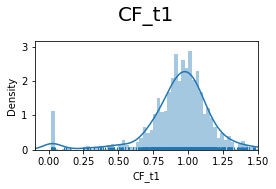

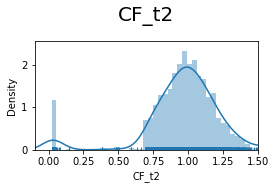

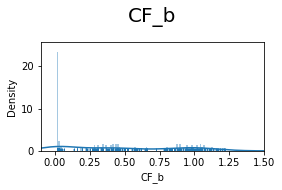

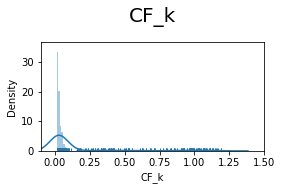

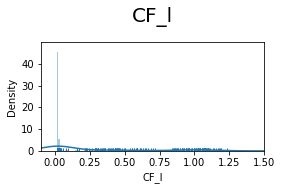

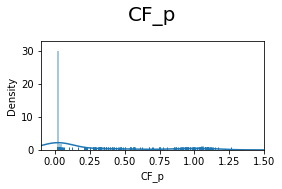

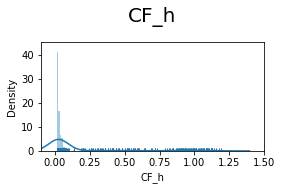

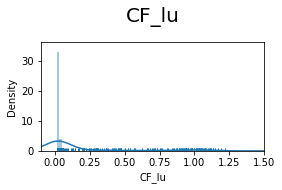

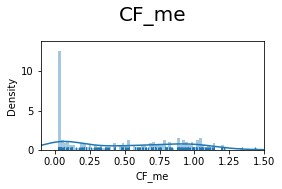

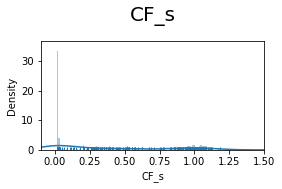

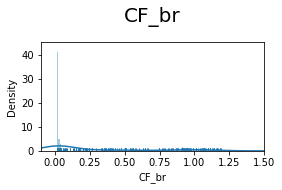

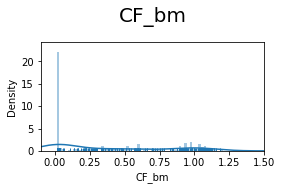

In [51]:
#all muts
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df[(df[col]!=0)&(df['n_tissues']!=7)]
    y_var = col
    title = col
    xlim = 1.5
    bins = 100
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=xlim,bins=bins)

In [43]:
from statistics import stdev

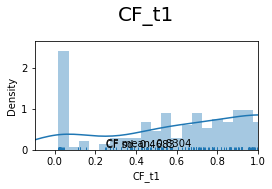

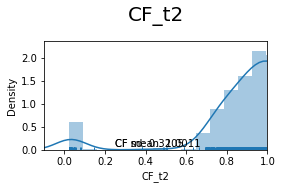

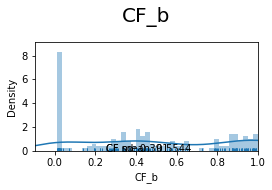

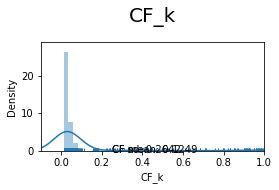

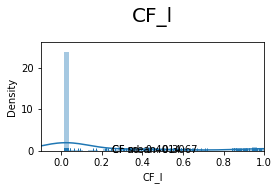

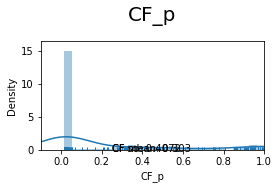

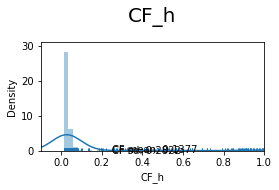

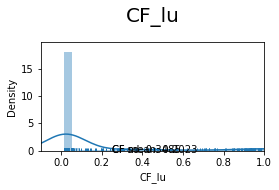

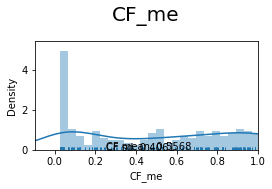

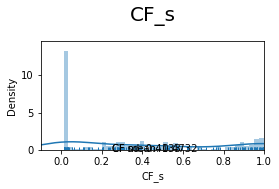

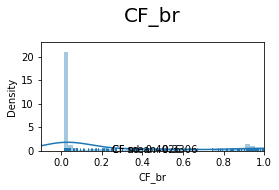

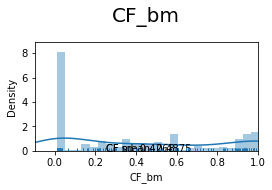

In [44]:
#shared with rhabdoid
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df[(df[col]!=0)&(df['AF_t2']!=0)&(df['n_tissues']!=7)]
    y_var = col
    title = col
    xlim = 1
    bins = 50
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=xlim,bins=bins)
    mean = round(data[col].mean(),4)
    plt.text(x=0.25,y=0.14, s='CF mean: '+str(mean), horizontalalignment='left',
 verticalalignment='center')
    sd = round(stdev(data[col]),4)
    plt.text(x=0.25,y=0.12, s='CF sd: '+str(sd), horizontalalignment='left',
 verticalalignment='center')

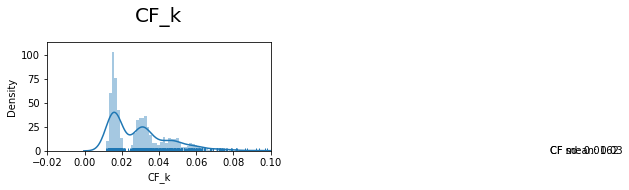

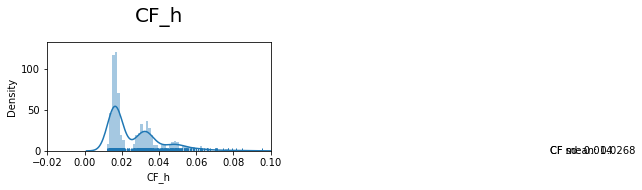

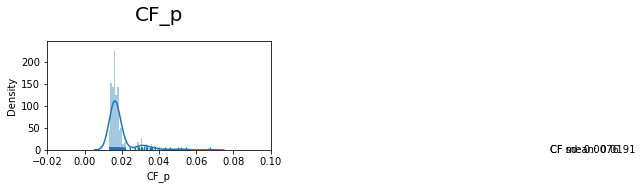

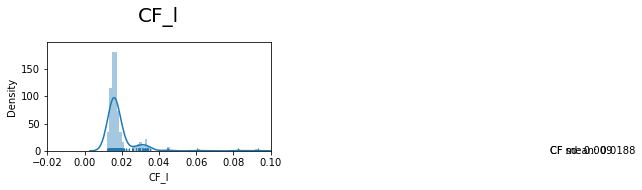

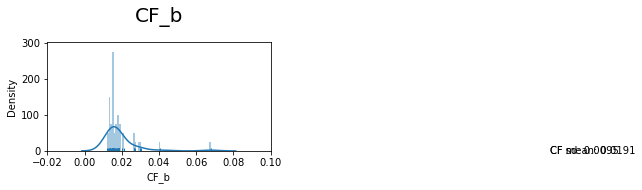

In [45]:
#shared with rhabdoid (CF < 0.1)
for tissue in ['kidney','heart','pancreas','liver','blood']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df[(df[col]!=0)&(df[col]<0.1)&(df['AF_t2']!=0)&(df['n_tissues']!=7)]
    y_var = col
    title = col
    xlim = 0.1
    bins = 60
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.02,xlim_max=xlim,bins=bins)
    mean = round(data[col].mean(),4)
    plt.text(x=0.25,y=0.14, s='CF mean: '+str(mean), horizontalalignment='left',
 verticalalignment='center')
    sd = round(stdev(data[col]),4)
    plt.text(x=0.25,y=0.12, s='CF sd: '+str(sd), horizontalalignment='left',
 verticalalignment='center')

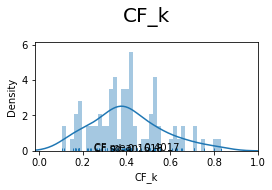

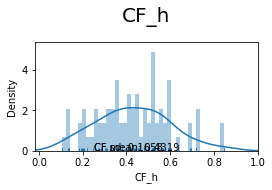

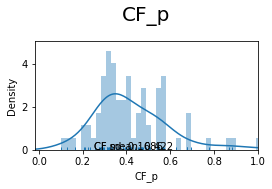

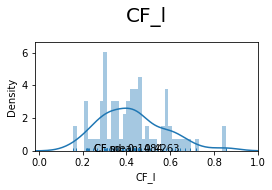

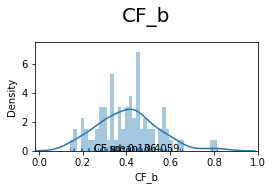

In [46]:
#shared with rhabdoid (CF > 0.1)
for tissue in ['kidney','heart','pancreas','liver','blood']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df[(df[col]!=0)&(df[col]>0.1)&(df['AF_t2']!=0)&(df['denovo_germline']==False)]
    y_var = col
    title = col
    xlim = 1
    bins = 40
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.02,xlim_max=xlim,bins=bins)
    mean = round(data[col].mean(),4)
    plt.text(x=0.25,y=0.14, s='CF mean: '+str(mean), horizontalalignment='left',
 verticalalignment='center')
    sd = round(stdev(data[col]),4)
    plt.text(x=0.25,y=0.12, s='CF sd: '+str(sd), horizontalalignment='left',
 verticalalignment='center')

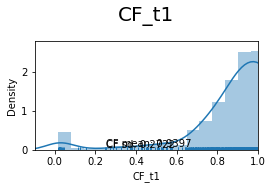

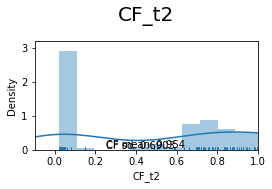

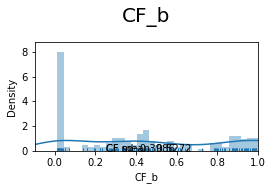

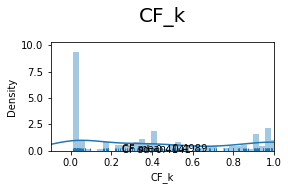

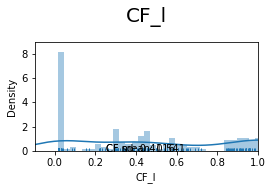

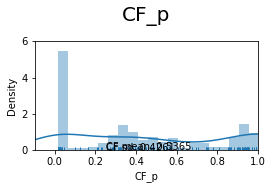

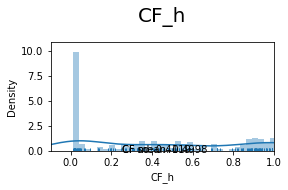

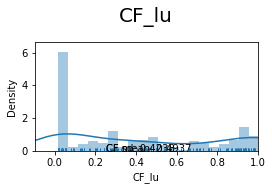

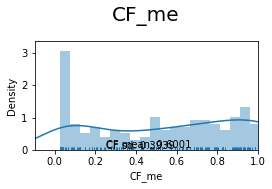

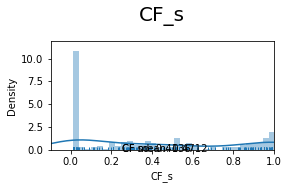

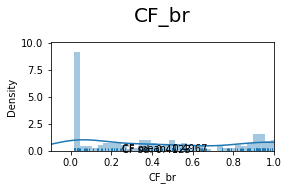

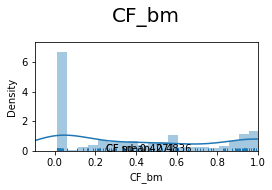

In [47]:
#shared with neuroblastoma
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df[(df[col]!=0)&(df['AF_t1']!=0)&(df['n_tissues']!=7)]
    y_var = col
    title = col
    xlim = 1
    bins = 40
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=xlim,bins=bins)
    mean = round(data[col].mean(),4)
    plt.text(x=0.25,y=0.14, s='CF mean: '+str(mean), horizontalalignment='left',
 verticalalignment='center')
    sd = round(stdev(data[col]),4)
    plt.text(x=0.25,y=0.12, s='CF sd: '+str(sd), horizontalalignment='left',
 verticalalignment='center')

## Rhabdoid tumor lineage

### Shared only

n muts:  214
CF_k 0.0291


Text(0.4, 0.4, 'CCF mean: 0.0291')

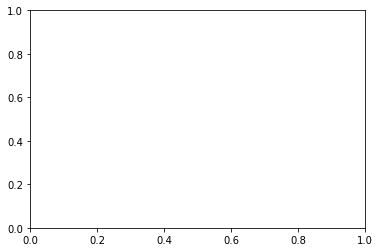

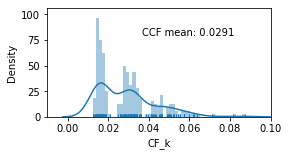

In [48]:
#muts shared RT and kidney
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
tissue = 'kidney'
suffix = suffixes_dict[tissue]
col = 'CF'+suffix
data = df1
mean = round(data[col].mean(),4)
print(col, mean)
y_var = col
title = ''
xlim_min = -0.01
xlim_max = 0.1
bins = 50
f, ax = plt.subplots()
density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
 verticalalignment='center', transform=ax.transAxes)

n muts:  413
CF_k 0.0304
CF_h 0.0262


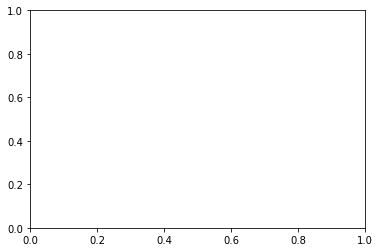

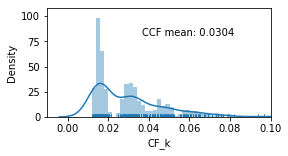

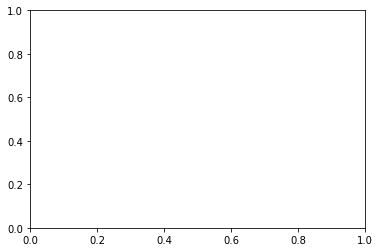

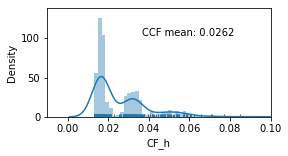

In [49]:
#muts shared RT,kidney and heart
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
for tissue in ['kidney','heart']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  104
CF_k 0.0305
CF_h 0.0248
CF_p 0.0186


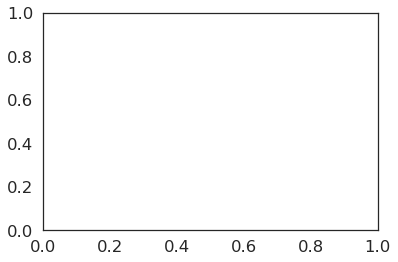

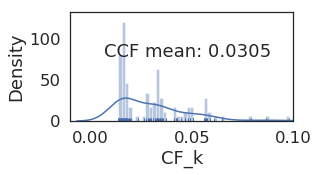

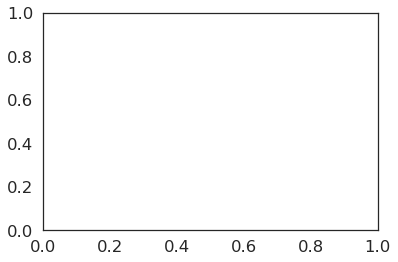

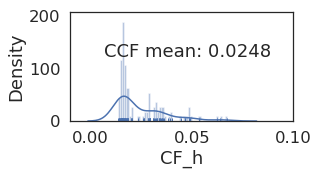

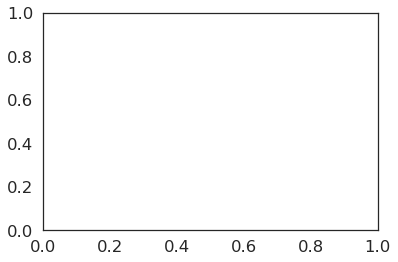

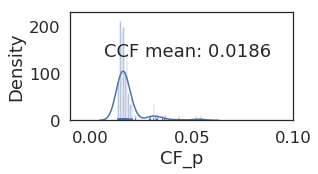

In [64]:
#muts shared RT,kidney, heart and pancreas
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
for tissue in ['kidney','heart','pancreas']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  28
CF_k 0.0305
CF_h 0.0289
CF_p 0.0204
CF_l 0.0172


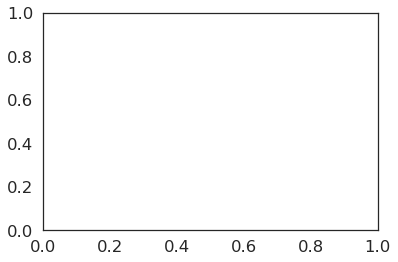

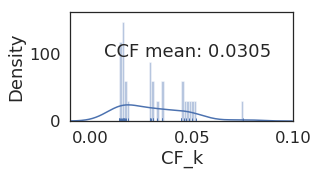

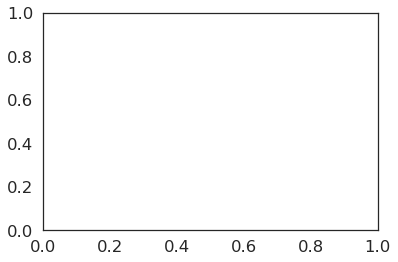

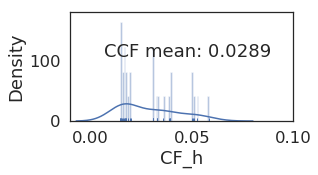

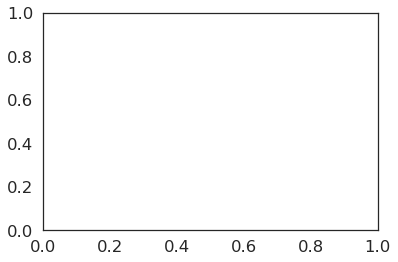

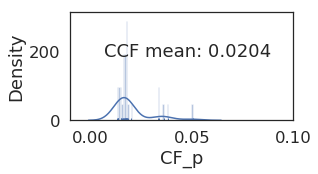

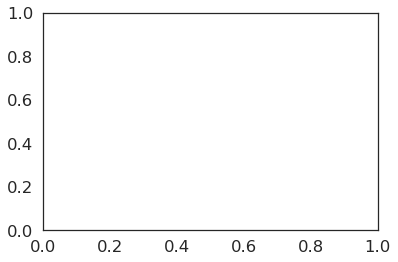

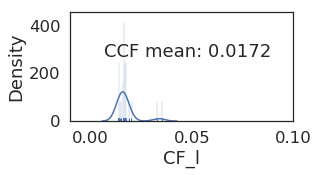

In [65]:
#muts shared RT, kidney, heart, pancreas, liver
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
for tissue in ['kidney','heart','pancreas','liver']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  1
CF_k 0.0348
CF_h 0.0606
CF_p 0.018
CF_l 0.038
CF_b 0.0134


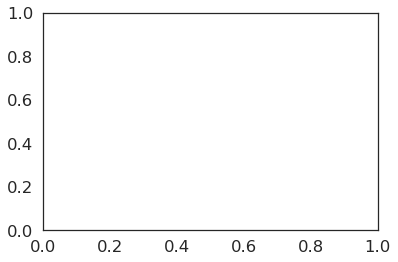

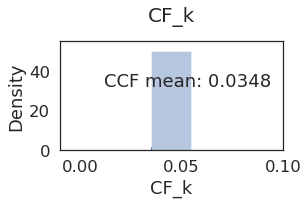

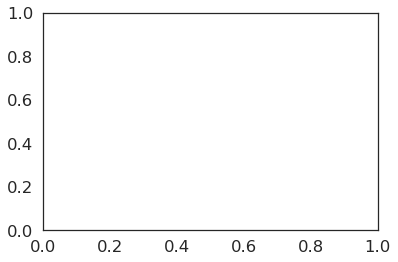

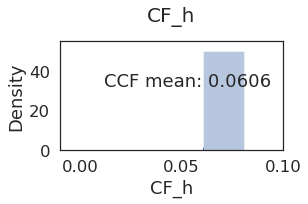

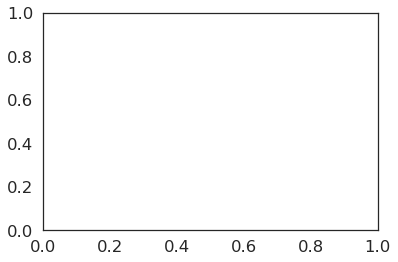

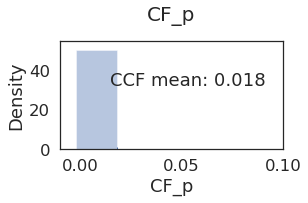

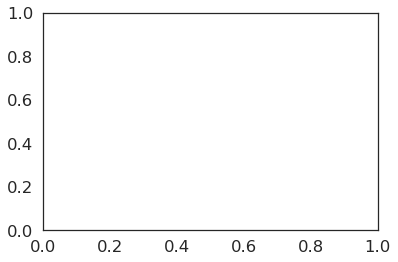

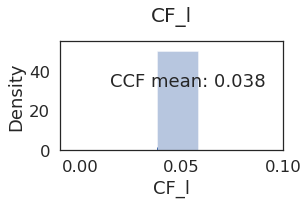

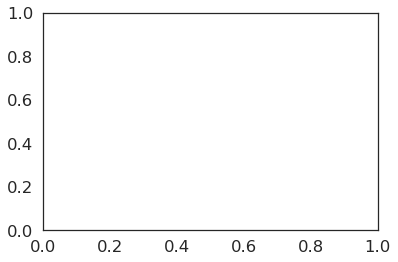

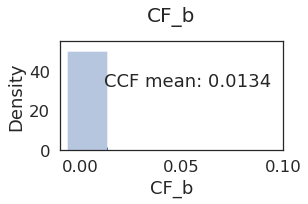

In [66]:
#muts shared RT,kidney, heart, pancreas, liver, blood
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]
print('n muts: ',len(df1))
for tissue in ['kidney','heart','pancreas','liver','blood']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = col
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

### Cumulative

n muts:  214
CF_k 0.0291


Text(0.4, 0.4, 'CCF mean: 0.0291')

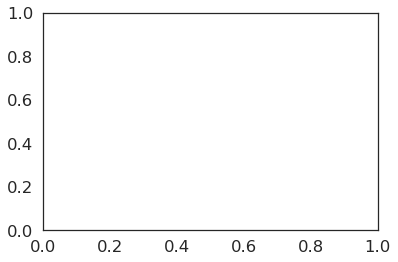

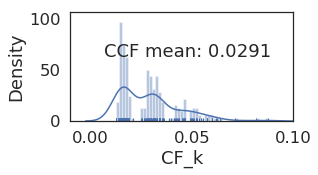

In [67]:
#muts shared RT and kidney
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
tissue = 'kidney'
suffix = suffixes_dict[tissue]
col = 'CF'+suffix
data = df1[df1[col]!=0]
mean = round(data[col].mean(),4)
print(col, mean)
y_var = col
title = ''
xlim_min = -0.01
xlim_max = 0.1
bins = 50
f, ax = plt.subplots()
density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
 verticalalignment='center', transform=ax.transAxes)

n muts:  627
CF_k 0.03
CF_h 0.0262


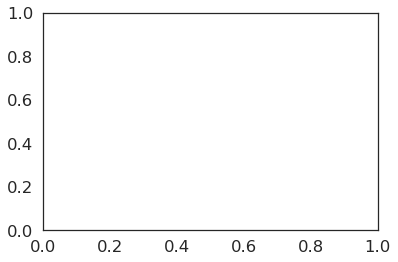

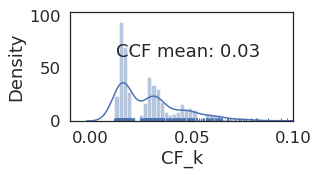

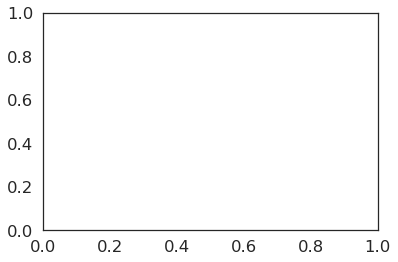

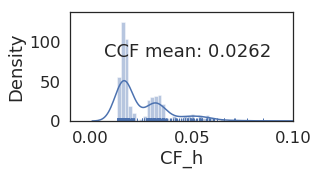

In [68]:
#muts shared RT,kidney or heart
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['kidney','heart']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  731
CF_k 0.0301
CF_h 0.0259
CF_p 0.0186


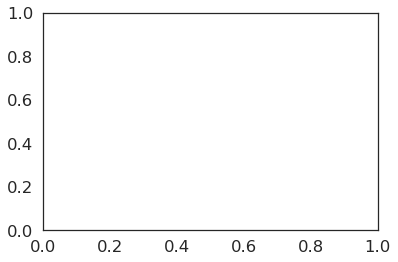

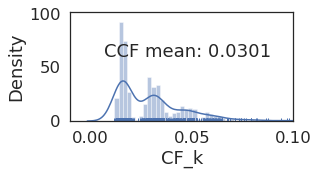

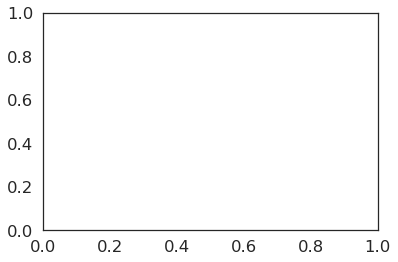

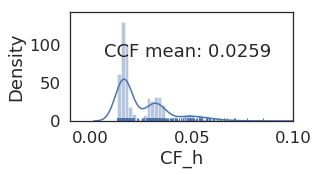

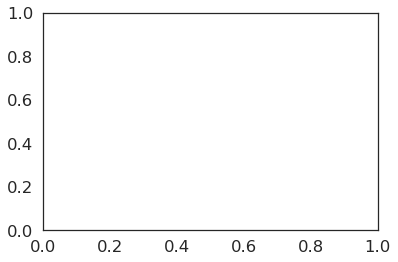

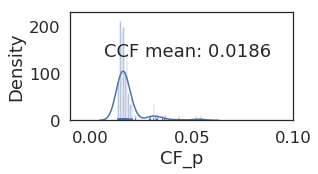

In [69]:
#muts shared RT,kidney, heart or pancreas
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3,df4],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['kidney','heart','pancreas']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  759
CF_k 0.0301
CF_h 0.0261
CF_p 0.0189
CF_l 0.0172


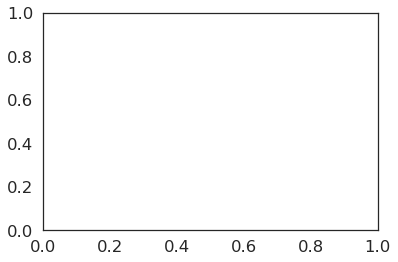

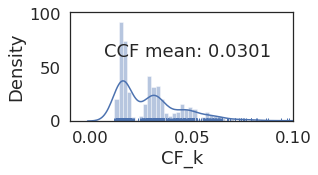

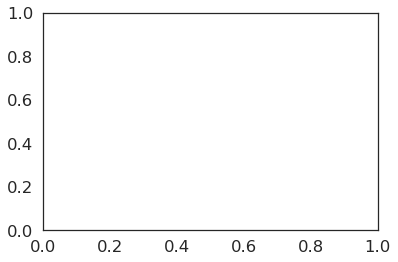

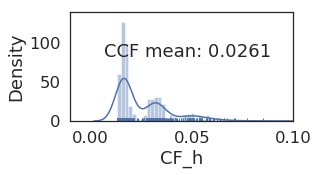

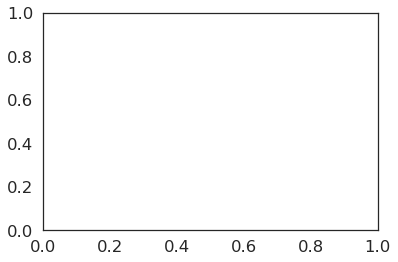

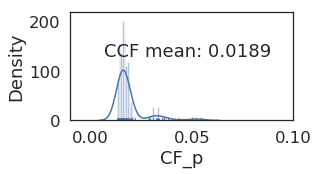

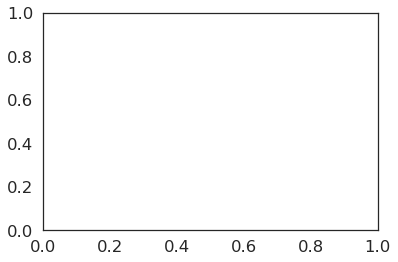

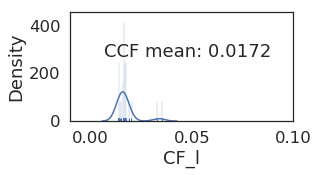

In [70]:
#muts shared RT,kidney. heart, pancreas or liver
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df5 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3,df4,df5],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['kidney','heart','pancreas','liver']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  760
CF_k 0.0301
CF_h 0.0261
CF_p 0.0189
CF_l 0.0179
CF_b 0.0134


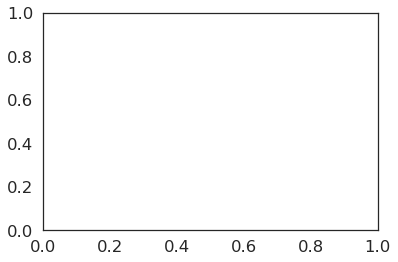

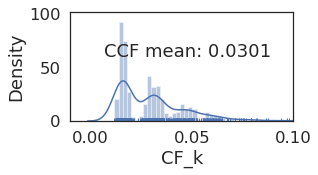

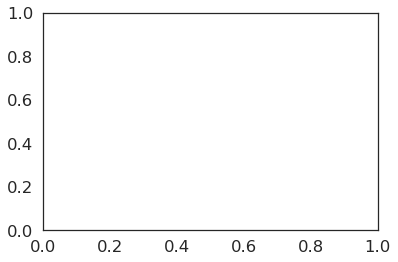

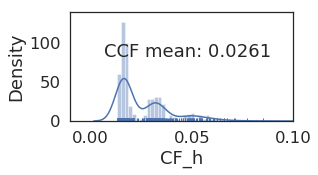

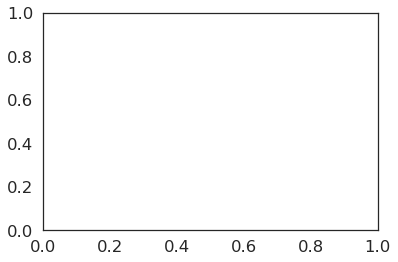

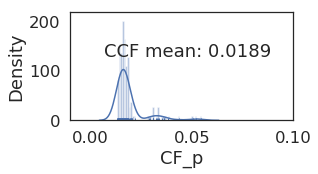

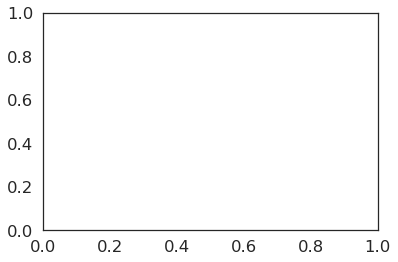

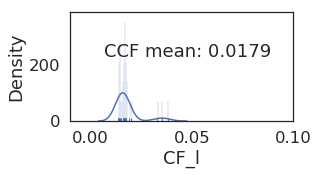

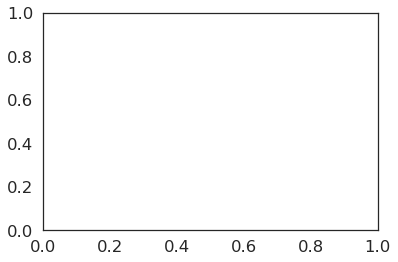

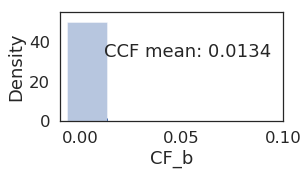

In [71]:
#muts shared RT,kidney, heart, pancreas, liver, blood
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df5 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
df6 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]

df1 = pd.concat([df2,df3,df4,df5,df6],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['kidney','heart','pancreas','liver','blood']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 50
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

## Mutational profiles

In [52]:
%run /workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


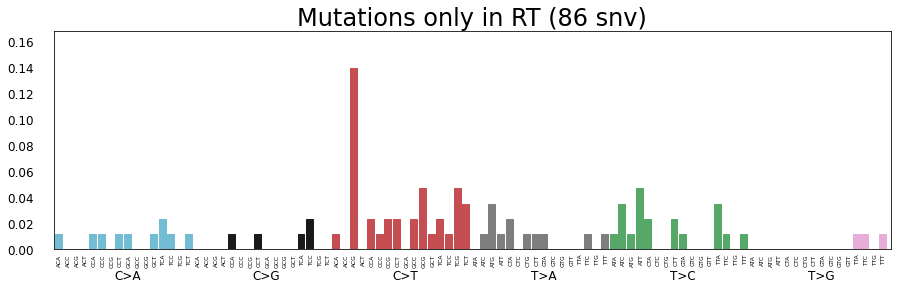

In [53]:
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)&(df['AF_lu']==0)&(df['AF_me']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations only in RT ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


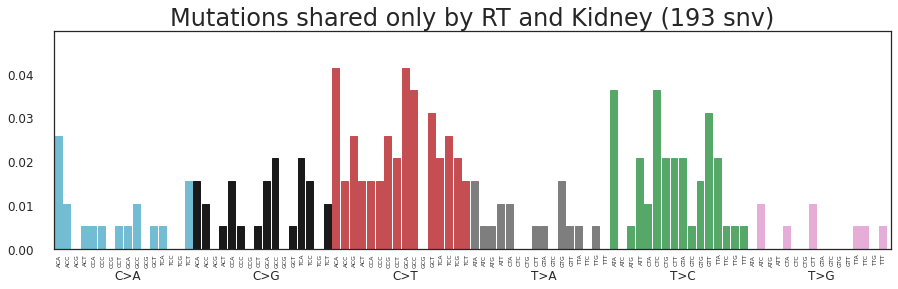

In [54]:
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by RT and Kidney ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


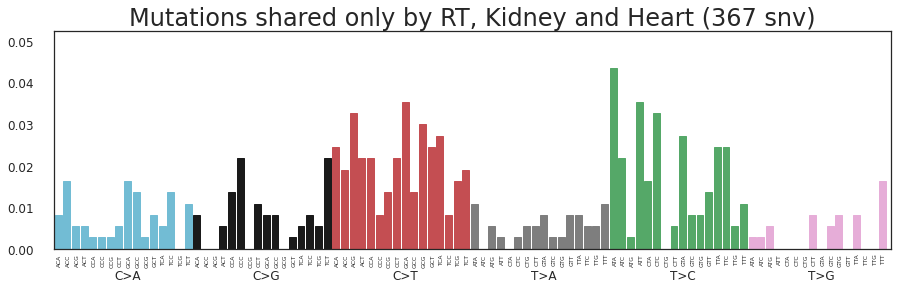

In [55]:
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by RT, Kidney and Heart ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


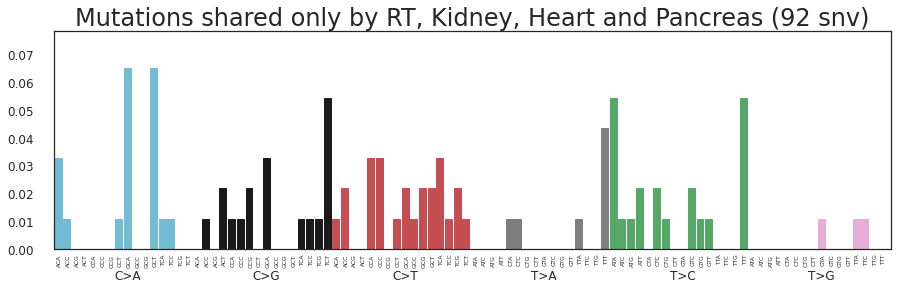

In [56]:
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by RT, Kidney, Heart and Pancreas ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


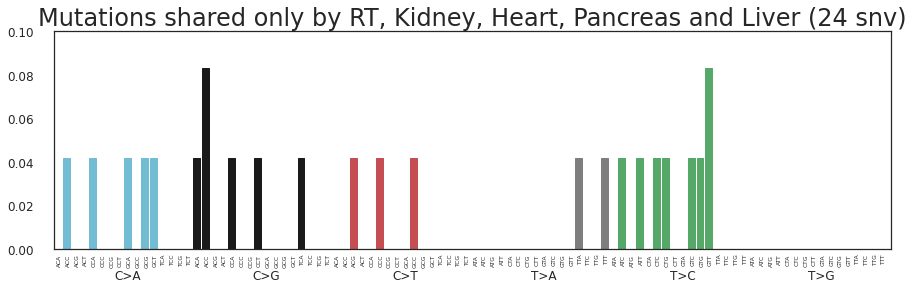

In [57]:
df1 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by RT, Kidney, Heart, Pancreas and Liver ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

## Cumulative

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


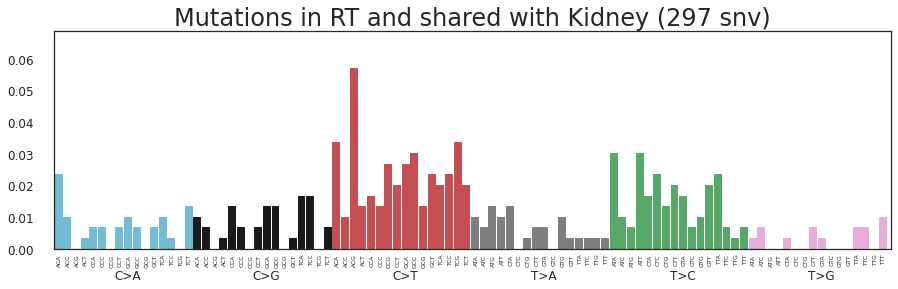

In [58]:
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in RT and shared with Kidney ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


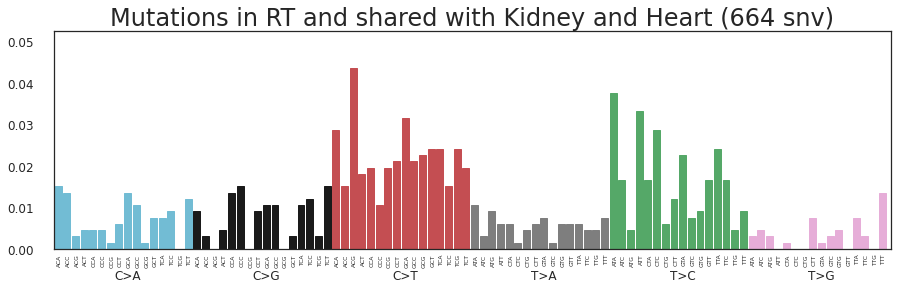

In [59]:
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3,df4],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in RT and shared with Kidney and Heart ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


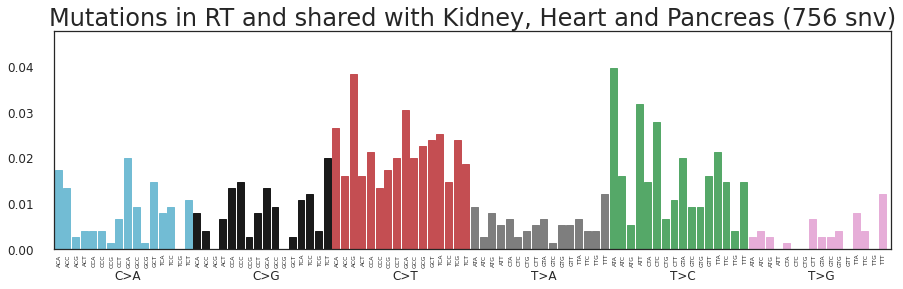

In [60]:
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df5 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3,df4,df5],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in RT and shared with Kidney, Heart and Pancreas ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


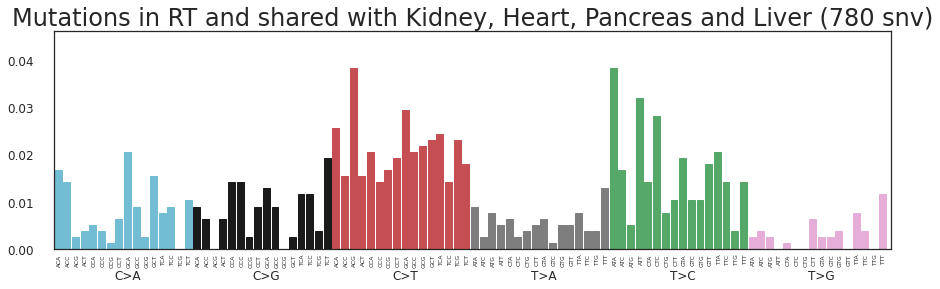

In [61]:
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df5 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df6 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
df1 = pd.concat([df2,df3,df4,df5,df6],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in RT and shared with Kidney, Heart, Pancreas and Liver ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


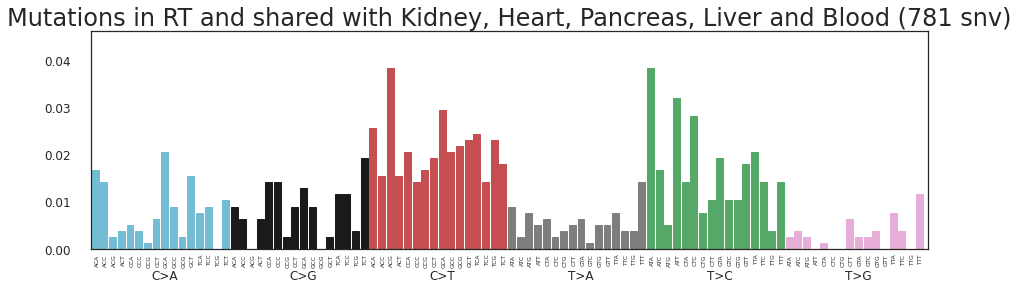

In [62]:
df2 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df3 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df4 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df5 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df6 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
df7 = df[(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]
df1 = pd.concat([df2,df3,df4,df5,df6,df7],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in RT and shared with Kidney, Heart, Pancreas, Liver and Blood ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

## Neuroblastoma lineage

### Shared only

n muts:  28
CF_h 0.0171


Text(0.4, 0.4, 'CCF mean: 0.0171')

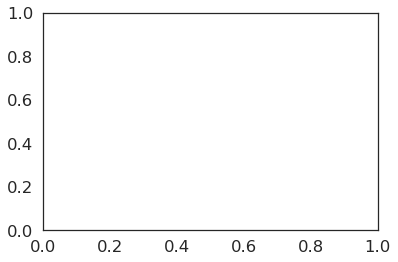

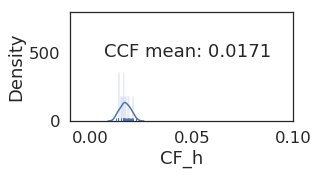

In [72]:
#muts shared NB and heart
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_k']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
tissue = 'heart'
suffix = suffixes_dict[tissue]
col = 'CF'+suffix
data = df1
mean = round(data[col].mean(),4)
print(col, mean)
y_var = col
title = ''
xlim_min = -0.01
xlim_max = 0.1
bins = 50
f, ax = plt.subplots()
density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
 verticalalignment='center', transform=ax.transAxes)

n muts:  3
CF_h 0.0166
CF_p 0.0154


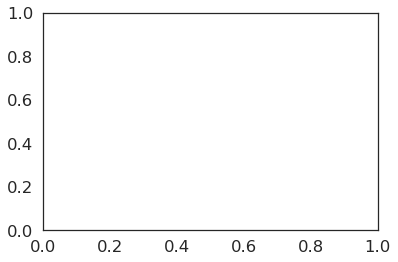

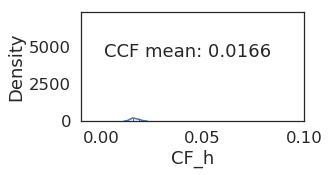

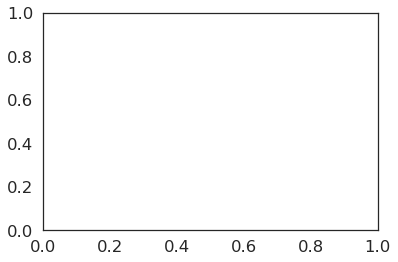

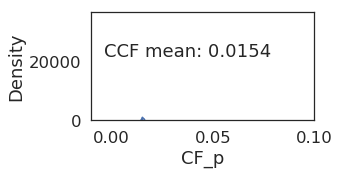

In [73]:
#muts shared NB, heart and pancreas
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
for tissue in ['heart','pancreas']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 30
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  3
CF_h 0.0169
CF_p 0.0171
CF_k 0.022


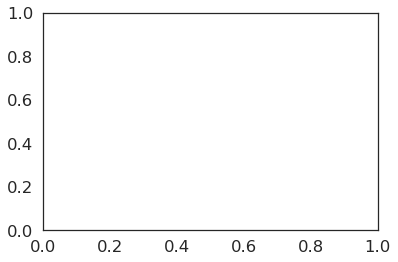

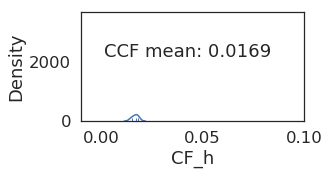

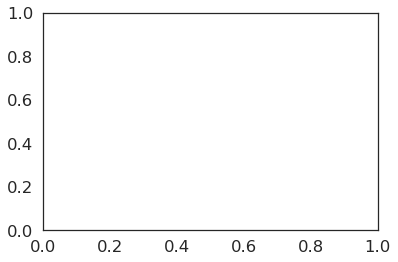

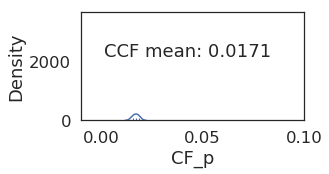

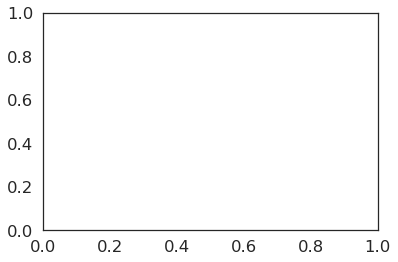

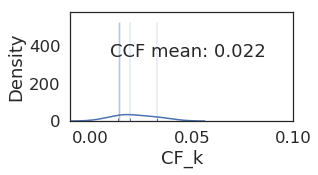

In [74]:
#muts shared NB, heart, pancreas and kidney
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
for tissue in ['heart','pancreas','kidney']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 30
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  0
CF_h nan
CF_p nan


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


CF_k nan


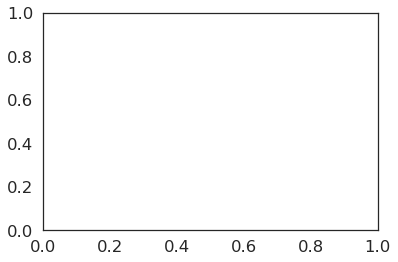

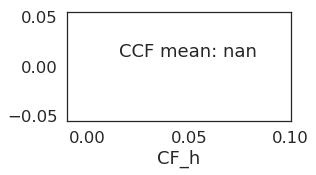

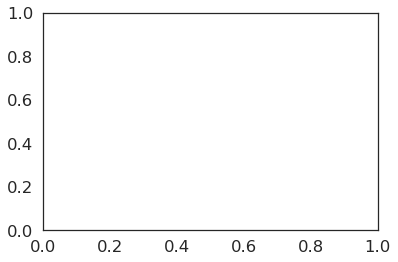

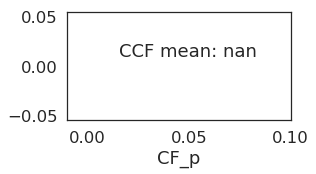

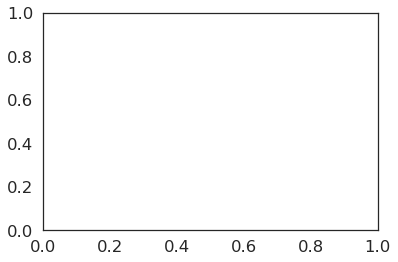

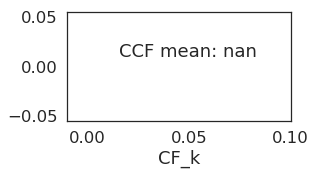

In [75]:
#muts shared NB, heart, pancreas, kidney
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]
print('n muts: ',len(df1))
for tissue in ['heart','pancreas','kidney']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 30
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  1
CF_h 0.0224
CF_p 0.0228
CF_k 0.0594


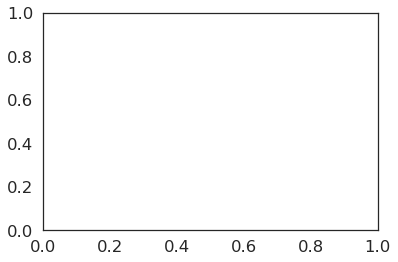

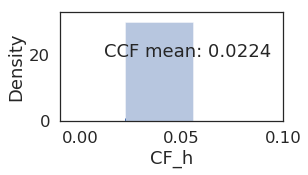

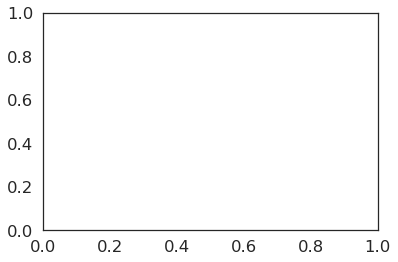

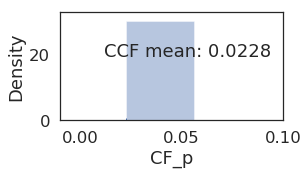

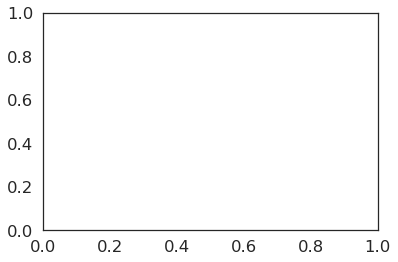

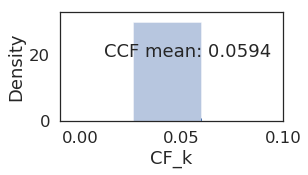

In [76]:
#muts shared NB, heart, pancreas, kidney
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]
print('n muts: ',len(df1))
for tissue in ['heart','pancreas','kidney']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 30
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

### Cummulative

n muts:  28
CF_h 0.0171


Text(0.4, 0.4, 'CCF mean: 0.0171')

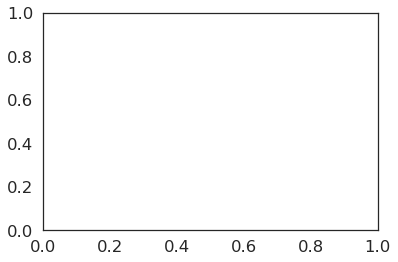

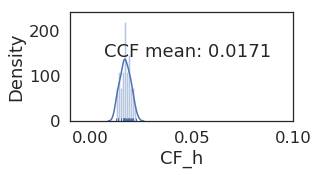

In [77]:
#muts in NB and shared with heart
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_k']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print('n muts: ',len(df1))
tissue = 'heart'
suffix = suffixes_dict[tissue]
col = 'CF'+suffix
data = df1
mean = round(data[col].mean(),4)
print(col, mean)
y_var = col
title = ''
xlim_min = -0.01
xlim_max = 0.1
bins = 10
f, ax = plt.subplots()
density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
 verticalalignment='center', transform=ax.transAxes)

n muts:  31
CF_h 0.0171
CF_p 0.0154


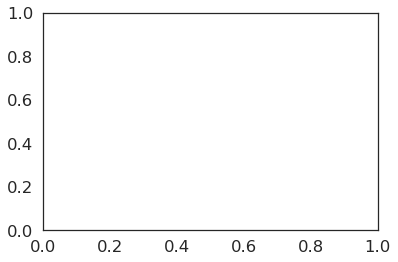

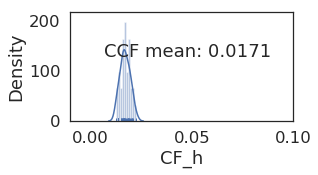

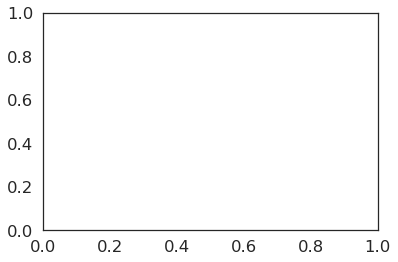

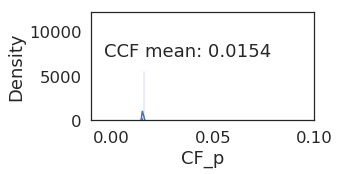

In [78]:
#muts in NB and shared with heart and pancreas
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df1 = pd.concat([df2,df3],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['heart','pancreas']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 10
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  34
CF_h 0.0171
CF_p 0.0163
CF_k 0.022


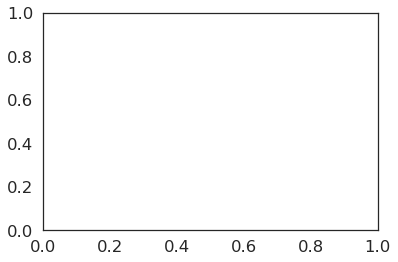

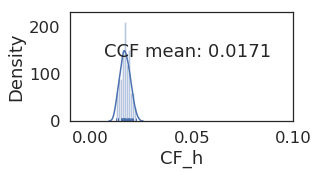

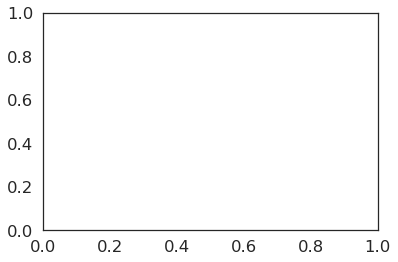

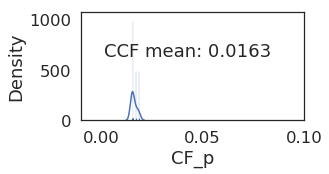

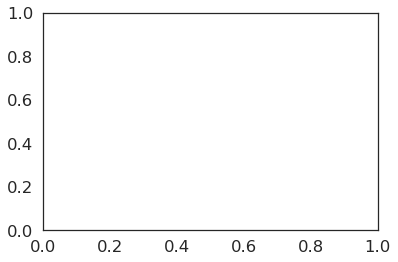

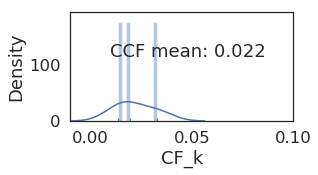

In [79]:
#muts in NB and shared with heart and pancreas
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df4 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]

df1 = pd.concat([df2,df3,df4],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['heart','pancreas','kidney']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 10
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  34
CF_h 0.0171
CF_p 0.0163
CF_k 0.022
CF_b nan


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


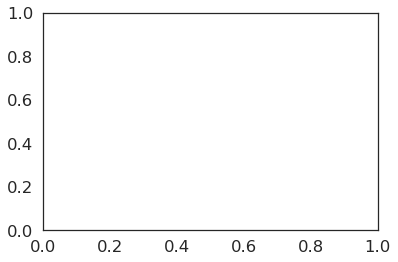

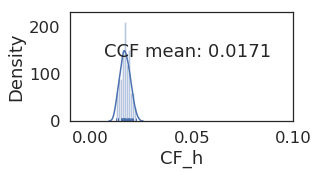

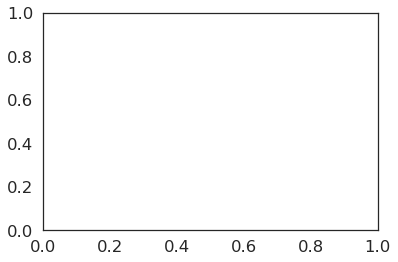

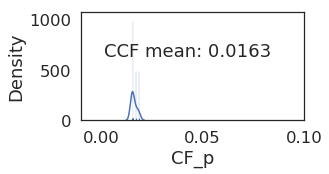

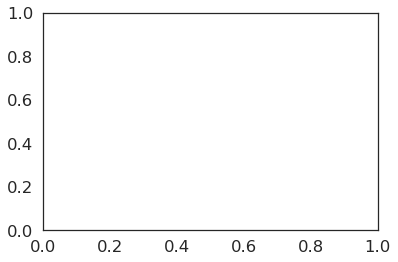

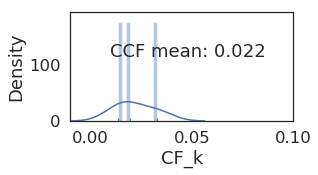

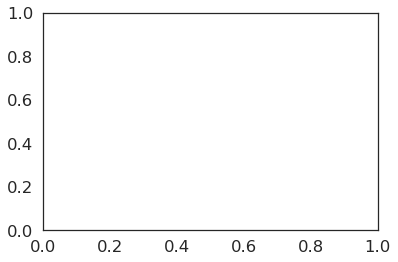

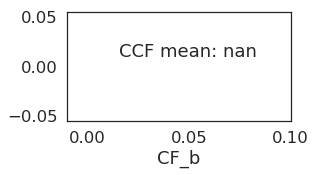

In [80]:
#muts in NB and shared with heart and pancreas
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df4 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]
df5 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]

df1 = pd.concat([df2,df3,df4,df5],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['heart','pancreas','kidney','blood']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 10
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

n muts:  35
CF_h 0.0172
CF_p 0.0172
CF_k 0.0314
CF_b 0.0476
CF_l 0.022


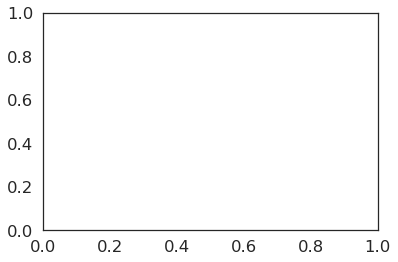

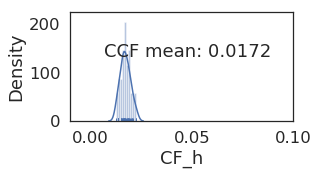

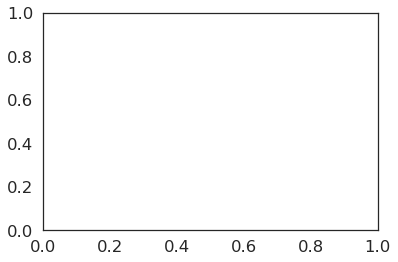

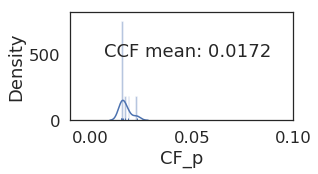

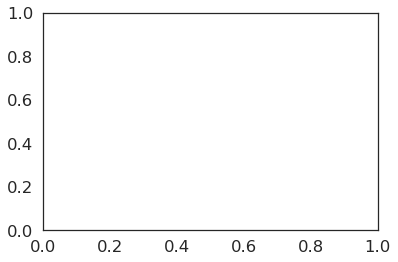

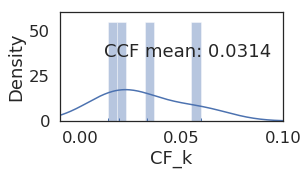

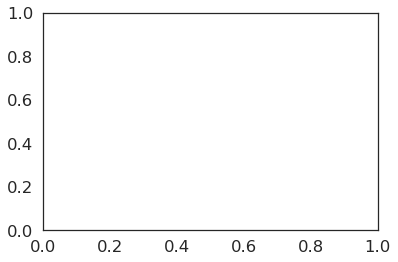

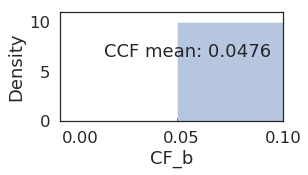

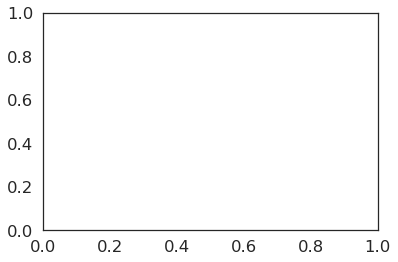

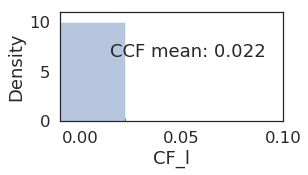

In [81]:
#muts in NB and shared with heart and pancreas
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df4 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]
df5 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]
df6 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]

df1 = pd.concat([df2,df3,df4,df5,df6],ignore_index=True)
print('n muts: ',len(df1))
for tissue in ['heart','pancreas','kidney','blood','liver']:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df1[df1[col]!=0]
    mean = round(data[col].mean(),4)
    print(col, mean)
    y_var = col
    title = ''
    xlim_min = -0.01
    xlim_max = 0.1
    bins = 10
    f, ax = plt.subplots()
    density_plot(data=data,y_var=y_var,title=title,xlim_min=xlim_min,xlim_max=xlim_max,bins=bins)
    plt.text(x=0.4,y=0.4, s='CCF mean: '+str(mean), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

## Mutational profiles

In [82]:
%run /workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


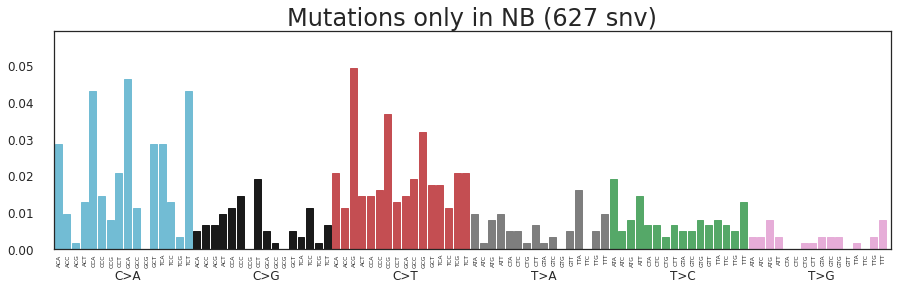

In [83]:
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations only in NB ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


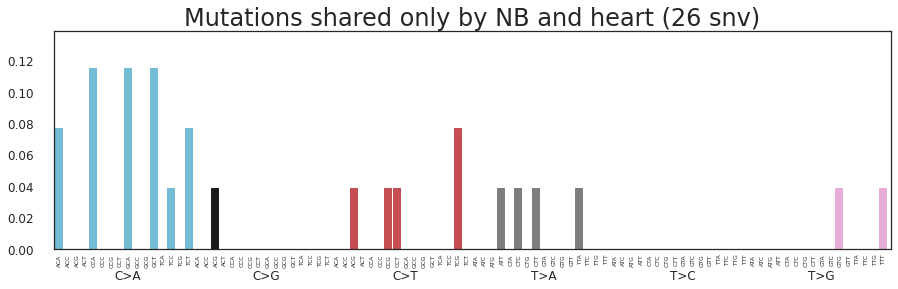

In [84]:
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_k']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by NB and heart ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


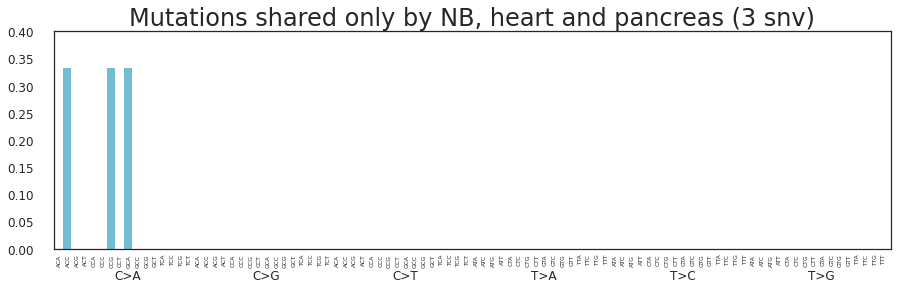

In [85]:
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by NB, heart and pancreas ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

2


/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


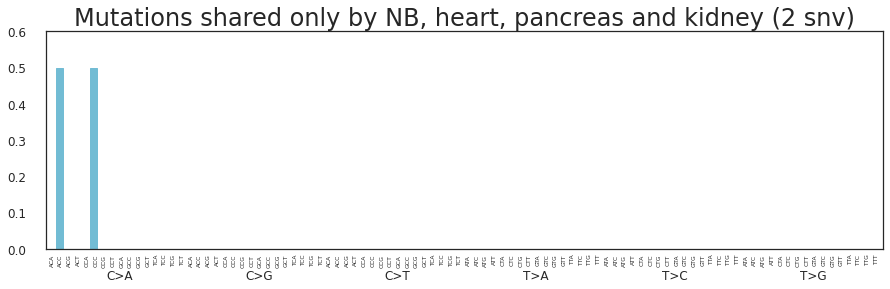

In [86]:
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
df1 = df1[df1['mut_type']=='snv']
print(len(df1))
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by NB, heart, pancreas and kidney ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

In [87]:
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]
df1 = df1[df1['mut_type']=='snv']
print(len(df1))
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by NB, heart, pancreas, kidney and blood ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

0


KeyError: "['TRIPLE' 'TRIPLE_COM_REV'] not found in axis"

In [88]:
df1 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]
df1 = df1[df1['mut_type']=='snv']
print(len(df1))
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations shared only by NB, heart, pancreas, kidney, blood and liver ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

0


KeyError: "['TRIPLE' 'TRIPLE_COM_REV'] not found in axis"

### Cummulative

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


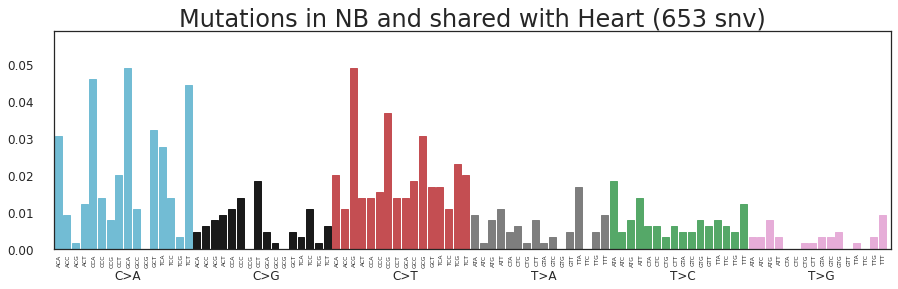

In [89]:
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df1 = pd.concat([df2,df3],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in NB and shared with Heart ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


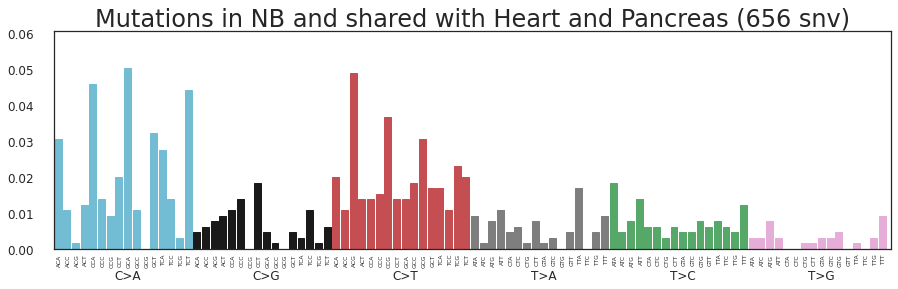

In [90]:
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df4 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]

df1 = pd.concat([df2,df3,df4],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in NB and shared with Heart and Pancreas ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


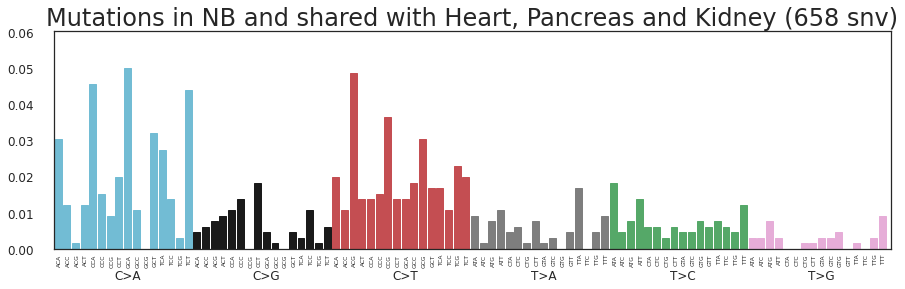

In [91]:
df2 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df3 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df4 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
df5 = df[(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]

df1 = pd.concat([df2,df3,df4,df5],ignore_index=True)
df1 = df1[df1['mut_type']=='snv']
dictionary = df_to_dict(df1)
dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
title = 'Mutations in NB and shared with Heart, Pancreas and Kidney ('+str(len(df1))+ ' snv)'
plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
plt.show()

## Lineage plots

In [92]:
df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_muts_final.tsv.gz',sep='\t')
df

CHROM        POS   REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
0     chr1     865445     G   C     NaN    False      snv      81.0     136.0   
1     chr1    4101122     G   T     NaN    False      snv      81.0     117.0   
2     chr1    4352976     G   A     NaN    False      snv      73.0     121.0   
3     chr1    7591505     T   C     NaN    False      snv      75.0     121.0   
4     chr1    7983849     G   T     NaN    False      snv      76.0     125.0   
...    ...        ...   ...  ..     ...      ...      ...       ...       ...   
2381  chrX   16318693     A   -     NaN    False    indel      88.0     111.0   
2382  chrX   23394410  ACAC   -     NaN    False    indel      97.0     123.0   
2383  chrX   23394410    AC   -     NaN    False    indel      97.0     123.0   
2384  chrX   41403630  TATT   -     NaN    False    indel     132.0     125.0   
2385  chrX  153583477     T   A     NaN    False      snv     113.0     129.0   

      depth_b  ...        qval_k        qval_l        qval_p        qval_h  \
0       128.0  ...  1.872426e-38  8.326159e-42  5.373272e-40  2.306191e-42   
1       134.0  ...  1.774108e-33  1.040770e-42  1.375558e-37  3.703432e-30   
2       126.0  ...  6.286588e-41  2.071960e-47  2.751115e-37  1.555509e-37   
3       129.0  ...  1.126127e-34  1.396898e-34  2.149309e-39  6.672851e-32   
4       127.0  ...  4.685045e-37  1.173988e-39  5.502230e-37  6.902683e-31   
...       ...  ...           ...           ...           ...           ...   
2381    131.0  ...  3.682515e-07  4.956682e-08  3.113480e-09  3.501148e-06   
2382    121.0  ...  2.069128e-05  2.254274e-04  9.428173e-05  3.649476e-01   
2383    121.0  ...  2.069128e-05  2.254274e-04  9.428173e-05  3.649476e-01   
2384    130.0  ...  9.229253e-05  1.463476e-05  2.242604e-02  2.318185e-04   
2385    123.0  ...  3.374850e-14  8.394734e-13  2.941792e-11  1.828509e-09   

           qval_lu       qval_me        qval_s       qval_br       qval_bm  \
0     4.799688e-40  9.956979e-24  3.782159e-47  9.056700e-44  3.238807e-46   
1     4.571182e-37  1.631351e-19  3.782159e-47  7.597310e-37  4.245169e-41   
2     5.631147e-35  2.039189e-20  7.745862e-44  1.732094e-42  4.347053e-38   
3     5.370280e-41  8.552980e-14  2.599080e-36  4.637030e-41  2.072836e-44   
4     3.690428e-30  3.186233e-22  5.909623e-49  1.555929e-33  8.902764e-35   
...            ...           ...           ...           ...           ...   
2381  1.418632e-02  6.446971e-03  2.347286e-05  2.630482e-04  2.585607e-07   
2382  7.616096e-05  9.528563e-02  4.357650e-06  4.175294e-01  3.984886e-03   
2383  7.616096e-05  9.528563e-02  4.357650e-06  4.175294e-01  3.984886e-03   
2384  7.236129e-05  1.320915e-01  1.515457e-06  2.231291e-05  4.291214e-08   
2385  1.242687e-17  3.281117e-11  4.513298e-18  2.588308e-18  9.462586e-15   

      denovo_germline  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
2381            False  
2382            False  
2383            False  
2384            False  
2385            False  

[2386 rows x 180 columns]

#### Check with upset plot the number of shared mutations, and set the order of tissues

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x2b8bae8edc18>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ba62b6e48>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x2b8bae923518>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ca0451320>}

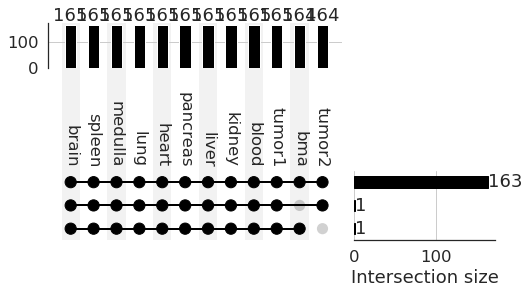

In [94]:
#check tumor1 (NB)
data = df[tissues+['CHROM','POS','REF','ALT']][(df['tumor1']==True)&(df['heart']==True)&(df['pancreas']==True)&(df['kidney']==True)&(df['blood']==True)&(df['liver']==True)]
index = pd.MultiIndex.from_frame(data[tissues])
data.index = index
data.drop(tissues,inplace=True,axis=1)
upset = UpSet(data[0:len(data)], min_subset_size=1, orientation='vertical',sort_by='cardinality',  show_counts=True )
# upset.style_subsets(present=["tumor1", "heart"],
#                     facecolor="red",
#                     label="tumor1-heart")
# upset.style_subsets(present=["tumor1", "kidney"],
#                     facecolor="blue",
#                     label="tumor1-kidney")
# upset.style_subsets(present=["tumor1", "pancreas"],
#                     facecolor="purple",
#                     label="tumor1-liver")
# upset.style_subsets(present=["tumor1", "blood"],
#                     facecolor="green",
#                     label="tumor1-blood")
upset.plot()

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ca0abe198>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ca08da748>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ca4e39ac8>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x2b8ca4ec8860>}

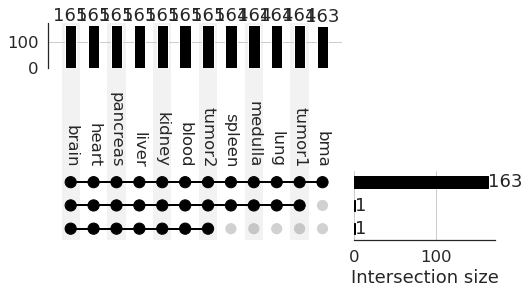

In [95]:
#check tumor2 (RT)
data = df[tissues+['CHROM','POS','REF','ALT']][(df['tumor2']==True)&(df['kidney']==True)&(df['heart']==True)&(df['pancreas']==True)&(df['liver']==True)&(df['blood']==True)]
index = pd.MultiIndex.from_frame(data[tissues])
data.index = index
data.drop(tissues,inplace=True,axis=1)
upset = UpSet(data[0:len(data)], min_subset_size=1, orientation='vertical',sort_by='cardinality',  show_counts=True )
# upset.style_subsets(present=["tumor1", "heart"],
#                     facecolor="red",
#                     label="tumor1-heart")
# upset.style_subsets(present=["tumor1", "kidney"],
#                     facecolor="blue",
#                     label="tumor1-kidney")
# upset.style_subsets(present=["tumor1", "pancreas"],
#                     facecolor="purple",
#                     label="tumor1-liver")
# upset.style_subsets(present=["tumor1", "blood"],
#                     facecolor="green",
#                     label="tumor1-blood")
upset.plot()

In [96]:
#Tumor1 (NB)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal unique NB')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart and pancreas')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart, pancreas and kidney')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]
print(len(df1),'clonal NB and shared with heart, pancreas, kidney and blood')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]
print(len(df1),'clonal NB and shared with heart, pancreas, kidney, blood and liver')

660 clonal unique NB
28 clonal NB and shared with heart
3 clonal NB and shared with heart and pancreas
3 clonal NB and shared with heart, pancreas and kidney
0 clonal NB and shared with heart, pancreas, kidney and blood
1 clonal NB and shared with heart, pancreas, kidney, blood and liver


In [97]:
#Tumor2 (RT)
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal unique RT')
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney')
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney and heart')
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney, heart and pancreas')
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
print(len(df1),'clonal RT and shared with kidney, heart, pancreas and liver')
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]
print(len(df1),'clonal RT and shared with kidney, heart, pancreas, liver and blood')

125 clonal unique RT
214 clonal RT and shared with kidney
413 clonal RT and shared with kidney and heart
104 clonal RT and shared with kidney, heart and pancreas
28 clonal RT and shared with kidney, heart, pancreas and liver
1 clonal RT and shared with kidney, heart, pancreas, liver and blood


In [98]:
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)&(df['n_tissues']==7)]
print(len(df1),'clonals in NB and RT, present in all tissues')
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)]
print(len(df1),'clonals in NB and RT')

4 clonals in NB and RT, present in all tissues
265 clonals in NB and RT


In [99]:
#Tumor1 (NB)
lineage_nb_dict = {}
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
lineage_nb_dict['NB'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
lineage_nb_dict['NB-Heart'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']==0)&(df['AF_b']==0)&(df['AF_l']==0)]
lineage_nb_dict['NB-Heart-Pancreas'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']==0)&(df['AF_l']==0)]
lineage_nb_dict['NB-Heart-Pancreas-Kidney'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']==0)]
lineage_nb_dict['NB-Heart-Pancreas-Kidney-Blood'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]
lineage_nb_dict['NB-Heart-Pancreas-Kidney-Blood-Liver'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_k']!=0)&(df['AF_b']!=0)&(df['AF_l']!=0)]
lineage_nb_dict['NB-Heart-Pancreas-Kidney-Blood-Liver-RT'] = len(df1)
lineage_nb_dict

{'NB': 660,
 'NB-Heart': 28,
 'NB-Heart-Pancreas': 3,
 'NB-Heart-Pancreas-Kidney': 3,
 'NB-Heart-Pancreas-Kidney-Blood': 0,
 'NB-Heart-Pancreas-Kidney-Blood-Liver': 1,
 'NB-Heart-Pancreas-Kidney-Blood-Liver-RT': 164}

In [100]:
#Tumor2 (RT)
lineage_rt_dict = {}
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']==0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
lineage_rt_dict['RT'] = len(df1)
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']==0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
lineage_rt_dict['RT-Kidney'] = len(df1)
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']==0)&(df['AF_l']==0)&(df['AF_b']==0)]
lineage_rt_dict['RT-Kidney-Heart'] = len(df1)
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']==0)&(df['AF_b']==0)]
lineage_rt_dict['RT-Kidney-Heart-Pancreas'] = len(df1)
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']==0)]
lineage_rt_dict['RT-Kidney-Heart-Pancreas-Liver'] = len(df1)
df1 = df[af_cols][(df['AF_t1']==0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]
lineage_rt_dict['RT-Kidney-Heart-Pancreas-Liver-Blood'] = len(df1)
df1 = df[af_cols][(df['AF_t1']!=0)&(df['AF_t2']!=0)&(df['AF_k']!=0)&(df['AF_h']!=0)&(df['AF_p']!=0)&(df['AF_l']!=0)&(df['AF_b']!=0)]
lineage_rt_dict['RT-Kidney-Heart-Pancreas-Liver-Blood-NB'] = len(df1)

lineage_rt_dict

{'RT': 125,
 'RT-Kidney': 214,
 'RT-Kidney-Heart': 413,
 'RT-Kidney-Heart-Pancreas': 104,
 'RT-Kidney-Heart-Pancreas-Liver': 28,
 'RT-Kidney-Heart-Pancreas-Liver-Blood': 1,
 'RT-Kidney-Heart-Pancreas-Liver-Blood-NB': 164}

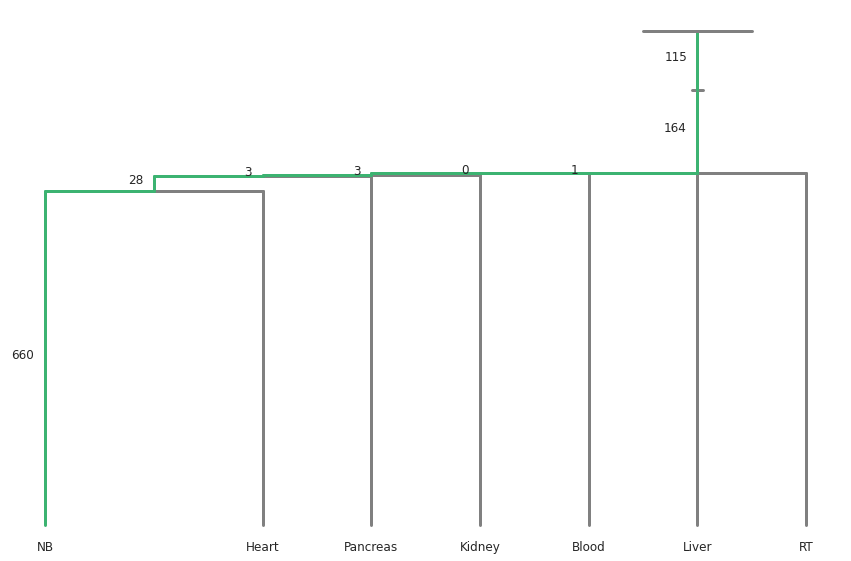

In [101]:
plt.figure(figsize=(15,10)) 
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)

muts2 = 0
x1 = 0
x2 = 4
n = 0
for node in lineage_nb_dict.keys():
    muts1 = muts2
    muts2 = muts2 +lineage_nb_dict[node]
    y1 = muts1
    y2 = muts2

    plt.plot([x1,x1],[y1,y2],color='mediumseagreen',linewidth=3) #Line unique RT
    text = node.split('-')[n]
    if text != 'RT':    
        plt.plot([x1+2,x2],[y2,y2],color='grey',linewidth=3) #connecting line
        plt.plot([x1,x2-2],[y2,y2],color='mediumseagreen',linewidth=3)
        plt.plot([x2,x2],[0,y2],color='grey',linewidth=3)
    
    plt.text(x=x1 - 0.2,y=((y1+y2)/2),s=str(lineage_nb_dict[node]),fontsize=12,horizontalalignment='right')    
    if text == 'NB':
        plt.text(x=x1, y=-50, s=text,fontsize=12,horizontalalignment='center')
    else:
        plt.text(x=x2-2, y=-50, s=text,fontsize=12,horizontalalignment='center')
    n=n+1
    x1 = x1+2
    x2 = x2+2

x1 = x1-2
x2 = x2-2
#plt.text(x=x1+0.6, y=(y1+y2)/2, s='shared all tissues',fontsize=12,horizontalalignment='left')
plt.plot([x2-3.9,x2-4.1],[y2,y2],color='grey',linewidth=3)

muts1 = muts2
muts2 = muts2 + 115 #common in all tissues
y1 = muts1
y2 = muts2
plt.plot([x1,x1],[y1,y2],color='mediumseagreen',linewidth=3)

plt.text(x=x1 - 0.6,y=((y1+y2)/2),s=str(115),fontsize=12)
plt.plot([x1-1,x2-3],[y2,y2],color='grey',linewidth=3)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/figures/lineage_nb_plt.png',dpi=300, transparent = True)

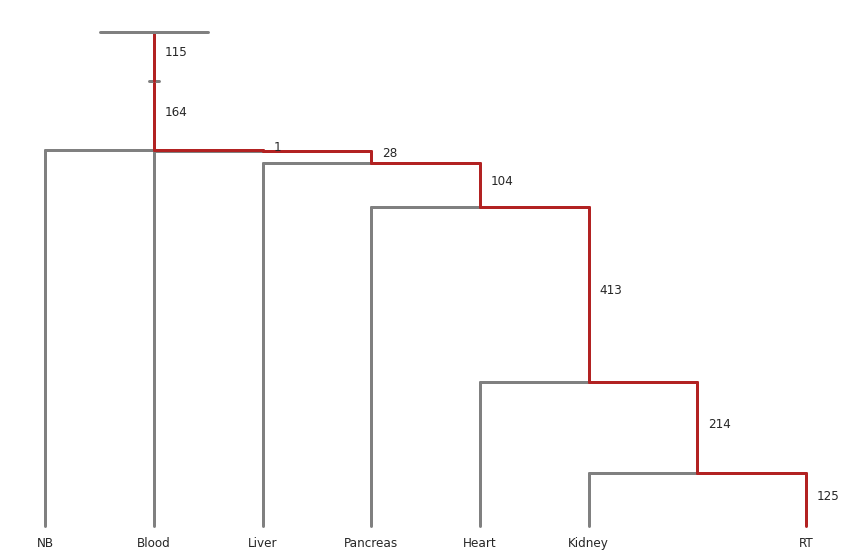

In [102]:
plt.figure(figsize=(15,10)) 
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)

muts2 = 0
x1 = 10
x2 = 6
n = 0
for node in lineage_rt_dict.keys():
    muts1 = muts2
    muts2 = muts2 +lineage_rt_dict[node]
    y1 = muts1
    y2 = muts2

    plt.plot([x1,x1],[y1,y2],color='firebrick',linewidth=3) #Line unique RT
    
    text = node.split('-')[n]
    
    if text != 'NB':    
        plt.plot([x1-2,x2],[y2,y2],color='grey',linewidth=3) #connecting line
        plt.plot([x1,x2+2],[y2,y2],color='firebrick',linewidth=3)
        plt.plot([x2,x2],[0,y2],color='grey',linewidth=3)
    
    plt.text(x=x1 + 0.2,y=((y1+y2)/2),s=str(lineage_rt_dict[node]),fontsize=12)
    
    if text == 'RT':
        plt.text(x=x1, y=-50, s=text,fontsize=12,horizontalalignment='center')
    else:
        plt.text(x=x2+2, y=-50, s=text,fontsize=12,horizontalalignment='center')
    n=n+1
    x1 = x1-2
    x2 = x2-2

x1 = x1+2
x2 = x2+2
#plt.text(x=x1+0.6, y=(y1+y2)/2, s='shared all tissues',fontsize=12,horizontalalignment='left')
plt.plot([x2+3.9,x2+4.1],[y2,y2],color='grey',linewidth=3)

muts1 = muts2
muts2 = muts2 + 115 #common in all tissues
y1 = muts1
y2 = muts2
plt.plot([x1,x1],[y1,y2],color='firebrick',linewidth=3)
plt.plot([x1+1,x2+3],[y2,y2],color='grey',linewidth=3)
plt.text(x=x1 + 0.2,y=((y1+y2)/2),s=str(115),fontsize=12)

plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/figures/lineage_rt_plt.png',dpi=300, transparent = True)

## Check Twinstrand mutagenesis panel

In [103]:
bed_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/data/human-muta-v1.0.targets.hs38DH.bed',sep='\t',header=None)
bed_df = bed_df.rename(columns={0:'CHROM',1:'POS1',2:'POS2',3:'REG',4:'SIZE',5:'SENSE'})
bed_df

CHROM       POS1       POS2          REG  SIZE SENSE
0    chr1   84597127   84599527   region_208   500     +
1    chr2   40162767   40165167  region_2896   500     +
2    chr4   22386244   22388644  region_4173   500     +
3    chr6  155239014  155241414  region_5020   500     +
4    chr7   11732774   11735174  region_5144   500     +
5    chr8   51513056   51515456  region_5520   500     +
6    chr9   23709463   23711863  region_5739   500     +
7   chr10  128969037  128971437   region_784   500     +
8   chr11  108510787  108513187  region_1111   500     +
9   chr12  114115043  114117443  region_1355   500     +
10  chr13   75803912   75806312  region_1501   500     +
11  chr14   74661755   74664155  region_1725   500     +
12  chr15   46089737   46092137  region_1904   500     +
13  chr16   51754103   51756503  region_2115   500     +
14  chr17   70672726   70675126  region_2378   500     +
15  chr18    5749264    5751664  region_2457   500     +
16  chr19   31831021   31833421  region_2739   500     +
17  chr20   24153684   24156084  region_3388   500     +
18  chr21   23665976   23668376  region_3515   500     +
19  chr22   48262370   48264770  region_3703   500     +

In [104]:
def annotate_twinstrand_region(row1,bed_df):
    chrom1 = row1['CHROM']
    pos = row1['POS']
    for row2 in bed_df.iterrows():
        chrom2 = row2[1][0]
        pos1 = row2[1][1]
        pos2 = row2[1][2]
        region = row2[1][3]
        if chrom2 == chrom1 and pos > pos1 and pos < pos2:
            print(row1)
            output = region
            break
        else:
            output = 'NA'
    return output
df['twinstrand_mutagenesis_region'] = df.apply(lambda row: annotate_twinstrand_region(row,bed_df), axis=1)
df

CHROM        POS   REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
0     chr1     865445     G   C     NaN    False      snv      81.0     136.0   
1     chr1    4101122     G   T     NaN    False      snv      81.0     117.0   
2     chr1    4352976     G   A     NaN    False      snv      73.0     121.0   
3     chr1    7591505     T   C     NaN    False      snv      75.0     121.0   
4     chr1    7983849     G   T     NaN    False      snv      76.0     125.0   
...    ...        ...   ...  ..     ...      ...      ...       ...       ...   
2381  chrX   16318693     A   -     NaN    False    indel      88.0     111.0   
2382  chrX   23394410  ACAC   -     NaN    False    indel      97.0     123.0   
2383  chrX   23394410    AC   -     NaN    False    indel      97.0     123.0   
2384  chrX   41403630  TATT   -     NaN    False    indel     132.0     125.0   
2385  chrX  153583477     T   A     NaN    False      snv     113.0     129.0   

      depth_b  ...        qval_l        qval_p        qval_h       qval_lu  \
0       128.0  ...  8.326159e-42  5.373272e-40  2.306191e-42  4.799688e-40   
1       134.0  ...  1.040770e-42  1.375558e-37  3.703432e-30  4.571182e-37   
2       126.0  ...  2.071960e-47  2.751115e-37  1.555509e-37  5.631147e-35   
3       129.0  ...  1.396898e-34  2.149309e-39  6.672851e-32  5.370280e-41   
4       127.0  ...  1.173988e-39  5.502230e-37  6.902683e-31  3.690428e-30   
...       ...  ...           ...           ...           ...           ...   
2381    131.0  ...  4.956682e-08  3.113480e-09  3.501148e-06  1.418632e-02   
2382    121.0  ...  2.254274e-04  9.428173e-05  3.649476e-01  7.616096e-05   
2383    121.0  ...  2.254274e-04  9.428173e-05  3.649476e-01  7.616096e-05   
2384    130.0  ...  1.463476e-05  2.242604e-02  2.318185e-04  7.236129e-05   
2385    123.0  ...  8.394734e-13  2.941792e-11  1.828509e-09  1.242687e-17   

           qval_me        qval_s       qval_br       qval_bm  denovo_germline  \
0     9.956979e-24  3.782159e-47  9.056700e-44  3.238807e-46            False   
1     1.631351e-19  3.782159e-47  7.597310e-37  4.245169e-41            False   
2     2.039189e-20  7.745862e-44  1.732094e-42  4.347053e-38            False   
3     8.552980e-14  2.599080e-36  4.637030e-41  2.072836e-44            False   
4     3.186233e-22  5.909623e-49  1.555929e-33  8.902764e-35            False   
...            ...           ...           ...           ...              ...   
2381  6.446971e-03  2.347286e-05  2.630482e-04  2.585607e-07            False   
2382  9.528563e-02  4.357650e-06  4.175294e-01  3.984886e-03            False   
2383  9.528563e-02  4.357650e-06  4.175294e-01  3.984886e-03            False   
2384  1.320915e-01  1.515457e-06  2.231291e-05  4.291214e-08            False   
2385  3.281117e-11  4.513298e-18  2.588308e-18  9.462586e-15            False   

      twinstrand_mutagenesis_region  
0                                NA  
1                                NA  
2                                NA  
3                                NA  
4                                NA  
...                             ...  
2381                             NA  
2382                             NA  
2383                             NA  
2384                             NA  
2385                             NA  

[2386 rows x 181 columns]

In [105]:
df[df['twinstrand_mutagenesis_region']!='NA']

Empty DataFrame
Columns: [CHROM, POS, REF, ALT, _merge, parents, mut_type, depth_t1, depth_t2, depth_b, depth_k, depth_l, depth_p, depth_h, depth_lu, depth_me, depth_s, depth_br, depth_bm, filter_depth_t1, filter_depth_t2, filter_depth_b, filter_depth_k, filter_depth_l, filter_depth_p, filter_depth_h, filter_depth_lu, filter_depth_me, filter_depth_s, filter_depth_br, filter_depth_bm, filter_depth_all, AF_t1, ref_reads_t1, alt_reads_t1, DP_t1, AF_t2, ref_reads_t2, alt_reads_t2, DP_t2, AF_b, ref_reads_b, alt_reads_b, DP_b, AF_k, ref_reads_k, alt_reads_k, DP_k, AF_l, ref_reads_l, alt_reads_l, DP_l, AF_p, ref_reads_p, alt_reads_p, DP_p, AF_h, ref_reads_h, alt_reads_h, DP_h, AF_lu, ref_reads_lu, alt_reads_lu, DP_lu, AF_me, ref_reads_me, alt_reads_me, DP_me, AF_s, ref_reads_s, alt_reads_s, DP_s, AF_br, ref_reads_br, alt_reads_br, DP_br, AF_bm, ref_reads_bm, alt_reads_bm, DP_bm, AF_m, ref_reads_m, alt_reads_m, DP_m, AF_f, ref_reads_f, alt_reads_f, DP_f, tumor1, tumor2, blood, kidney, liver, pancreas, heart, lung, medulla, spleen, brain, bma, ...]
Index: []

[0 rows x 181 columns]

 ## Clustermap version2

In [52]:
suffixes = [ suffixes_dict[tissue] for tissue in tissues]
cf_cols = ['CF'+suffix for suffix in suffixes]
suffixes3_dict = {suffix[1]:suffix[0] for suffix in suffixes_dict.items()}
label_cols_dict = {col:suffixes3_dict[col.split('CF')[1]] for col in cf_cols}
label_cols_dict['CF_t1'] = 'NB'
label_cols_dict['CF_t2'] = 'RT'
label_cols = [label_cols_dict[af] for af in label_cols_dict.keys()]


In [53]:
df

CHROM        POS   REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
0     chr1     865445     G   C     NaN    False      snv      81.0     136.0   
1     chr1    4101122     G   T     NaN    False      snv      81.0     117.0   
2     chr1    4352976     G   A     NaN    False      snv      73.0     121.0   
3     chr1    7591505     T   C     NaN    False      snv      75.0     121.0   
4     chr1    7983849     G   T     NaN    False      snv      76.0     125.0   
...    ...        ...   ...  ..     ...      ...      ...       ...       ...   
2381  chrX   16318693     A   -     NaN    False    indel      88.0     111.0   
2382  chrX   23394410  ACAC   -     NaN    False    indel      97.0     123.0   
2383  chrX   23394410    AC   -     NaN    False    indel      97.0     123.0   
2384  chrX   41403630  TATT   -     NaN    False    indel     132.0     125.0   
2385  chrX  153583477     T   A     NaN    False      snv     113.0     129.0   

      depth_b  ...    CF_b    CF_k    CF_l    CF_p    CF_h   CF_lu   CF_me  \
0       128.0  ...  0.0000  0.0526  0.0000  0.0000  0.0132  0.0140  0.0000   
1       134.0  ...  0.0000  0.0322  0.0000  0.0000  0.0182  0.0152  0.0000   
2       126.0  ...  0.0000  0.0140  0.0120  0.0000  0.0284  0.0000  0.0000   
3       129.0  ...  0.0000  0.0164  0.0000  0.0000  0.0000  0.0000  0.0000   
4       127.0  ...  0.0000  0.0154  0.0142  0.0000  0.0746  0.0000  0.0000   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
2381    131.0  ...  0.3116  0.4102  0.3810  0.2972  0.4566  0.6216  0.4782   
2382    121.0  ...  0.5748  0.5228  0.5882  0.5394  0.7180  0.4722  0.5714   
2383    121.0  ...  0.5748  0.5228  0.5882  0.5394  0.7180  0.4722  0.5714   
2384    130.0  ...  0.4694  0.6230  0.5054  0.6948  0.5632  0.5688  0.6274   
2385    123.0  ...  0.3902  0.3484  0.3304  0.3968  0.4166  0.2018  0.1818   

        CF_s   CF_br   CF_bm  
0     0.0000  0.0000  0.0000  
1     0.0000  0.0000  0.0000  
2     0.0000  0.0132  0.0000  
3     0.0000  0.0000  0.0000  
4     0.0000  0.0000  0.0000  
...      ...     ...     ...  
2381  0.4594  0.4722  0.4048  
2382  0.5310  0.7450  0.5974  
2383  0.5310  0.7450  0.5974  
2384  0.5522  0.5424  0.4706  
2385  0.2314  0.1818  0.2000  

[2386 rows x 232 columns]

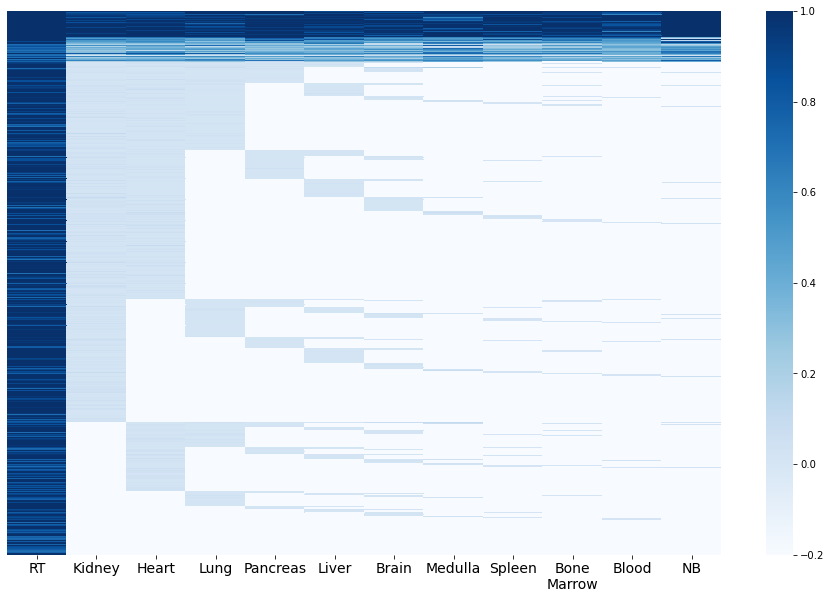

In [54]:
order_cols = ['CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b','CF_t1']
order_cols2 = ['denovo_germline','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood','tumor1']
x_labels = ['RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood','NB']

data = df[df['AF_t2']>0.2].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['SYMBOL','#Uploaded_variation'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)

fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap="Blues",vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/heatmap_blue_rt_plot.pdf') 
plt.show()

In [56]:
print(len(df[df['CF_t2']!=0]),'total mutations RT')

1569 total mutations RT


In [57]:
print(len(df[df['CF_t1']!=0]),'total mutations NB')

1082 total mutations NB


In [58]:
print(len(df[(df['denovo_germline']==True)]),'denovo germline')

85 denovo germline


In [59]:
print(len(df[(df['denovo_germline']==False)&(df['n_tissues']==7)]),'somatic shared all tissues')

15 somatic shared all tissues


In [60]:
print(len(df[(df['n_tissues']!=7)&(df['CF_t1']!=0)&((df['CF_t2']!=0)|(df['CF_b']!=0)|(df['CF_k']!=0)|(df['CF_l']!=0)|(df['CF_p']!=0)|(df['CF_h']!=0))]),'muts shared with some tissues NB')

416 muts shared with some tissues NB


In [61]:
print(len(df[(df['CF_t1']!=0)&(df['CF_t2']==0)&(df['CF_b']==0)&(df['CF_k']==0)&(df['CF_l']==0)&(df['CF_p']==0)&(df['CF_h']==0)]),'muts unique NB')

660 muts unique NB


In [62]:
print(len(df[(df['n_tissues']!=7)&(df['CF_t2']!=0)&((df['CF_t1']!=0)|(df['CF_b']!=0)|(df['CF_k']!=0)|(df['CF_l']!=0)|(df['CF_p']!=0)|(df['CF_h']!=0))]),'muts shared with some tissues RT')

1431 muts shared with some tissues RT


In [63]:
print(len(df[(df['CF_t2']!=0)&(df['CF_t1']==0)&(df['CF_b']==0)&(df['CF_k']==0)&(df['CF_l']==0)&(df['CF_p']==0)&(df['CF_h']==0)]),'muts unique RT')

125 muts unique RT


In [64]:
df[['CF_t1','CF_t2','CF_b','CF_l','CF_p','CF_h']][(df['n_tissues']!=7)&(df['CF_t1']!=0)&((df['CF_t2']!=0)|(df['CF_b']!=0)|(df['CF_k']!=0)|(df['CF_l']!=0)|(df['CF_p']!=0)|(df['CF_h']!=0))]

CF_t1     CF_t2    CF_b    CF_l    CF_p    CF_h
10    0.028861  1.004483  0.0148  0.0000  0.0000  0.0154
12    0.355949  1.293103  0.8148  0.6334  1.0158  0.6918
23    2.091392  1.661379  0.8806  1.0870  1.1052  0.9120
29    0.284557  1.341034  0.7888  0.7188  0.8824  0.8472
42    2.219494  1.948966  0.8730  1.0308  0.7556  1.1074
...        ...       ...     ...     ...     ...     ...
2381  0.374937  0.699655  0.3116  0.3810  0.2972  0.4566
2382  0.775949  0.925172  0.5748  0.5882  0.5394  0.7180
2383  0.775949  0.925172  0.5748  0.5882  0.5394  0.7180
2384  0.784810  0.879655  0.4694  0.5054  0.6948  0.5632
2385  0.441287  0.705817  0.3902  0.3304  0.3968  0.4166

[416 rows x 6 columns]

In [65]:
143+1400+67+105

1715

In [66]:
776+295+67+105

1243

In [67]:
len(df[df['CF_t1']!=0])

1082

In [68]:
len(df[(df['CF_t1']!=0)&(df['denovo_germline']==False)])

997

In [69]:
1243 -1138

105

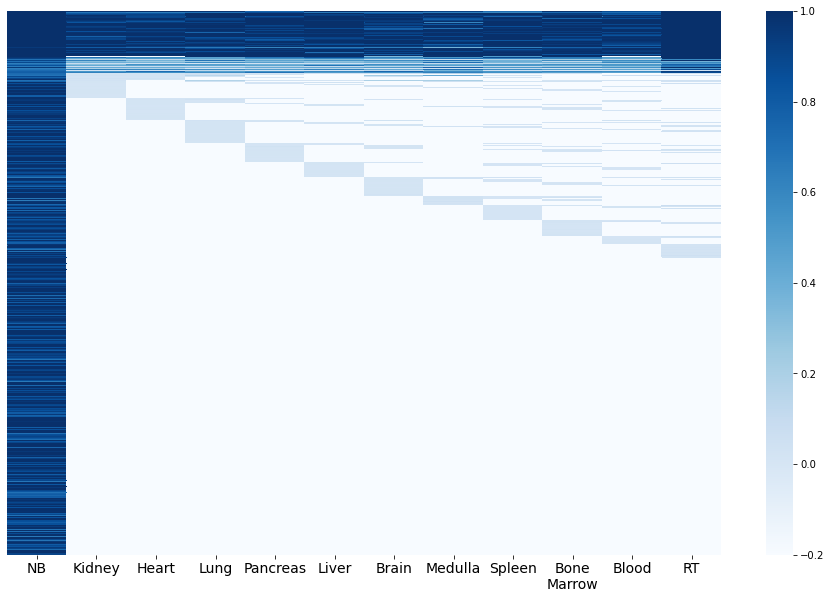

In [223]:
order_cols = ['CF_t1','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b','CF_t2']
order_cols2 = ['denovo_germline','tumor1','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood','tumor2']
x_labels = ['NB','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood','RT']

data = df[df['AF_t1']>0.25].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap="Blues",vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
plt.show()

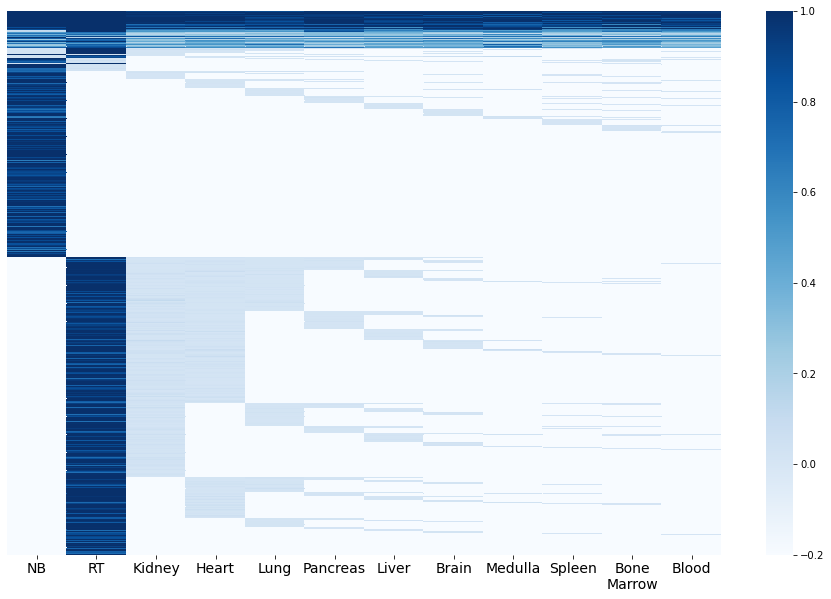

In [222]:
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']


data = df.sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
plt.show()

163


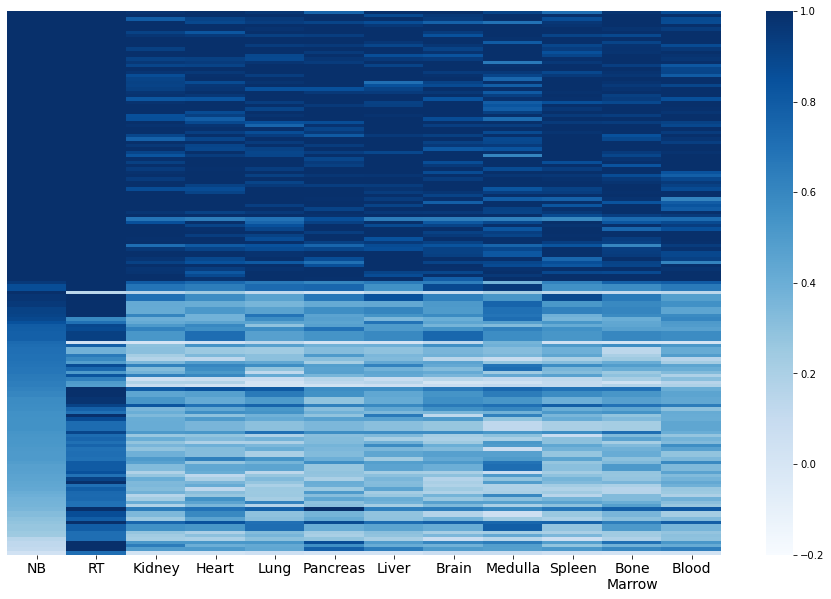

In [221]:
#
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[df['n_tissues']>=12].sort_values(by=order_cols,ascending=False)
data = data.sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
print(len(data))
plt.show()

Mutations present in 1 tissue(s)
611 mutations


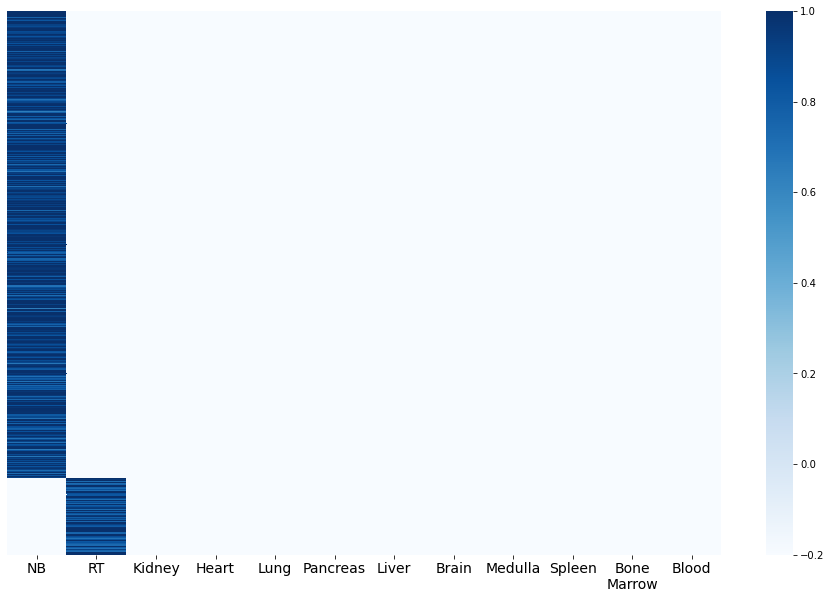

Mutations present in 2 tissue(s)
394 mutations


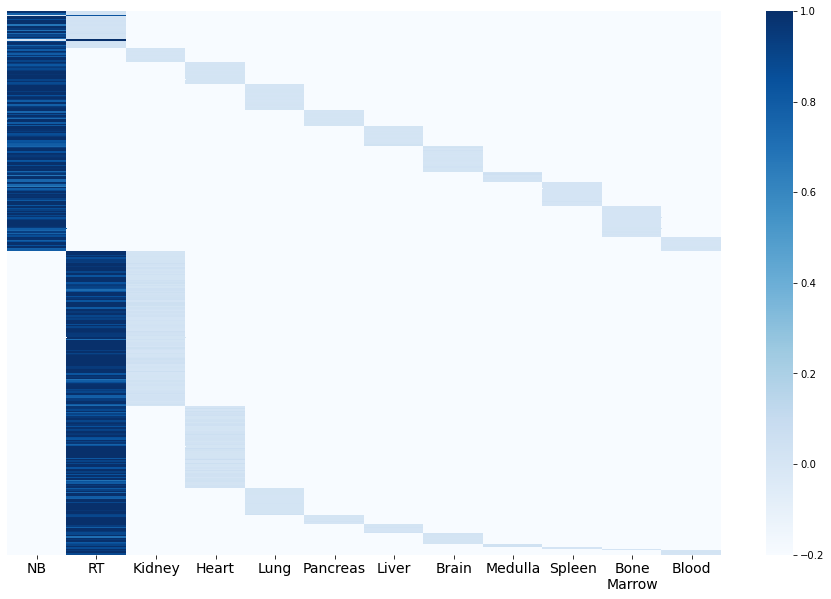

Mutations present in 3 tissue(s)
470 mutations


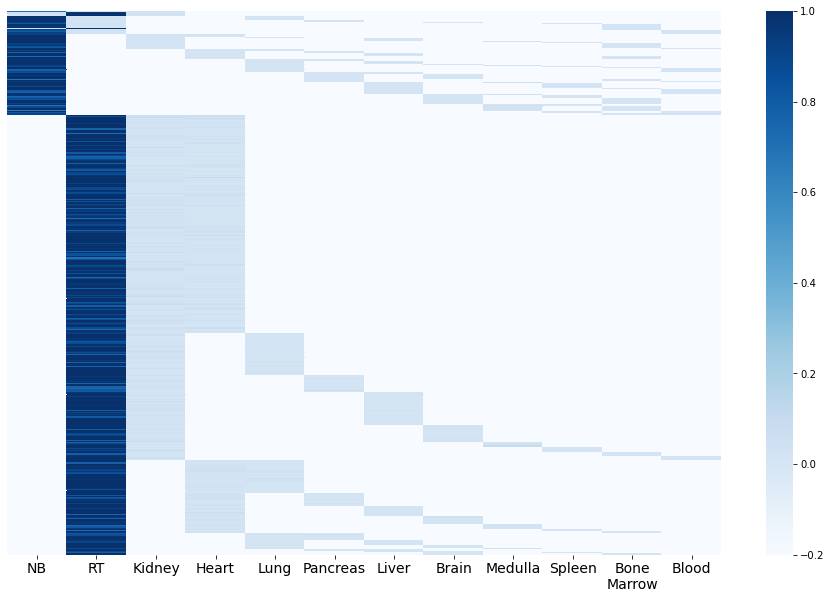

Mutations present in 4 tissue(s)
397 mutations


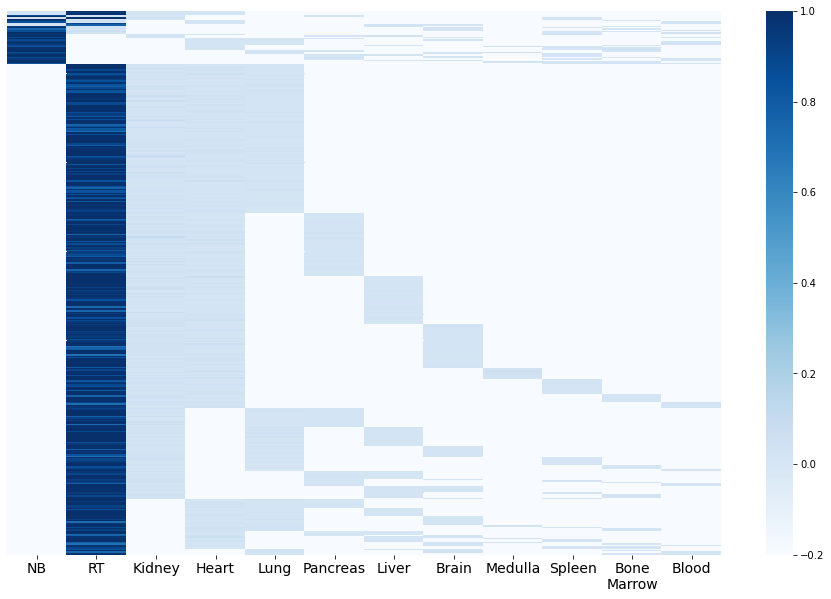

Mutations present in 5 tissue(s)
142 mutations


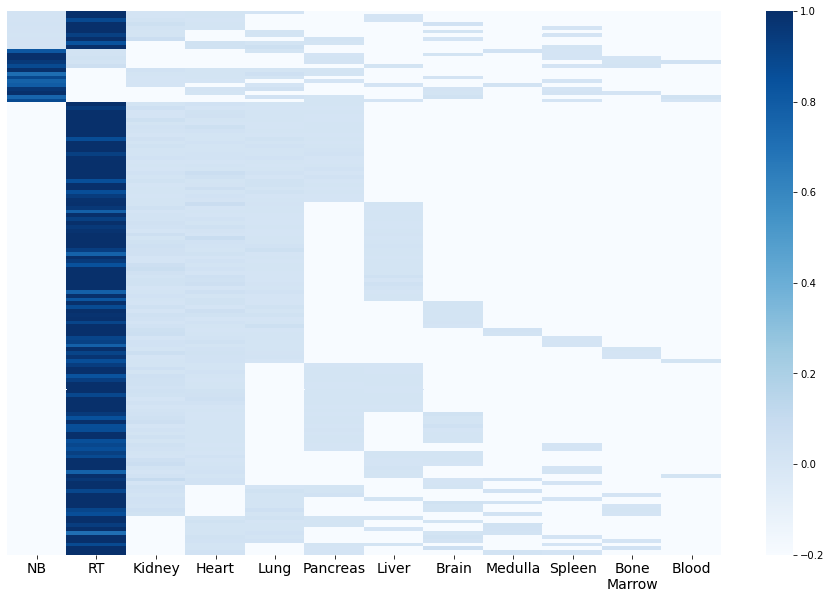

Mutations present in 6 tissue(s)
48 mutations


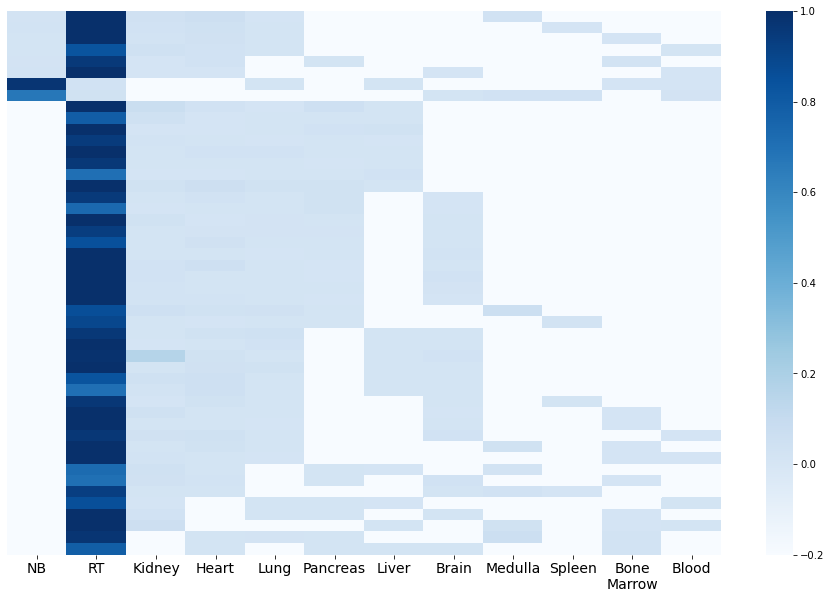

Mutations present in 7 tissue(s)
14 mutations


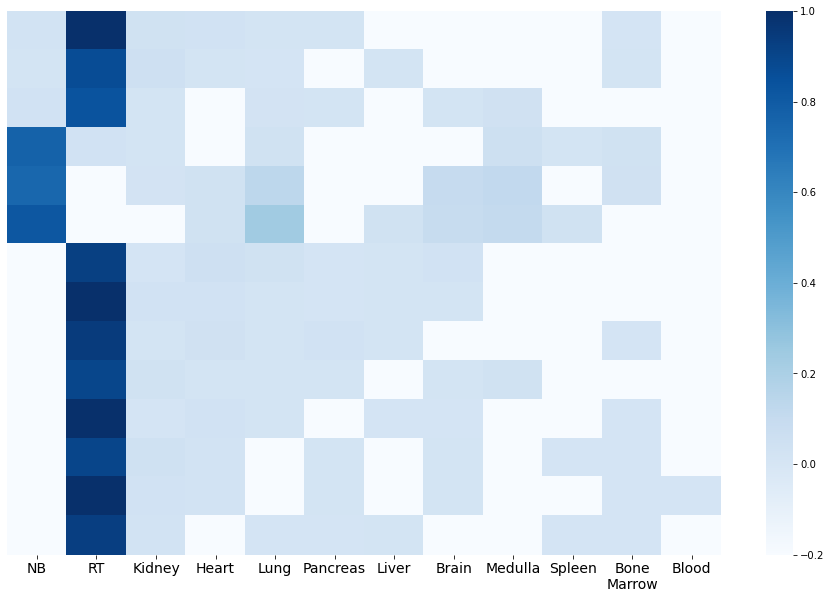

Mutations present in 8 tissue(s)
2 mutations


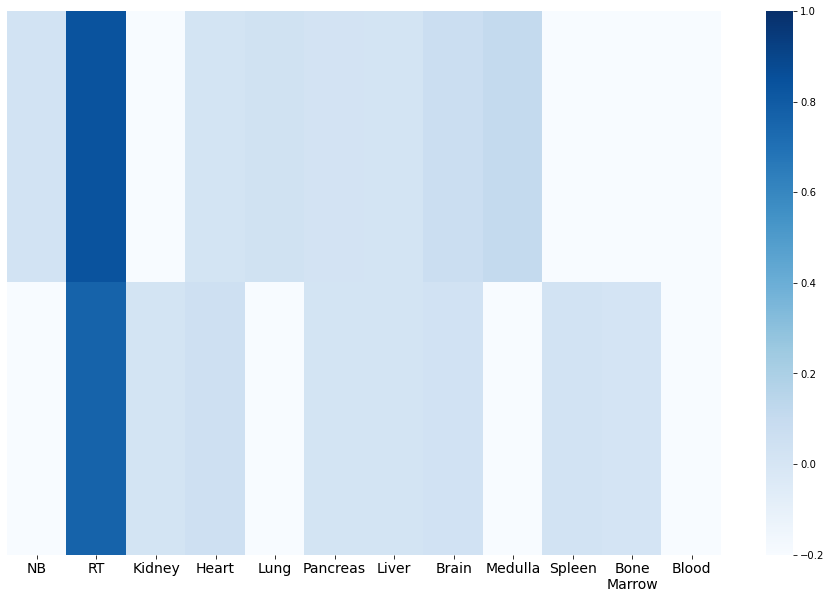

Mutations present in 9 tissue(s)
7 mutations


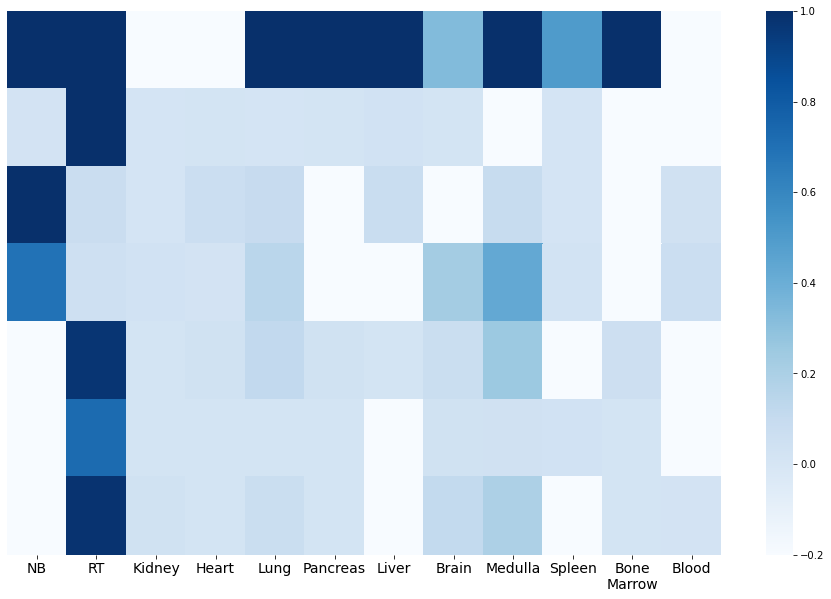

Mutations present in 10 tissue(s)
1 mutations


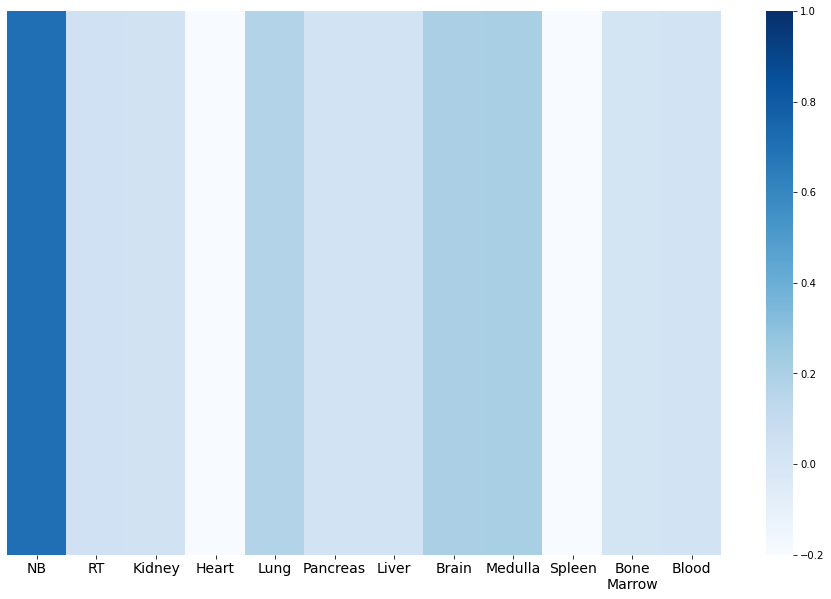

Mutations present in 11 tissue(s)
4 mutations


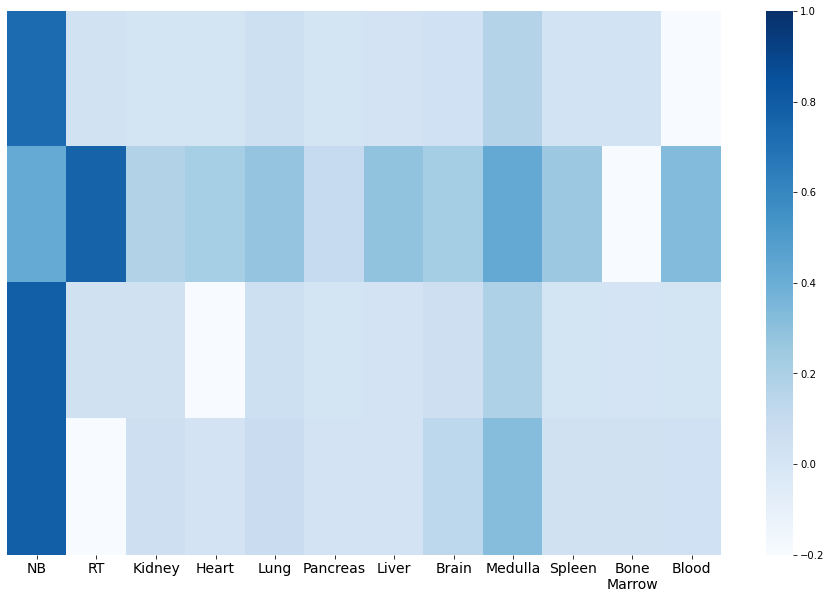

Mutations present in 12 tissue(s)
138 mutations


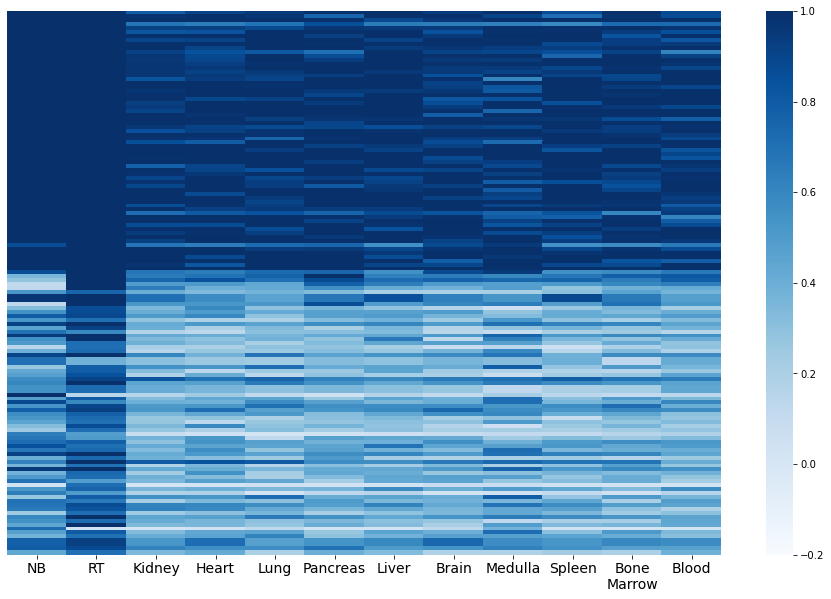

In [73]:
for n in range(1,13):
    print('Mutations present in',n,'tissue(s)')
    order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
    order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
    x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']

    data = df[df['n_tissues']==n].sort_values(by=order_cols2,ascending=False)
    data = data.drop_duplicates(subset=['SYMBOL','#Uploaded_variation'])
    data = data.set_index(['SYMBOL','Consequence'])
    data.index_name = ''
    data[order_cols] = data[order_cols].replace(0,-0.2)
    fig, ax = plt.subplots(figsize=(16,10)) 
    ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
    plt.xticks(fontsize=14,rotation=0)
    plt.ylabel('')
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
    print(len(data), 'mutations')
    plt.show()

## Remove alterations clonal in 1 tumor and subclonal in the other (likely artifacts)
### (this is the data used in the paper)
Some corrections were made: some mutations were not properly counted because the were grouped by a field that was NAN in some mutations (`[#Uploaded_variation]`). Now it is grouped by `['CHROM','POS','REF','ALT']`

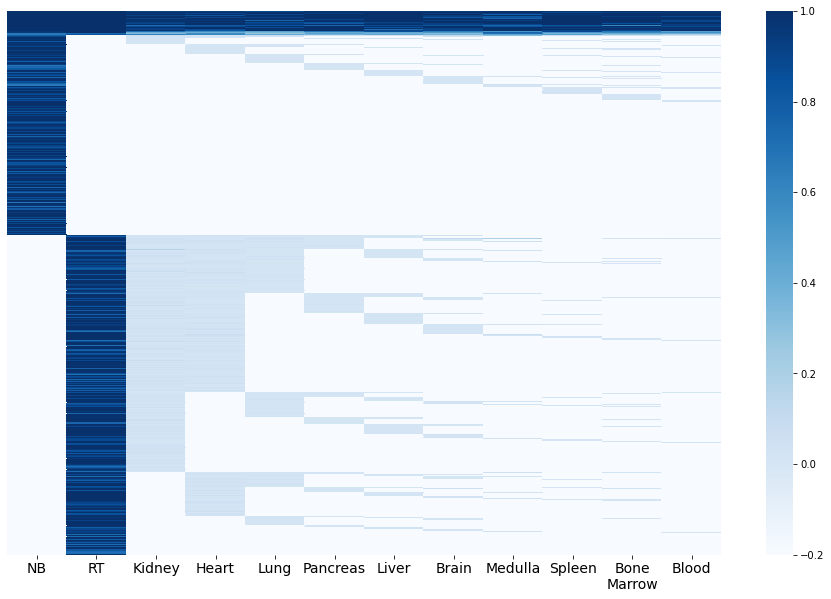

In [282]:
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[((df['AF_t1']>=0.25)&(df['AF_t2']==0))|((df['AF_t2']>=0.2)&(df['AF_t1']==0))|((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
plt.show()

In [283]:
print(len(data[data['denovo_germline']==True]),'denovo germline')
print(len(data[(data['denovo_germline']==False)&(data['n_tissues']==12)]),'somatic shared with all tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)]),'somatic NB ')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']==11)]),'somatic NB shared with 11 tissues, not in MRT')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']<11)]),'somatic NB shared with less than 11 tissues, not in MRT')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']==1)]),'somatic unique NB')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)]),'somatic MRT')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']==9)]),'somatic MRT shared with 9 tissues, not in NB')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']<9)]),'somatic MRT, shared with less than 9 tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']==1)]),'somatic unique MRT')

85 denovo germline
17 somatic shared with all tissues
817 somatic NB 
1 somatic NB shared with 11 tissues, not in MRT
816 somatic NB shared with less than 11 tissues, not in MRT
274 somatic NB shared with some tissues
543 somatic unique NB
1304 somatic MRT
3 somatic MRT shared with 9 tissues, not in NB
1301 somatic MRT, shared with less than 9 tissues
1218 somatic MRT shared with some tissues
86 somatic unique MRT


In [284]:
snv_data = data[data['mut_type']=='snv']

In [285]:
print(len(snv_data[snv_data['denovo_germline']==True]),'denovo germline')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['n_tissues']==12)]),'somatic shared with all tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)]),'somatic NB ')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']==11)]),'somatic NB shared with 11 tissues, not in MRT')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']<11)]),'somatic NB shared with less than 11 tissues, not in MRT')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']==1)]),'somatic unique NB')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)]),'somatic MRT')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']==9)]),'somatic MRT shared with 9 tissues, not in NB')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']<9)]),'somatic MRT, shared with less than 9 tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']==1)]),'somatic unique MRT')

80 denovo germline
1 somatic shared with all tissues
777 somatic NB 
0 somatic NB shared with 11 tissues, not in MRT
777 somatic NB shared with less than 11 tissues, not in MRT
260 somatic NB shared with some tissues
517 somatic unique NB
1151 somatic MRT
0 somatic MRT shared with 9 tissues, not in NB
1151 somatic MRT, shared with less than 9 tissues
1073 somatic MRT shared with some tissues
78 somatic unique MRT


In [286]:
indel_data = data[data['mut_type']=='indel']

In [287]:
print(len(indel_data[indel_data['denovo_germline']==True]),'denovo germline')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['n_tissues']==12)]),'somatic shared with all tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)]),'somatic NB ')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']==11)]),'somatic NB shared with 11 tissues, not in MRT')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']<11)]),'somatic NB shared with less than 11 tissues, not in MRT')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']==1)]),'somatic unique NB')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)]),'somatic MRT')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']==9)]),'somatic MRT shared with 9 tissues, not in NB')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']<9)]),'somatic MRT, shared with less than 9 tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']==1)]),'somatic unique MRT')

5 denovo germline
16 somatic shared with all tissues
40 somatic NB 
1 somatic NB shared with 11 tissues, not in MRT
39 somatic NB shared with less than 11 tissues, not in MRT
14 somatic NB shared with some tissues
26 somatic unique NB
153 somatic MRT
3 somatic MRT shared with 9 tissues, not in NB
150 somatic MRT, shared with less than 9 tissues
145 somatic MRT shared with some tissues
8 somatic unique MRT


In [212]:
df[df['#Uploaded_variation'].isnull()]

CHROM        POS REF           ALT  _merge  parents mut_type  depth_t1  \
0      chr1     865445   G             C     NaN    False      snv      81.0   
2      chr1    4352976   G             A     NaN    False      snv      73.0   
7      chr1   10318671   A             G     NaN    False      snv      81.0   
41     chr1   69807254   G             T     NaN    False      snv      82.0   
53     chr1   87545582   G             T     NaN    False      snv      65.0   
...     ...        ...  ..           ...     ...      ...      ...       ...   
2349  chr15   30283246   -         AAAAA     NaN    False    indel     124.0   
2351  chr16    1030052  AA             -     NaN    False    indel      96.0   
2358   chr2  173429997  AA             -     NaN    False    indel      93.0   
2365   chr5   92154321   -  GTGTGTGTGCGC     NaN    False    indel     127.0   
2367   chr6   90428221  TT             -     NaN    False    indel     105.0   

      depth_t2  depth_b  ...    CF_b    CF_k    CF_l    CF_p    CF_h   CF_lu  \
0        136.0    128.0  ...  0.0000  0.0526  0.0000  0.0000  0.0132  0.0140   
2        121.0    126.0  ...  0.0000  0.0140  0.0120  0.0000  0.0284  0.0000   
7        164.0    132.0  ...  0.0000  0.0140  0.0154  0.0000  0.0172  0.0000   
41       125.0    122.0  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
53       116.0    163.0  ...  0.0000  0.0298  0.0140  0.0174  0.0500  0.0000   
...        ...      ...  ...     ...     ...     ...     ...     ...     ...   
2349     109.0    140.0  ...  0.3076  0.0714  0.0930  0.1640  0.0952  0.0870   
2351     112.0    109.0  ...  0.5916  0.4676  0.4828  0.5634  0.2740  0.3684   
2358     116.0     95.0  ...  0.0678  0.0338  0.0000  0.0000  0.0238  0.1446   
2365     111.0    103.0  ...  0.4166  0.4040  0.3448  0.3830  0.5632  0.5412   
2367     129.0    127.0  ...  0.0476  0.0594  0.0220  0.0228  0.0224  0.0800   

       CF_me    CF_s   CF_br   CF_bm  
0     0.0000  0.0000  0.0000  0.0000  
2     0.0000  0.0000  0.0132  0.0000  
7     0.0000  0.0000  0.0000  0.0000  
41    0.0266  0.0000  0.0158  0.0140  
53    0.0000  0.0000  0.0000  0.0000  
...      ...     ...     ...     ...  
2349  0.1142  0.1312  0.1482  0.2142  
2351  0.6876  0.2736  0.5060  0.3428  
2358  0.4324  0.0254  0.2298  0.0000  
2365  0.3824  0.5124  0.3542  0.5420  
2367  0.3158  0.0354  0.1348  0.0388  

[169 rows x 232 columns]

In [213]:
df[df['SYMBOL'].isnull()]

CHROM        POS REF           ALT  _merge  parents mut_type  depth_t1  \
0      chr1     865445   G             C     NaN    False      snv      81.0   
2      chr1    4352976   G             A     NaN    False      snv      73.0   
7      chr1   10318671   A             G     NaN    False      snv      81.0   
41     chr1   69807254   G             T     NaN    False      snv      82.0   
53     chr1   87545582   G             T     NaN    False      snv      65.0   
...     ...        ...  ..           ...     ...      ...      ...       ...   
2349  chr15   30283246   -         AAAAA     NaN    False    indel     124.0   
2351  chr16    1030052  AA             -     NaN    False    indel      96.0   
2358   chr2  173429997  AA             -     NaN    False    indel      93.0   
2365   chr5   92154321   -  GTGTGTGTGCGC     NaN    False    indel     127.0   
2367   chr6   90428221  TT             -     NaN    False    indel     105.0   

      depth_t2  depth_b  ...    CF_b    CF_k    CF_l    CF_p    CF_h   CF_lu  \
0        136.0    128.0  ...  0.0000  0.0526  0.0000  0.0000  0.0132  0.0140   
2        121.0    126.0  ...  0.0000  0.0140  0.0120  0.0000  0.0284  0.0000   
7        164.0    132.0  ...  0.0000  0.0140  0.0154  0.0000  0.0172  0.0000   
41       125.0    122.0  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
53       116.0    163.0  ...  0.0000  0.0298  0.0140  0.0174  0.0500  0.0000   
...        ...      ...  ...     ...     ...     ...     ...     ...     ...   
2349     109.0    140.0  ...  0.3076  0.0714  0.0930  0.1640  0.0952  0.0870   
2351     112.0    109.0  ...  0.5916  0.4676  0.4828  0.5634  0.2740  0.3684   
2358     116.0     95.0  ...  0.0678  0.0338  0.0000  0.0000  0.0238  0.1446   
2365     111.0    103.0  ...  0.4166  0.4040  0.3448  0.3830  0.5632  0.5412   
2367     129.0    127.0  ...  0.0476  0.0594  0.0220  0.0228  0.0224  0.0800   

       CF_me    CF_s   CF_br   CF_bm  
0     0.0000  0.0000  0.0000  0.0000  
2     0.0000  0.0000  0.0132  0.0000  
7     0.0000  0.0000  0.0000  0.0000  
41    0.0266  0.0000  0.0158  0.0140  
53    0.0000  0.0000  0.0000  0.0000  
...      ...     ...     ...     ...  
2349  0.1142  0.1312  0.1482  0.2142  
2351  0.6876  0.2736  0.5060  0.3428  
2358  0.4324  0.0254  0.2298  0.0000  
2365  0.3824  0.5124  0.3542  0.5420  
2367  0.3158  0.0354  0.1348  0.0388  

[169 rows x 232 columns]

In [218]:
print(len(df[(df['denovo_germline']==True)&(((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2))|((df['AF_t1']>=0.25)&(df['AF_t2']==0))|((df['AF_t1']==0)&(df['AF_t2']>=0.2)))]),'denovo germline')
print(len(df[(df['denovo_germline']==False)&(df['n_tissues']==12)]),'somatic shared with all tissues')
print(len(df[(df['denovo_germline']==False)&(df['AF_t1']!=0)&(df['AF_t2']==0)]),'somatic NB ')
print(len(df[(df['denovo_germline']==False)&(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']==11)]),'somatic NB shared with 11 tissues, not in RT')
print(len(df[(df['denovo_germline']==False)&(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(df[(df['denovo_germline']==False)&(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']==1)]),'somatic unique NB')
print(len(df[(df['denovo_germline']==False)&(df['AF_t2']!=0)&(df['AF_t1']==0)]),'somatic MRT')
print(len(df[(df['denovo_germline']==False)&(df['AF_t2']!=0)&(df['AF_t1']==0)&(df['n_tissues']==9)]),'somatic MRT shared with 9 tissues, not in NB')
print(len(df[(df['denovo_germline']==False)&(df['AF_t2']!=0)&(df['AF_t1']==0)&(df['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(df[(df['denovo_germline']==False)&(df['AF_t2']!=0)&(df['AF_t1']==0)&(df['n_tissues']==1)]),'somatic unique MRT')

85 denovo germline
79 somatic shared with all tissues
817 somatic NB 
1 somatic NB shared with 11 tissues, not in RT
274 somatic NB shared with some tissues
543 somatic unique NB
1304 somatic MRT
3 somatic MRT shared with 9 tissues, not in NB
1218 somatic MRT shared with some tissues
86 somatic unique MRT


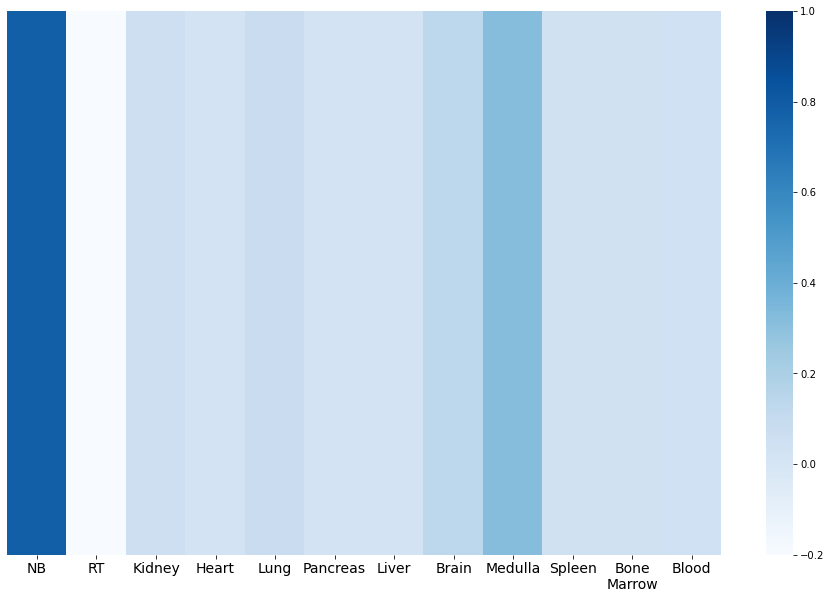

In [224]:
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['AF_t1']!=0)&(df['AF_t2']==0)&(df['n_tissues']==11)].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
plt.show()

101 denovo germline and somatic shared with all tissues


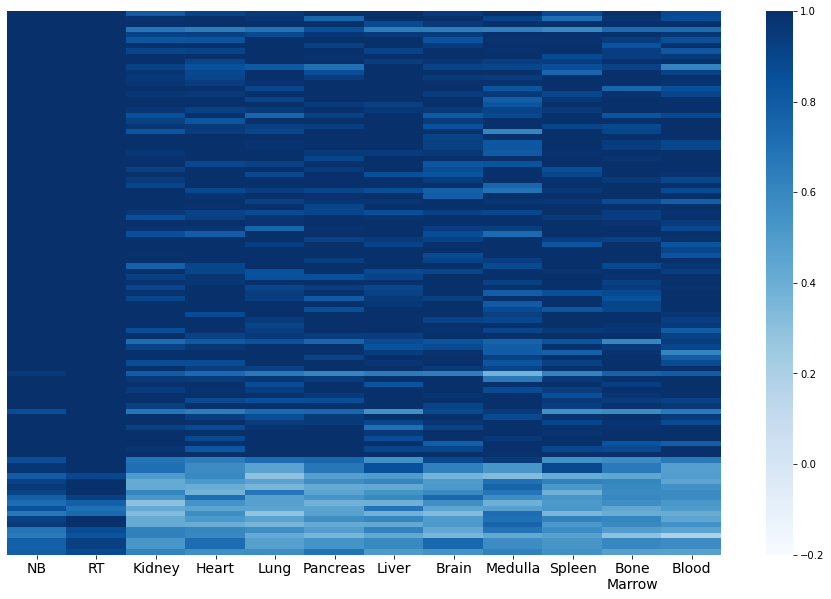

In [225]:
#
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['n_tissues']==12)&(((df['AF_t1']>0.25)&(df['AF_t2']==0))|((df['AF_t2']>0.2)&(df['AF_t1']==0))|((df['AF_t1']>0.25)&(df['AF_t2']>0.2)))].sort_values(by=order_cols2,ascending=False)
data = data.sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
print(len(data),'denovo germline and somatic shared with all tissues')
plt.show()

Mutations present in 1 tissue(s)
629 mutations


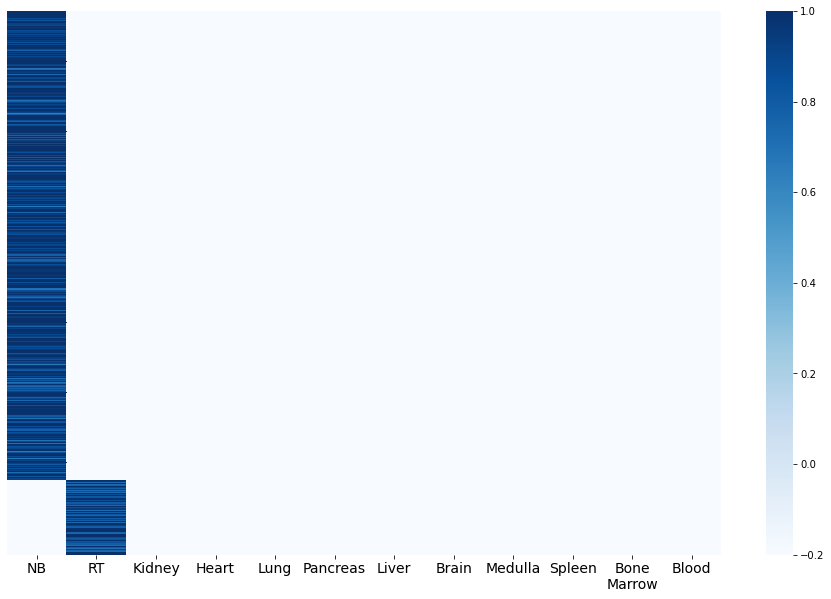

Mutations present in 2 tissue(s)
386 mutations


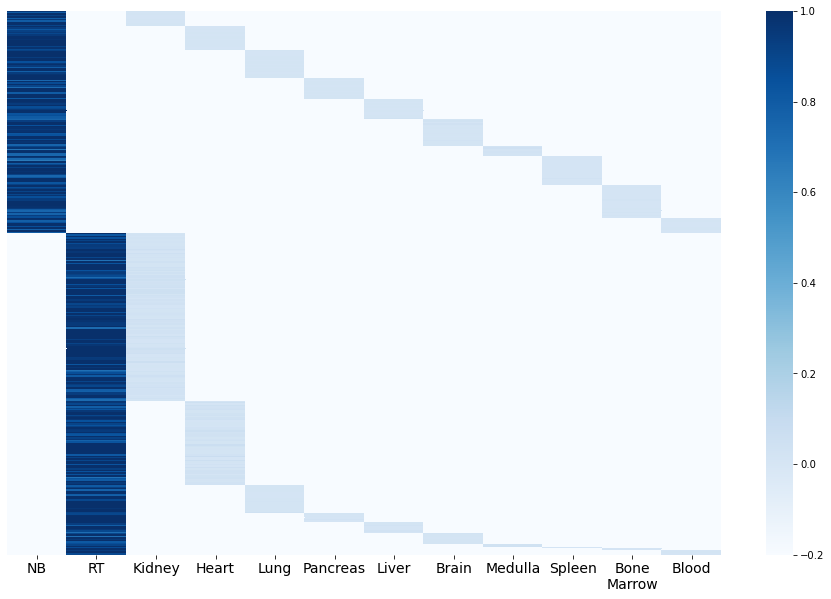

Mutations present in 3 tissue(s)
491 mutations


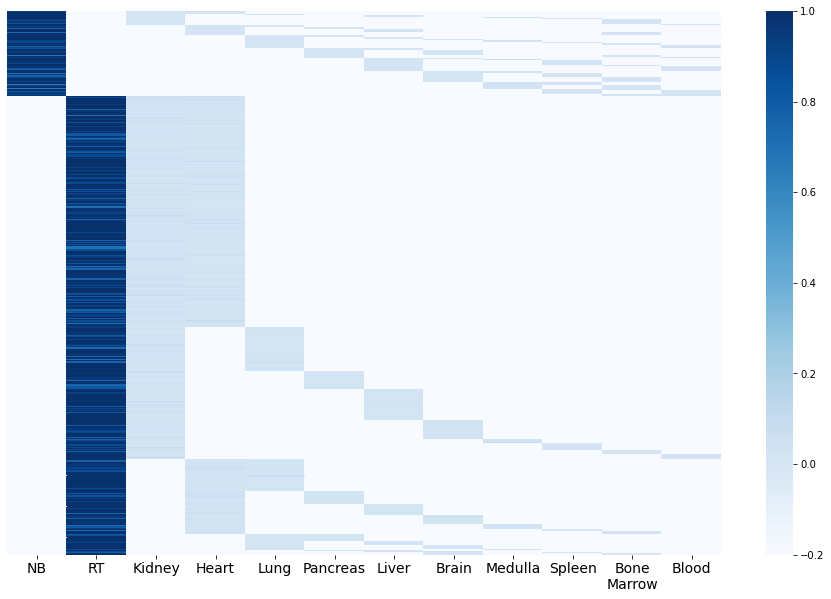

Mutations present in 4 tissue(s)
413 mutations


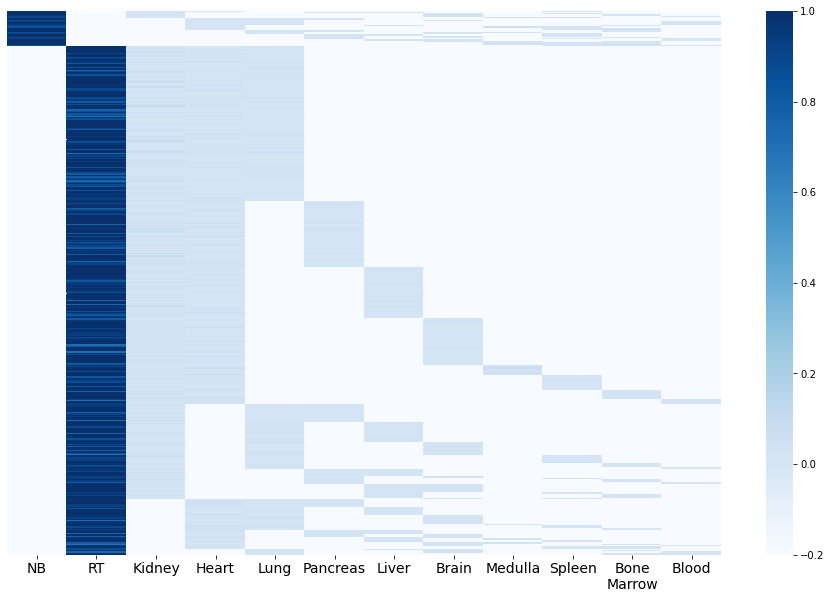

Mutations present in 5 tissue(s)
141 mutations


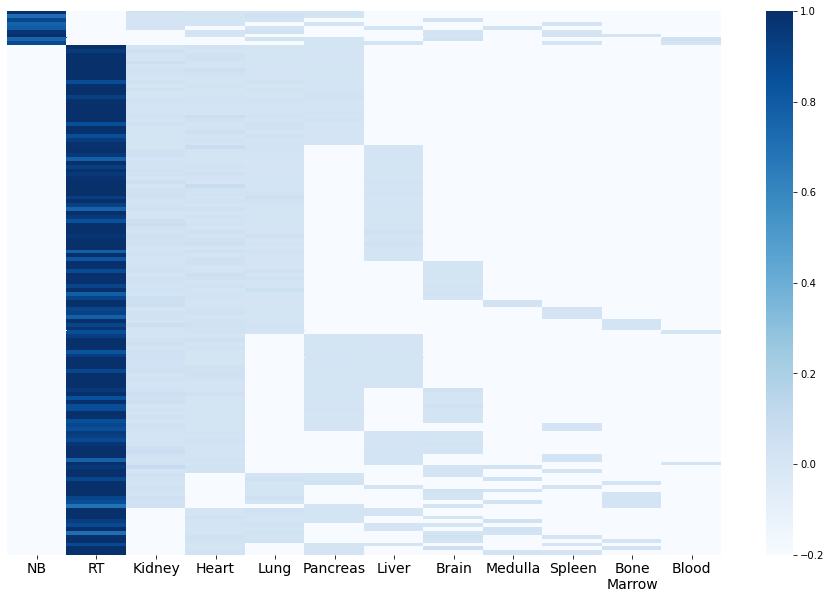

Mutations present in 6 tissue(s)
45 mutations


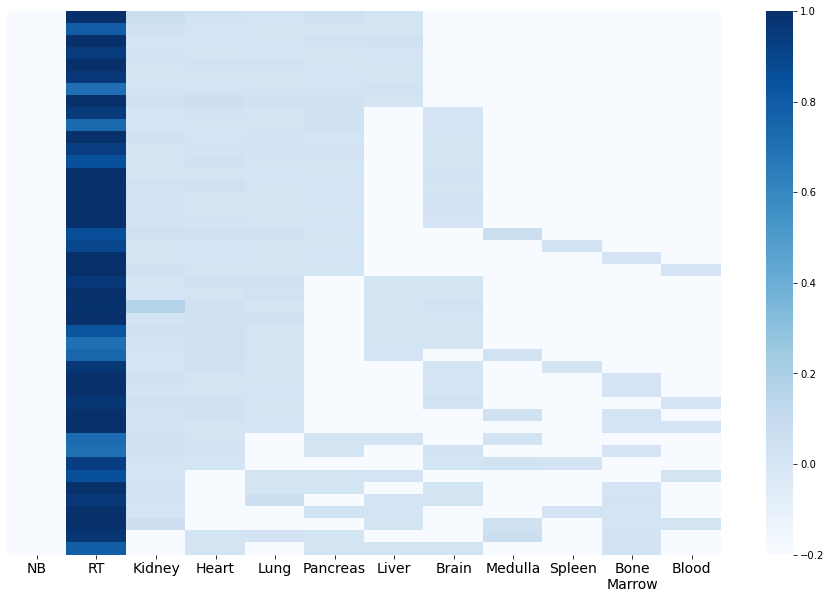

Mutations present in 7 tissue(s)
11 mutations


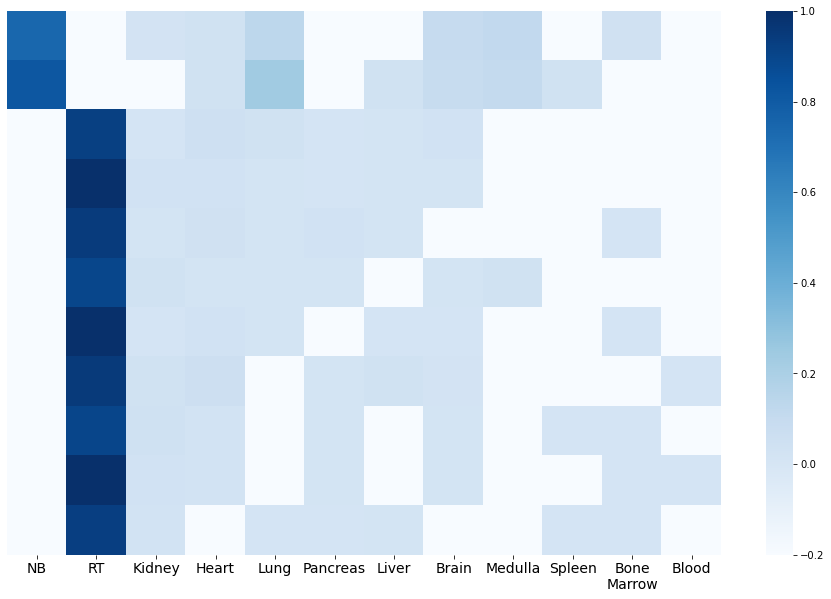

Mutations present in 8 tissue(s)
1 mutations


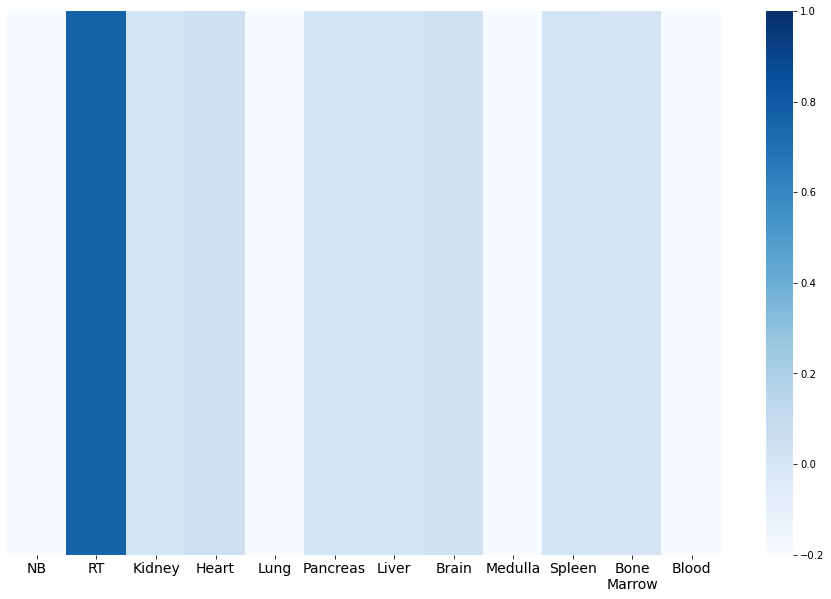

Mutations present in 9 tissue(s)
3 mutations


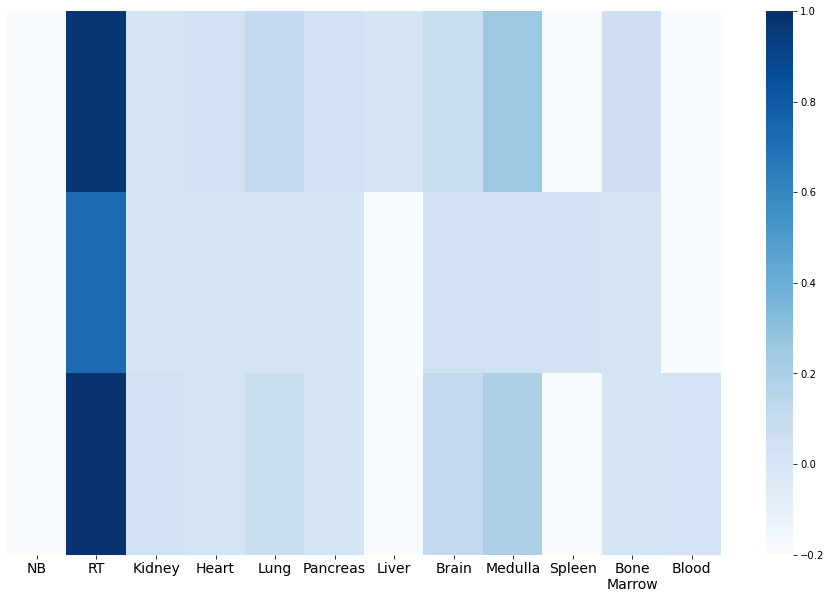

Mutations present in 10 tissue(s)
0 mutations


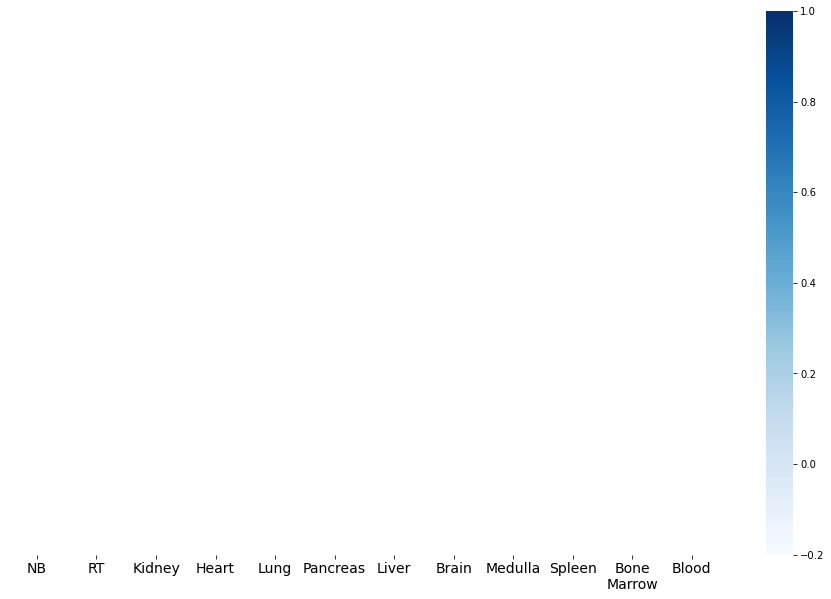

Mutations present in 11 tissue(s)
1 mutations


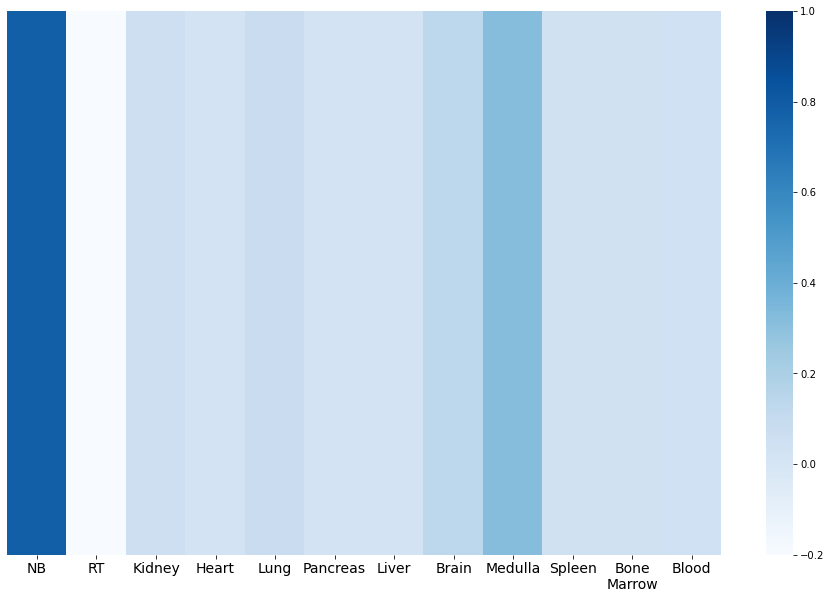

Mutations present in 12 tissue(s)
17 mutations


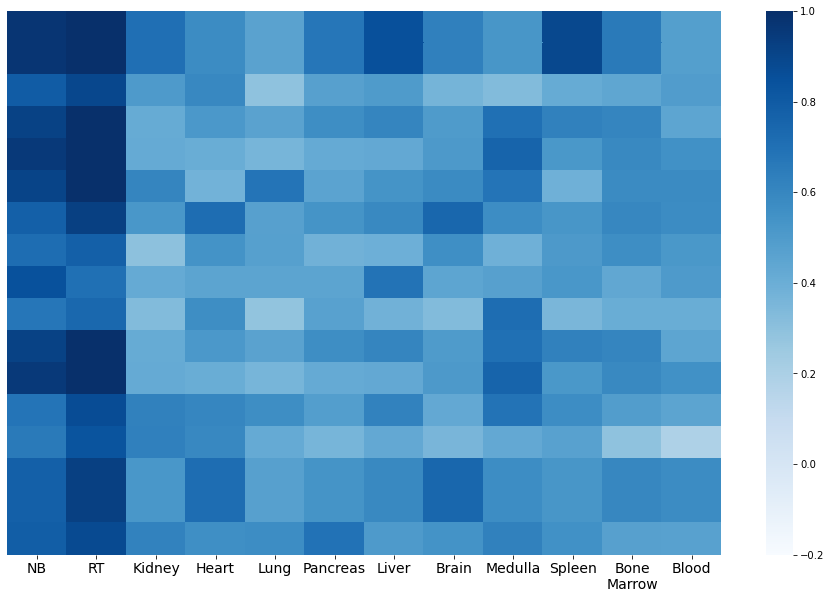

In [253]:
for n in range(1,13):
    print('Mutations present in',n,'tissue(s)')
    order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
    order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
    x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
    data = df[(df['denovo_germline']==False)&(df['n_tissues']==n)&(((df['AF_t1']>=0.25)&(df['AF_t2']==0))|((df['AF_t2']>=0.2)&(df['AF_t1']==0))|((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2)))].sort_values(by=order_cols2,ascending=False)
    data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
    data = data.set_index(['SYMBOL','Consequence'])
    data.index_name = ''
    data[order_cols] = data[order_cols].replace(0,-0.2)
    fig, ax = plt.subplots(figsize=(16,10)) 
    ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
    plt.xticks(fontsize=14,rotation=0)
    plt.ylabel('')
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
    print(len(data), 'mutations')
    plt.show()

De novo germline mutations
85 mutations


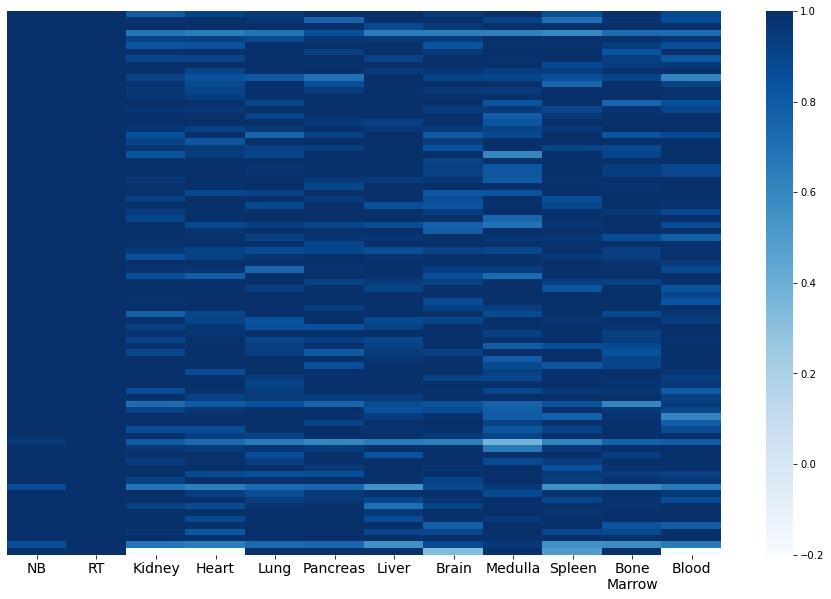

In [254]:
print('De novo germline mutations')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==True)&(((df['AF_t1']>0.25)&(df['AF_t2']==0))|((df['AF_t2']>0.2)&(df['AF_t1']==0))|((df['AF_t1']>0.25)&(df['AF_t2']>0.2)))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic shared all tissues
17 mutations


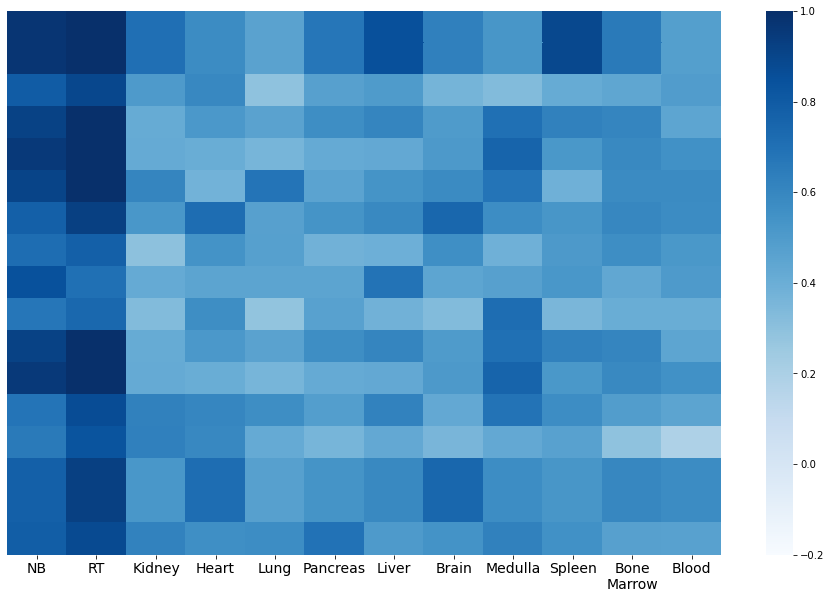

In [255]:
print('Somatic shared all tissues')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']==12)&(((df['AF_t1']>=0.25)&(df['AF_t2']==0))|((df['AF_t2']>=0.2)&(df['AF_t1']==0))|((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2)))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic shared NB and MRT
0 mutations


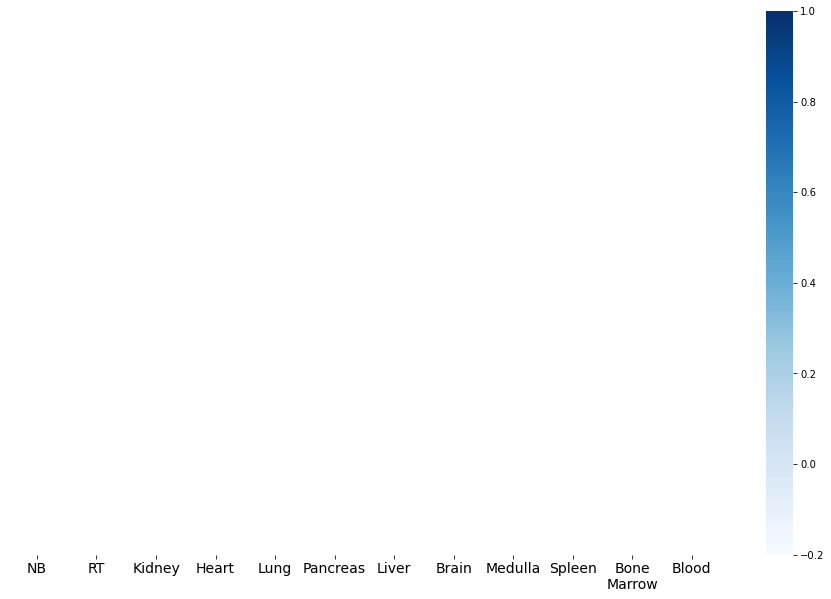

In [256]:
print('Somatic shared NB and MRT')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']!=12)&((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic NB, not in all tissues
817 mutations


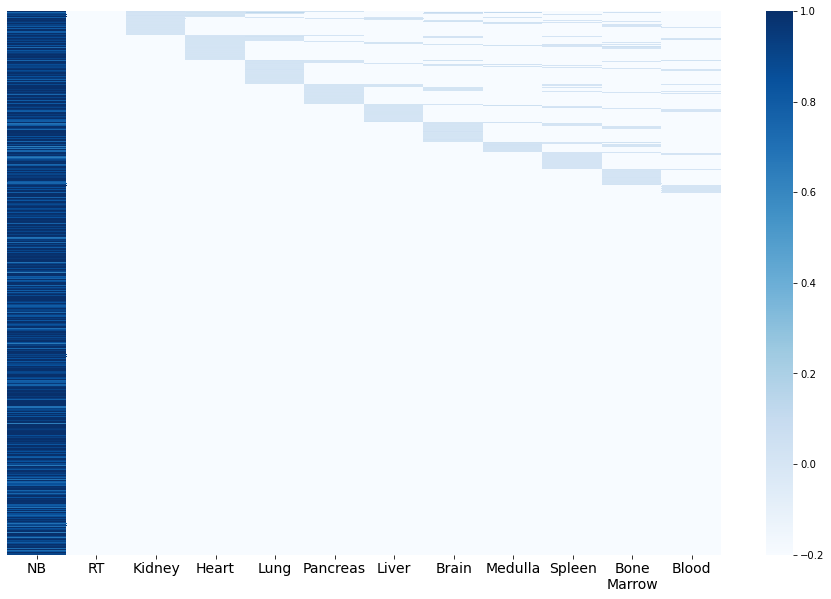

In [257]:
print('Somatic NB, not in all tissues')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']<12)&((df['AF_t1']>=0.25)&(df['AF_t2']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic NB, shared with almost all tissues, not in MRT
1 mutations


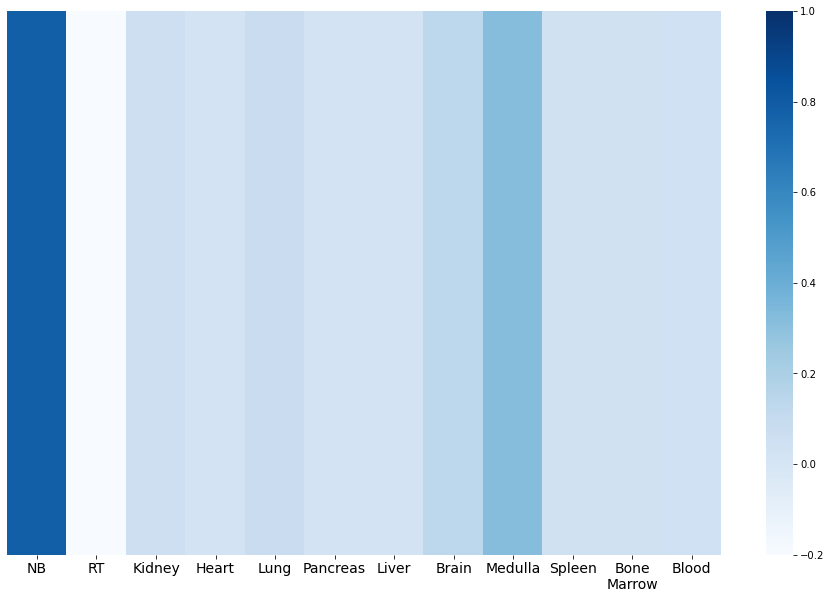

In [258]:
print('Somatic NB, shared with almost all tissues, not in MRT')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']>=9)&((df['AF_t1']>=0.25)&(df['AF_t2']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic NB, shared with some tissues
274 mutations


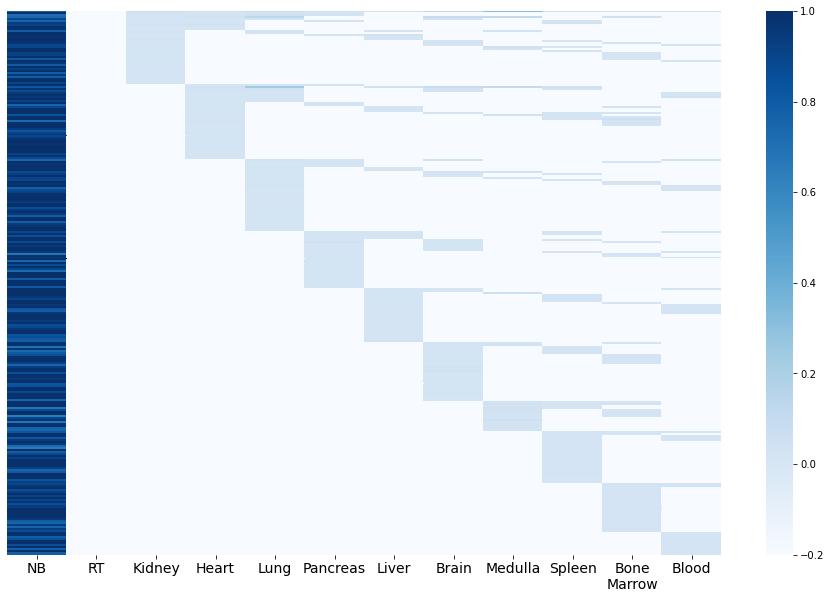

In [259]:
print('Somatic NB, shared with some tissues')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']>1)&((df['AF_t1']>=0.25)&(df['AF_t2']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic NB, unique
543 mutations


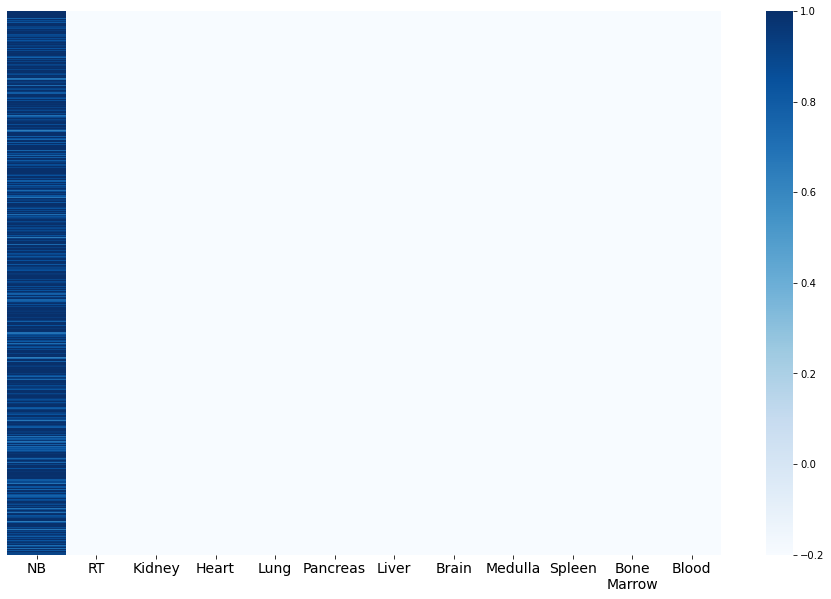

In [260]:
print('Somatic NB, unique')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']==1)&((df['AF_t1']>=0.25)&(df['AF_t2']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic MRT, in almost all tissues, not in NB
3 mutations


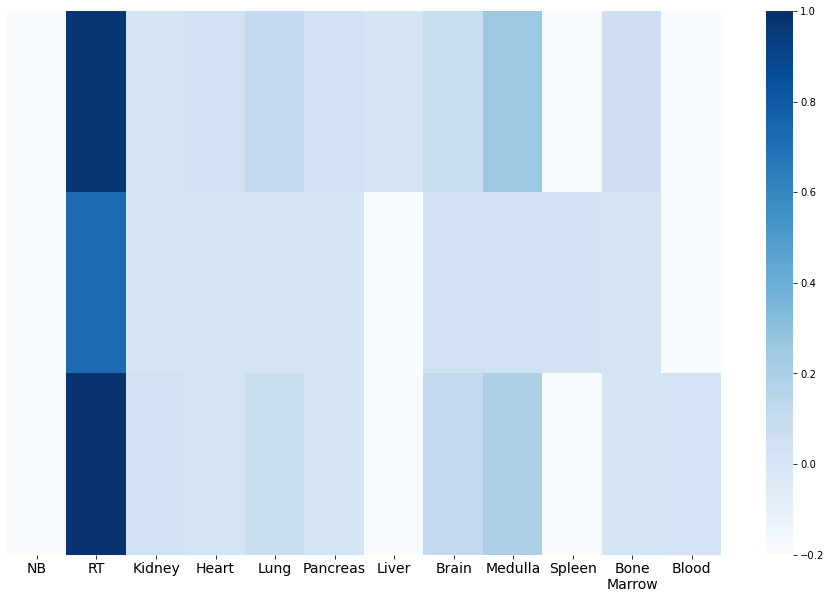

In [261]:
print('Somatic MRT, in almost all tissues, not in NB')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']>=9)&((df['AF_t2']>=0.2)&(df['AF_t1']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic MRT, not in all tissues
1304 mutations


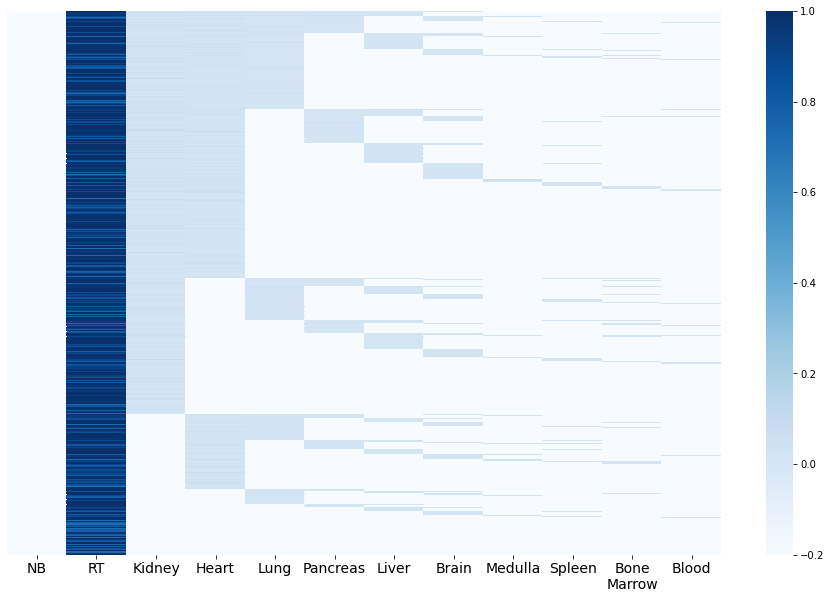

In [264]:
print('Somatic MRT, not in all tissues')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']<12)&((df['AF_t2']>=0.2)&(df['AF_t1']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic MRT, shared with some tissues
1218 mutations


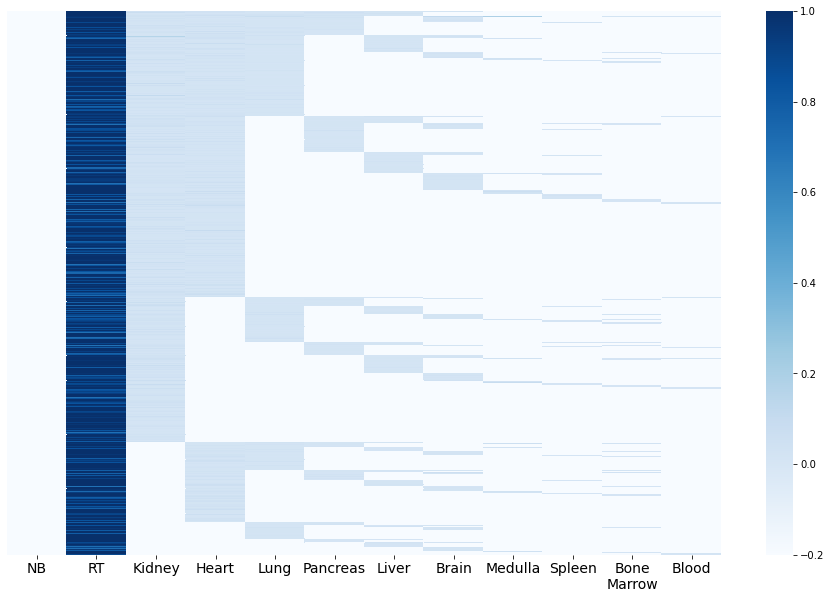

In [266]:
print('Somatic MRT, shared with some tissues')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']>1)&((df['AF_t2']>0.2)&(df['AF_t1']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

Somatic MRT, unique
86 mutations


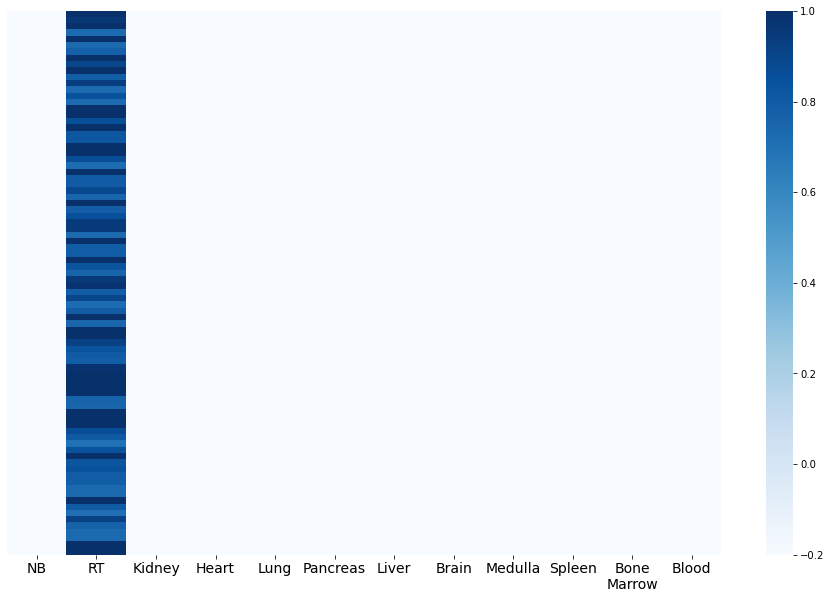

In [267]:
print('Somatic MRT, unique')
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[(df['denovo_germline']==False)&(df['n_tissues']==1)&((df['AF_t2']>0.2)&(df['AF_t1']==0))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
print(len(data), 'mutations')
plt.show()

NB
Somatic shared 0 tissues
0 mutations


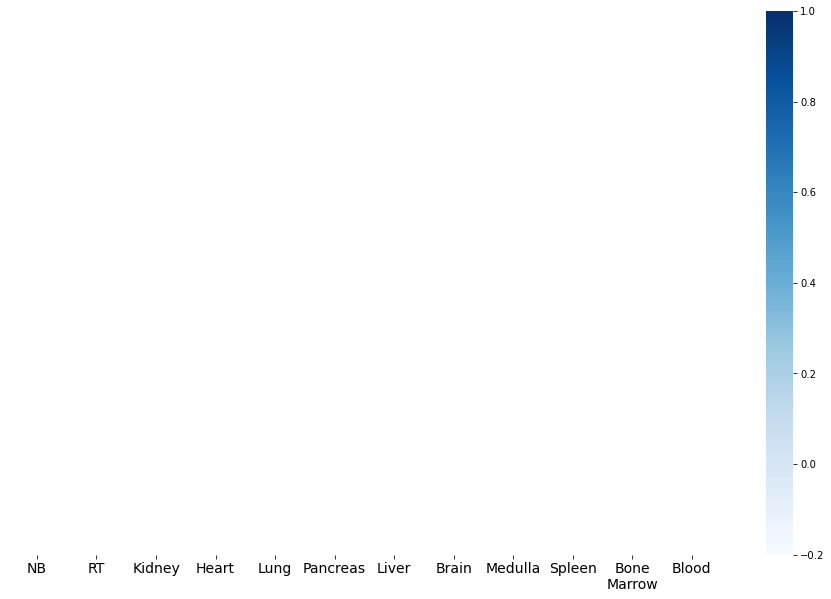

Somatic shared 1 tissues
543 mutations


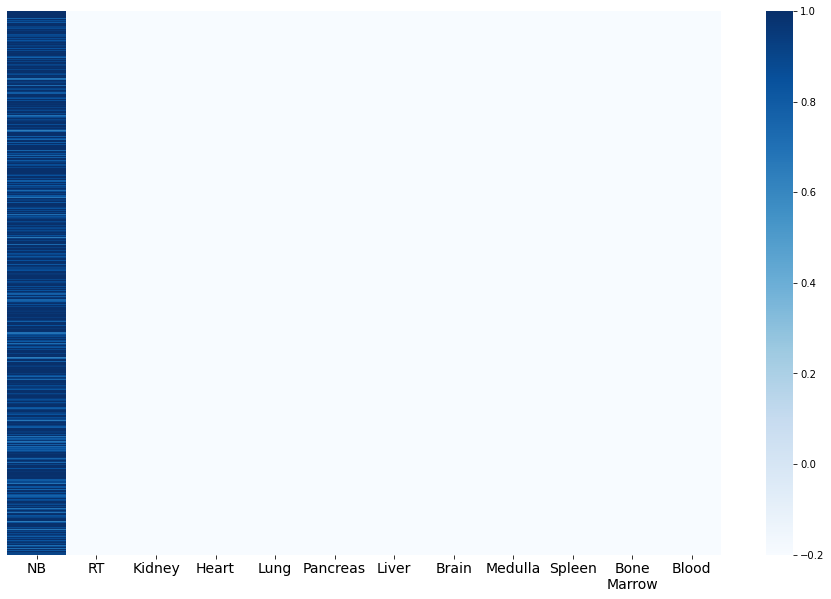

Somatic shared 2 tissues
158 mutations


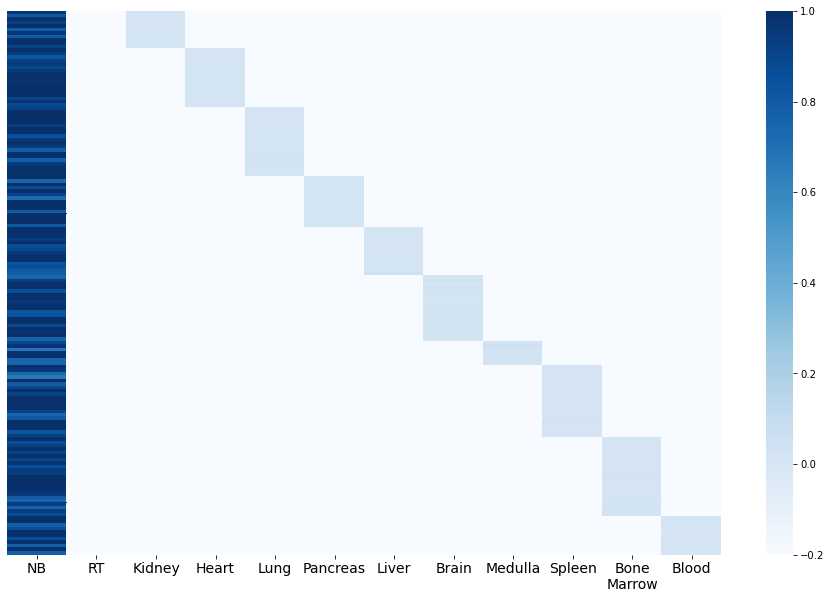

Somatic shared 3 tissues
77 mutations


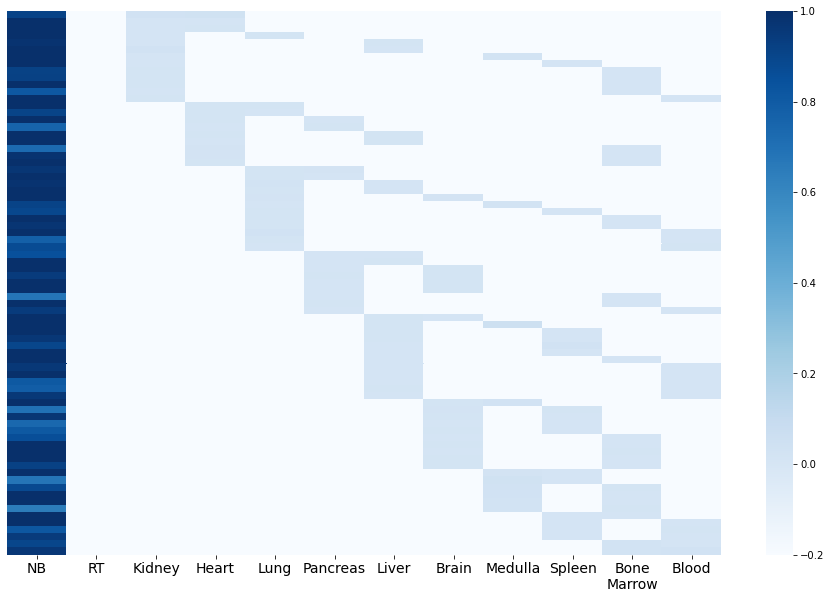

Somatic shared 4 tissues
27 mutations


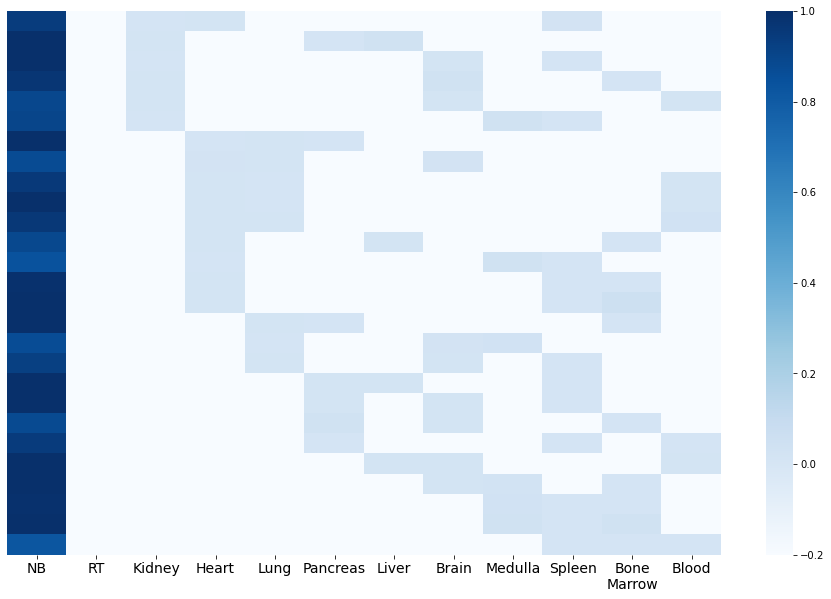

Somatic shared 5 tissues
9 mutations


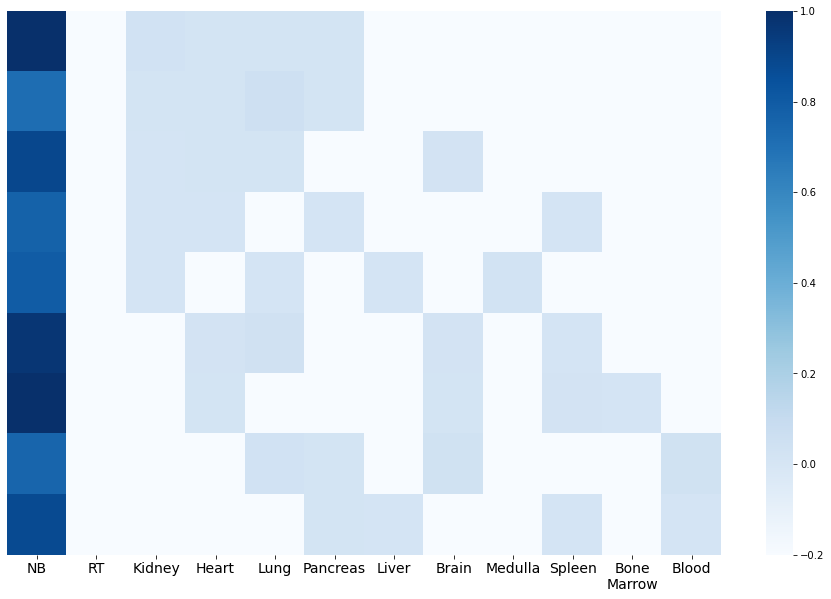

Somatic shared 6 tissues
0 mutations


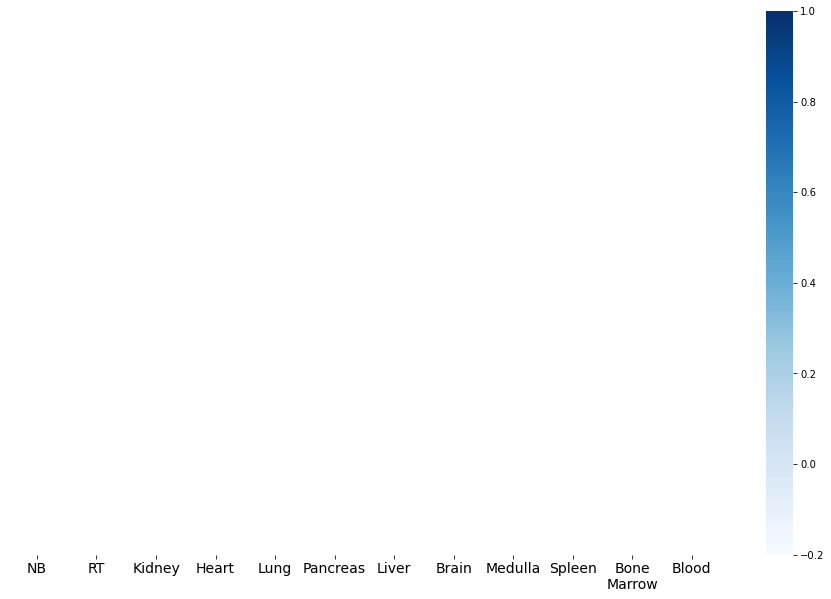

Somatic shared 7 tissues
2 mutations


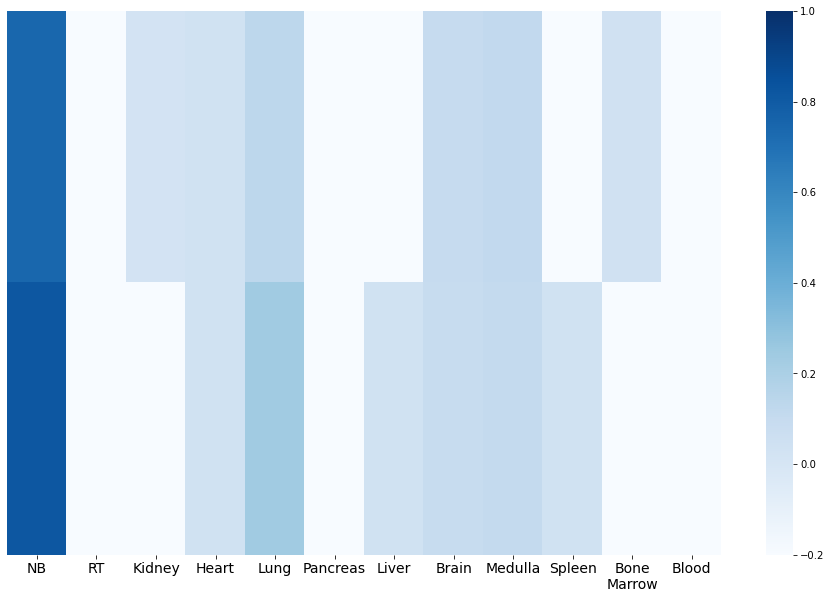

Somatic shared 8 tissues
0 mutations


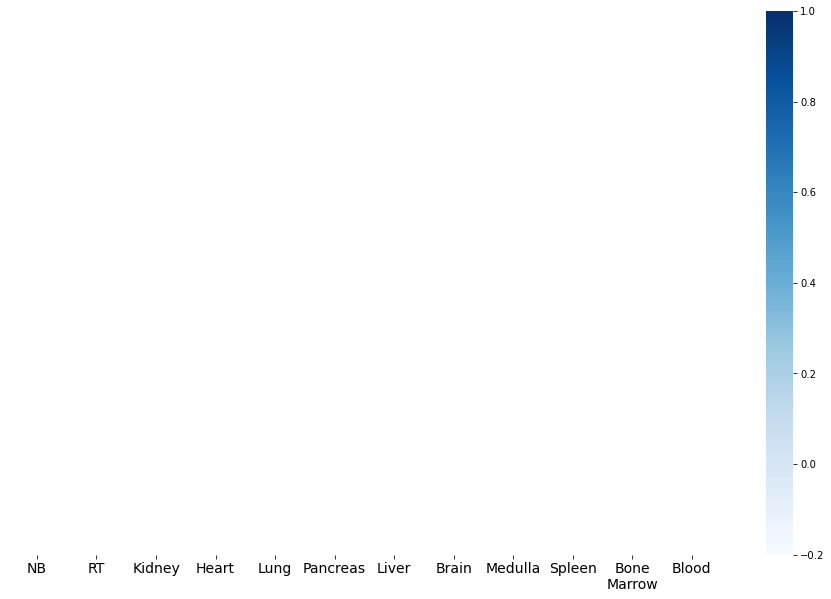

Somatic shared 9 tissues
0 mutations


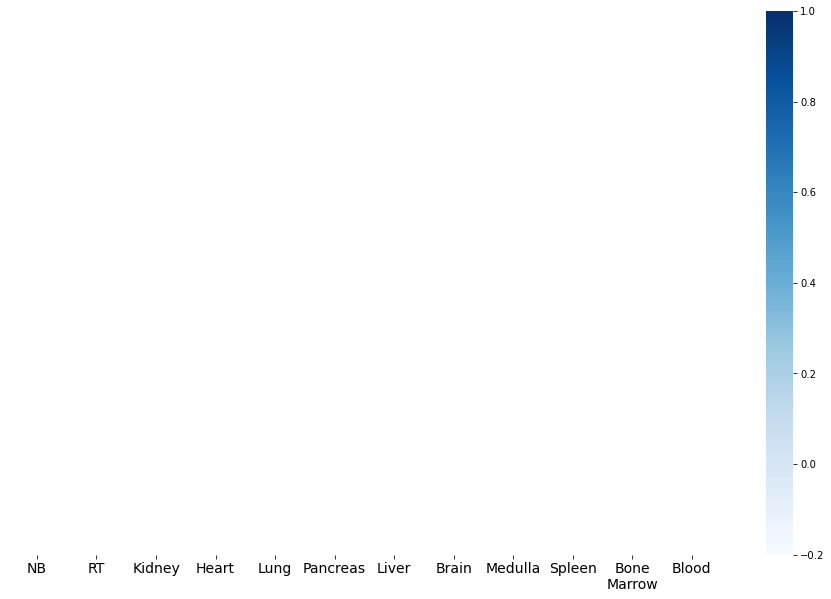

Somatic shared 10 tissues
0 mutations


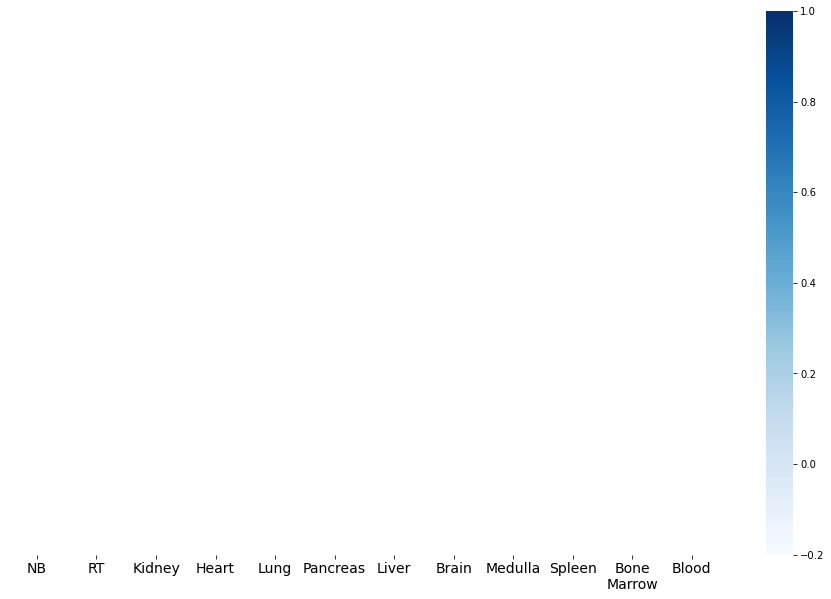

Somatic shared 11 tissues
1 mutations


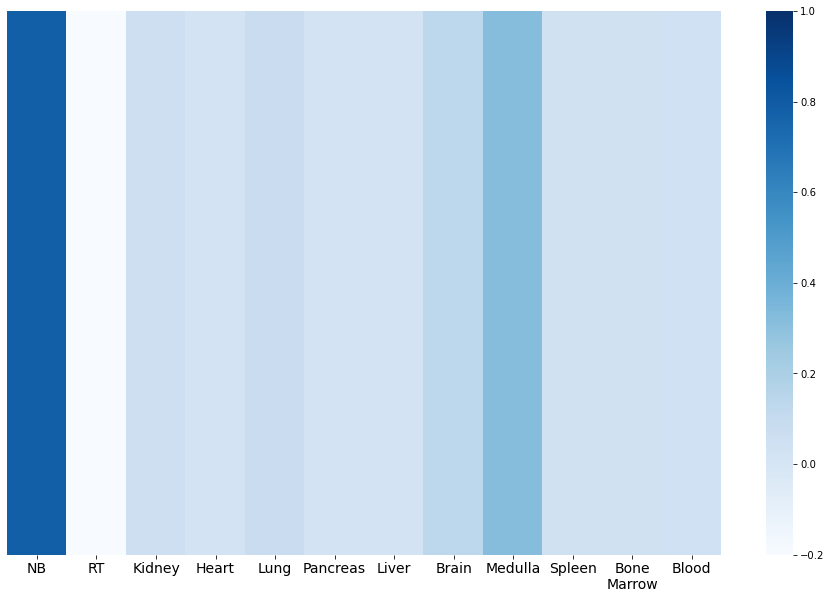

Somatic shared 12 tissues
17 mutations


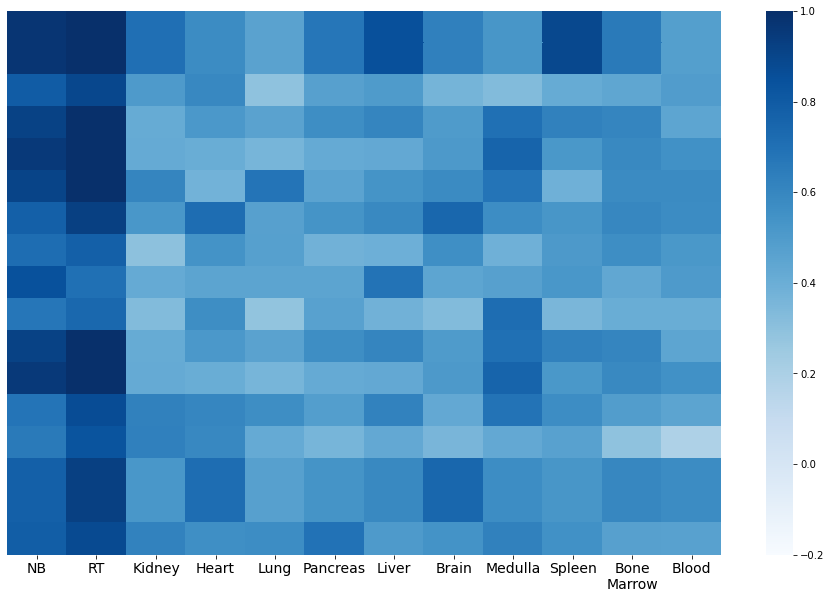

In [268]:
print('NB')
for n in range(13):
    print('Somatic shared '+str(n)+' tissues')
    order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
    order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
    x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
    data = df[(df['denovo_germline']==False)&(df['n_tissues']==n)&(((df['AF_t1']>=0.25)&(df['AF_t2']==0))|((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2)))].sort_values(by=order_cols2,ascending=False)
    data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
    data = data.set_index(['SYMBOL','Consequence'])
    data.index_name = ''
    data[order_cols] = data[order_cols].replace(0,-0.2)
    fig, ax = plt.subplots(figsize=(16,10)) 
    ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
    plt.xticks(fontsize=14,rotation=0)
    plt.ylabel('')
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
    print(len(data), 'mutations')
    plt.show()

RT
Somatic shared 0 tissues
0 mutations


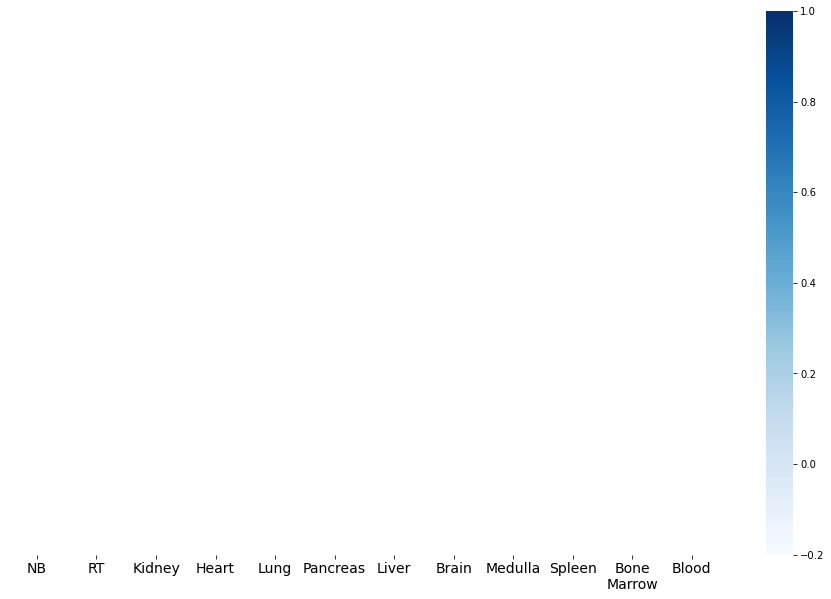

Somatic shared 1 tissues
86 mutations


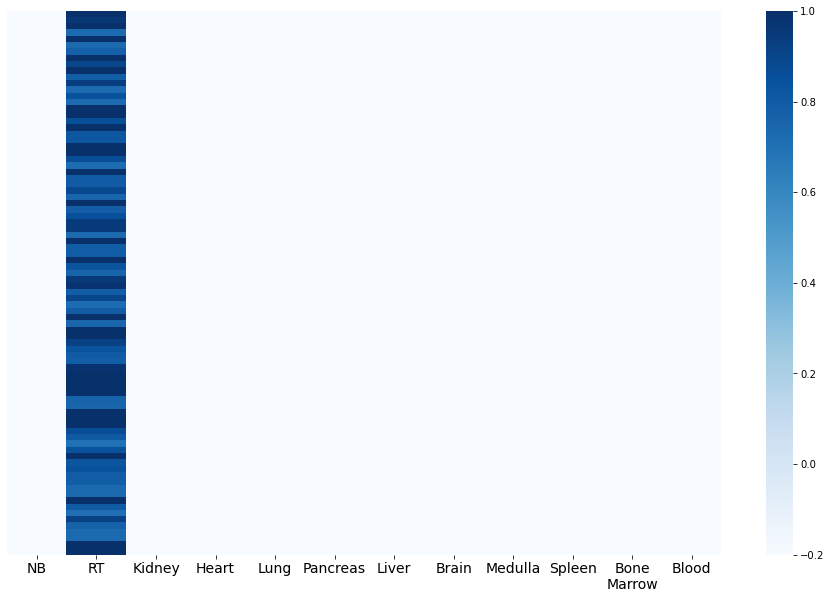

Somatic shared 2 tissues
228 mutations


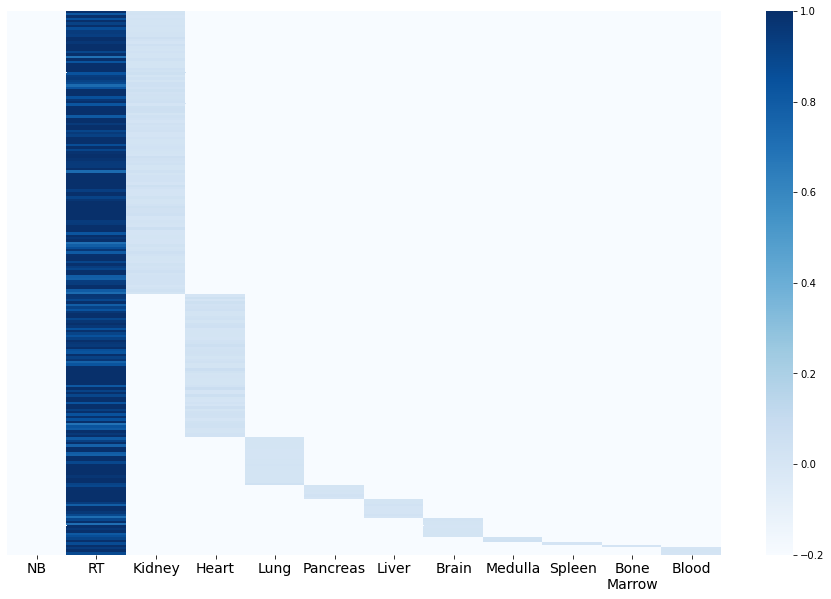

Somatic shared 3 tissues
414 mutations


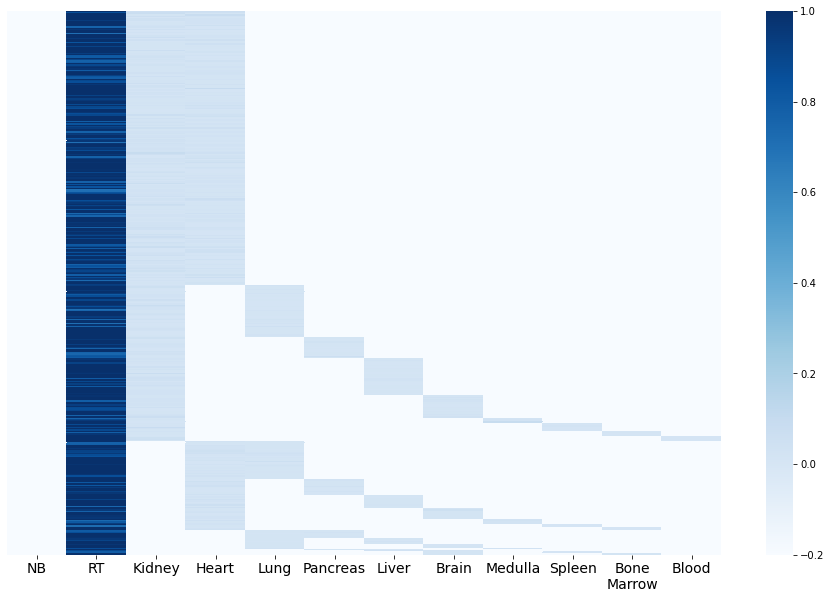

Somatic shared 4 tissues
386 mutations


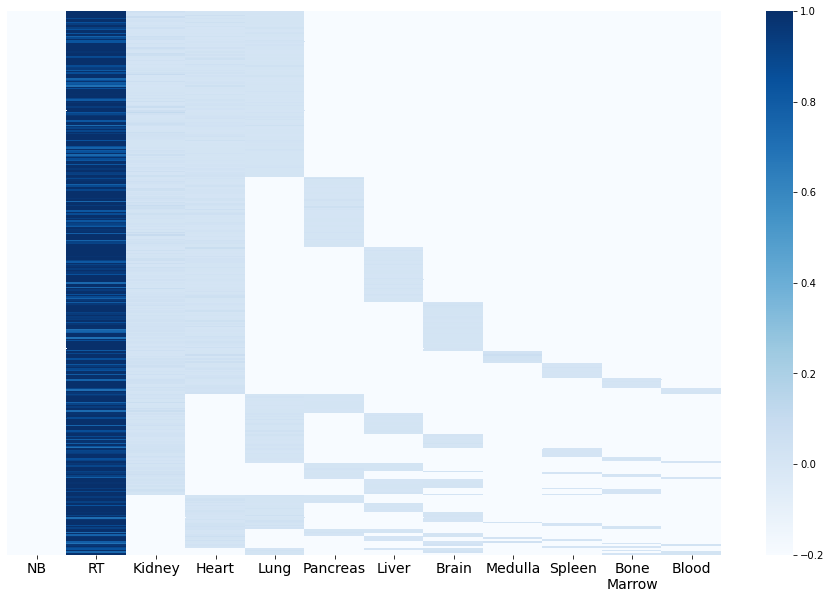

Somatic shared 5 tissues
132 mutations


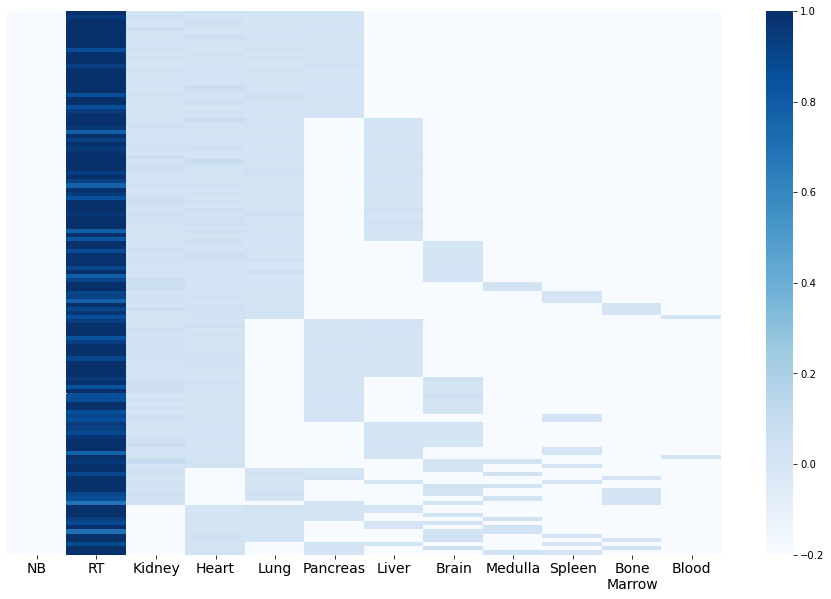

Somatic shared 6 tissues
45 mutations


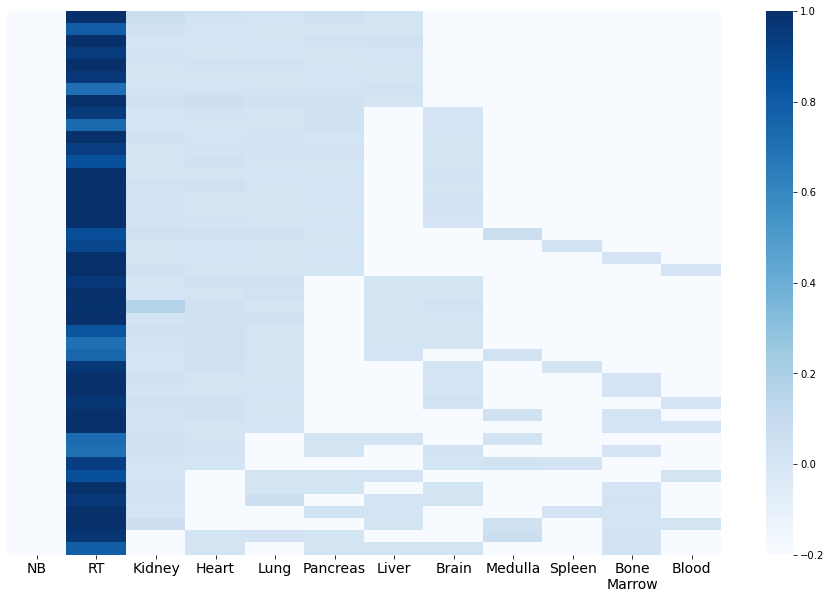

Somatic shared 7 tissues
9 mutations


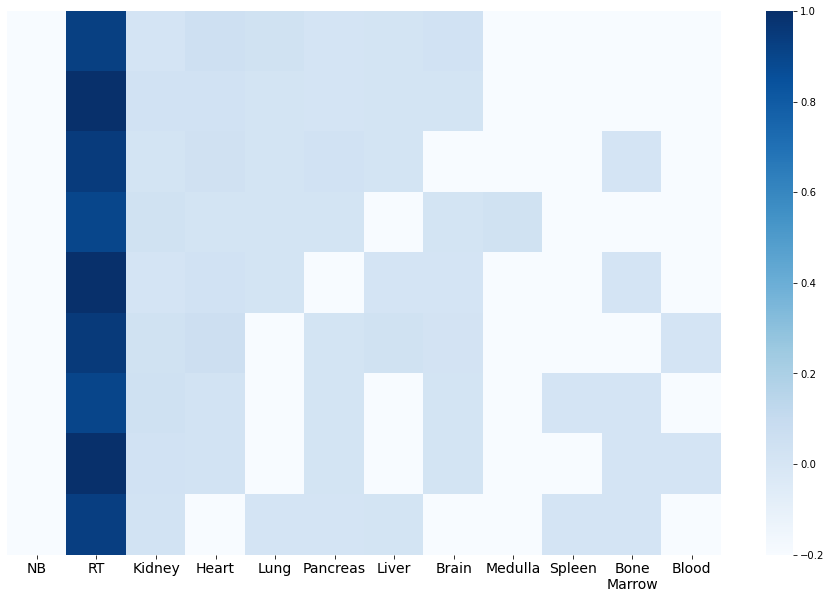

Somatic shared 8 tissues
1 mutations


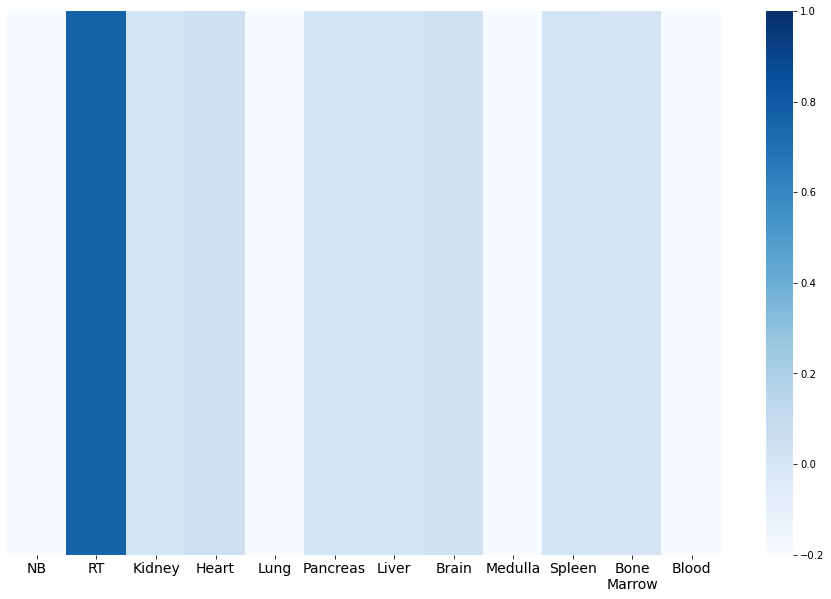

Somatic shared 9 tissues
3 mutations


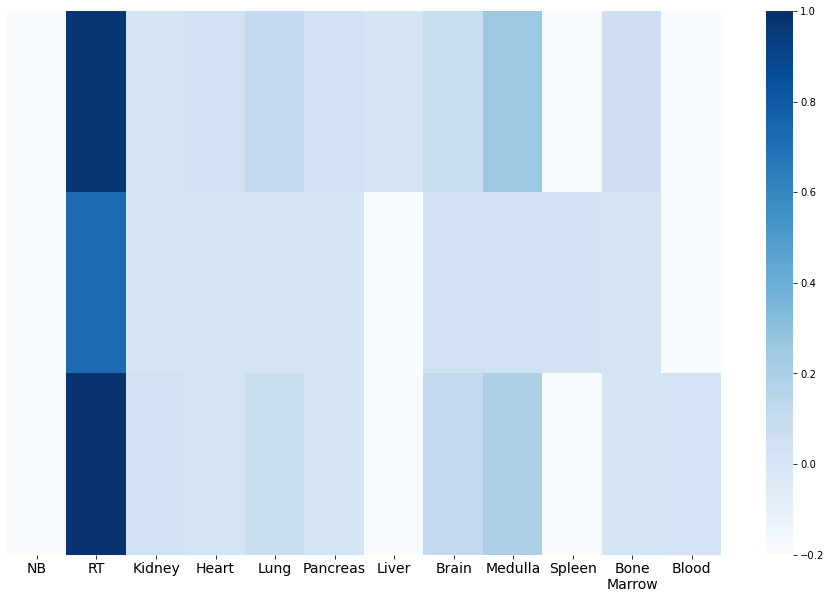

Somatic shared 10 tissues
0 mutations


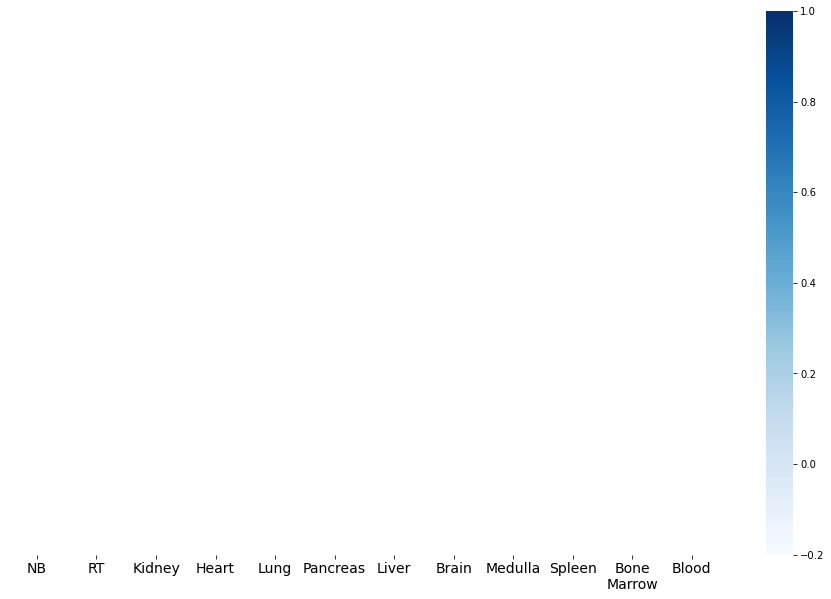

Somatic shared 11 tissues
0 mutations


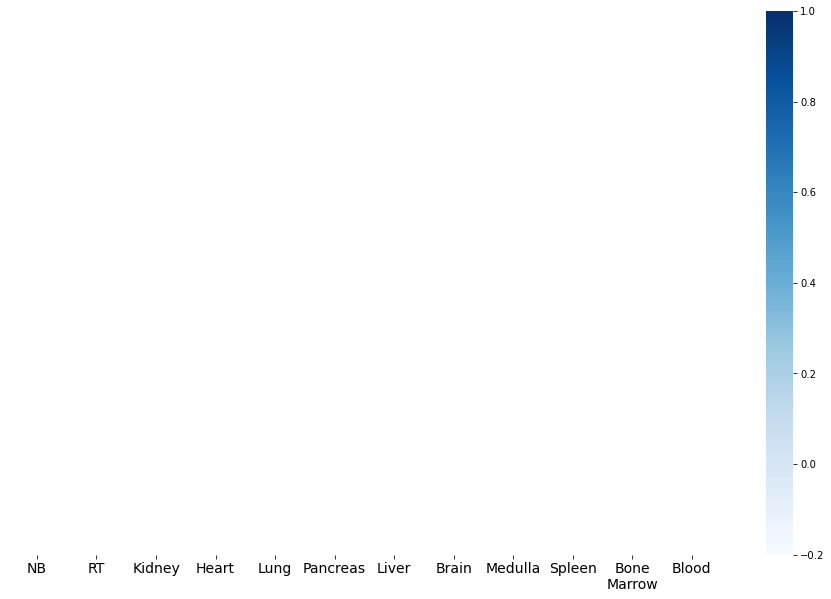

Somatic shared 12 tissues
17 mutations


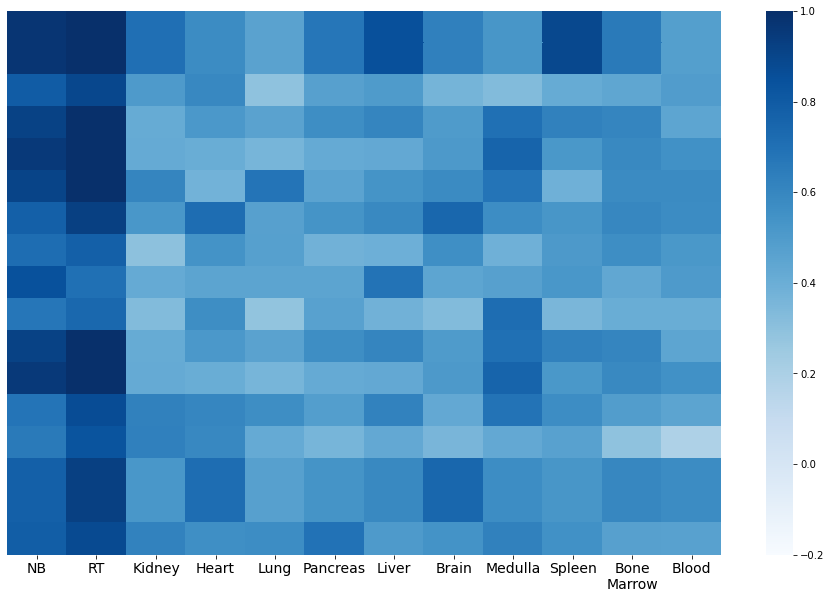

In [269]:
print('RT')
for n in range(13):
    print('Somatic shared '+str(n)+' tissues')
    order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
    order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
    x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
    data = df[(df['denovo_germline']==False)&(df['n_tissues']==n)&(((df['AF_t2']>=0.2)&(df['AF_t1']==0))|((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2)))].sort_values(by=order_cols2,ascending=False)
    data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
    data = data.set_index(['SYMBOL','Consequence'])
    data.index_name = ''
    data[order_cols] = data[order_cols].replace(0,-0.2)
    fig, ax = plt.subplots(figsize=(16,10)) 
    ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
    plt.xticks(fontsize=14,rotation=0)
    plt.ylabel('')
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
    print(len(data), 'mutations')
    plt.show()

Somatic shared 0 tissues
0 mutations


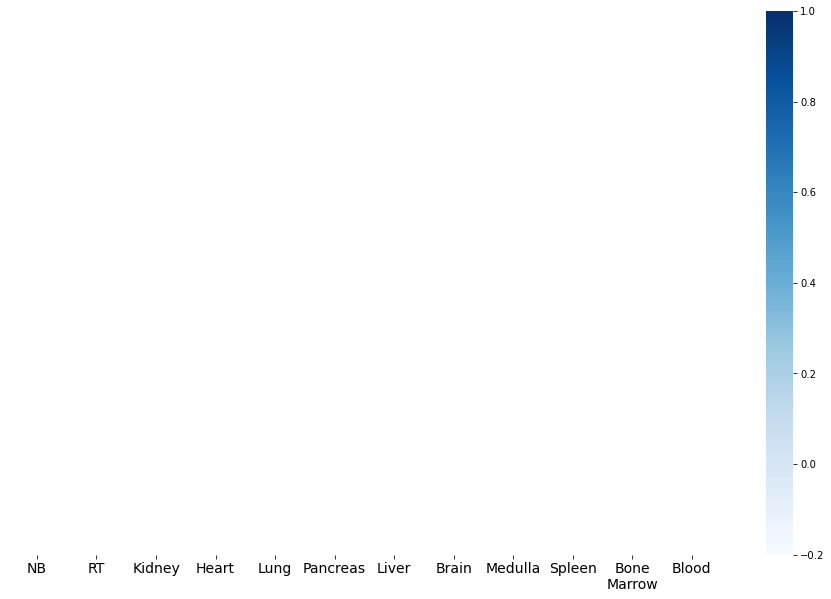

Somatic shared 1 tissues
611 mutations


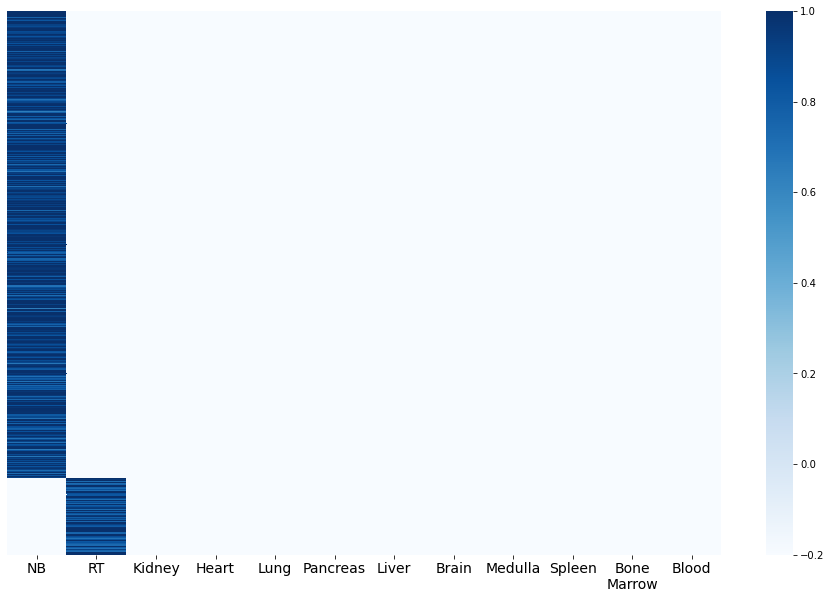

Somatic shared 2 tissues
368 mutations


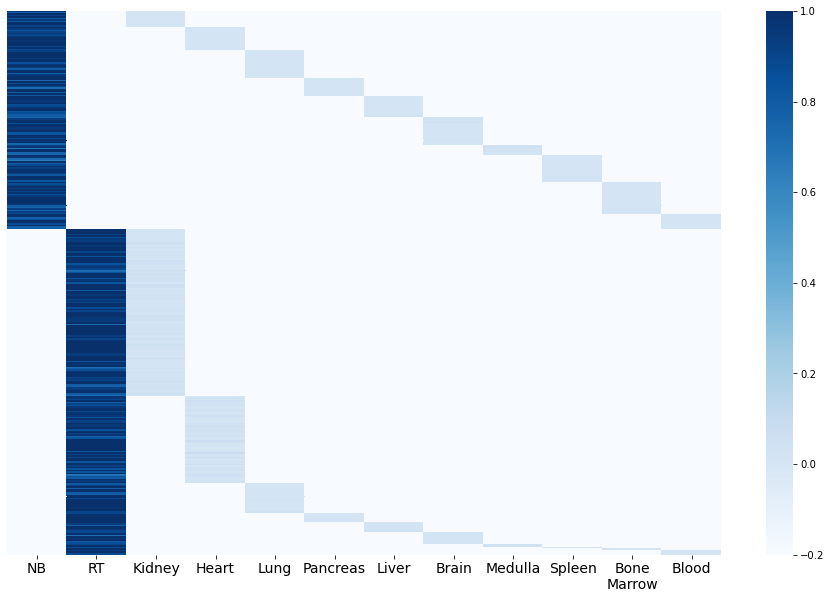

Somatic shared 3 tissues
451 mutations


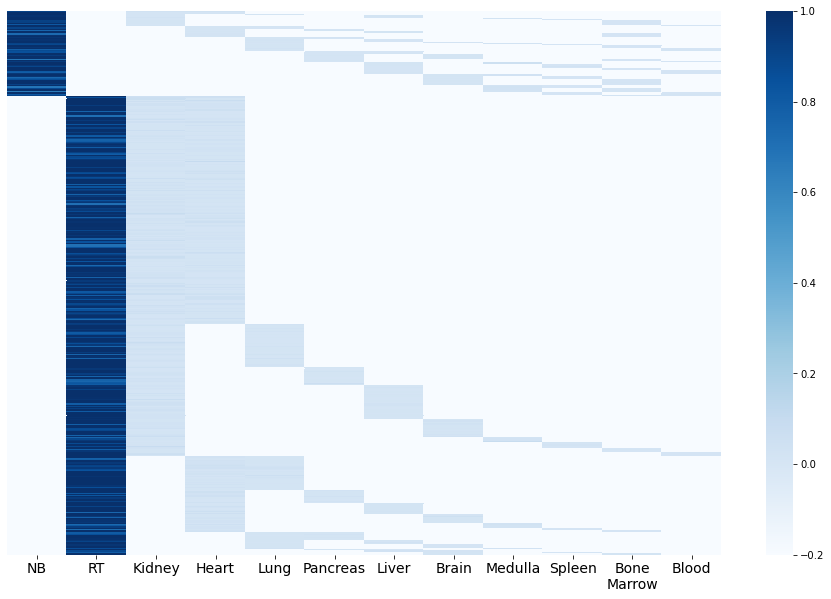

Somatic shared 4 tissues
381 mutations


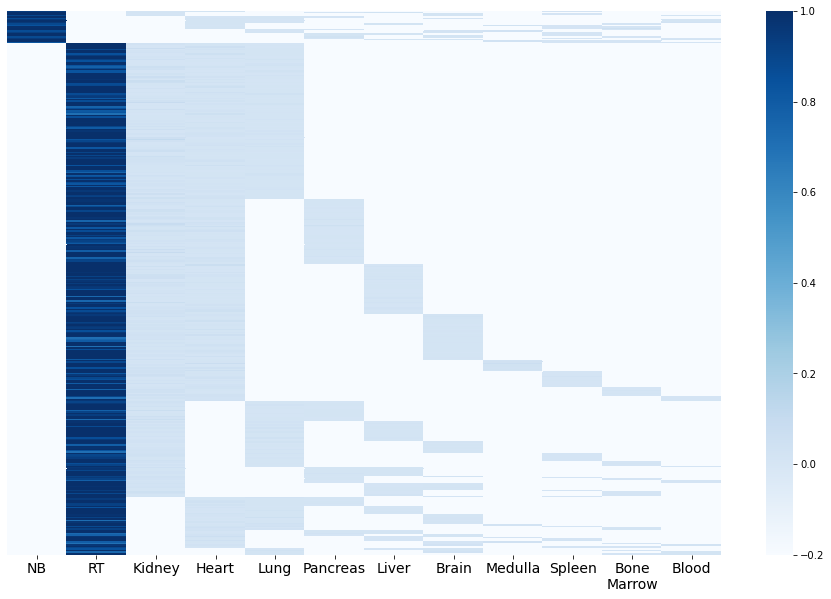

Somatic shared 5 tissues
127 mutations


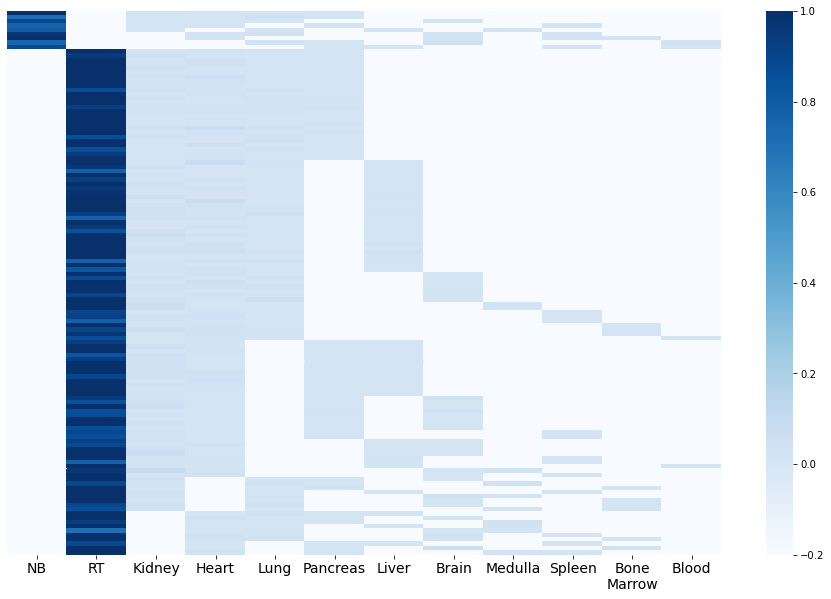

Somatic shared 6 tissues
40 mutations


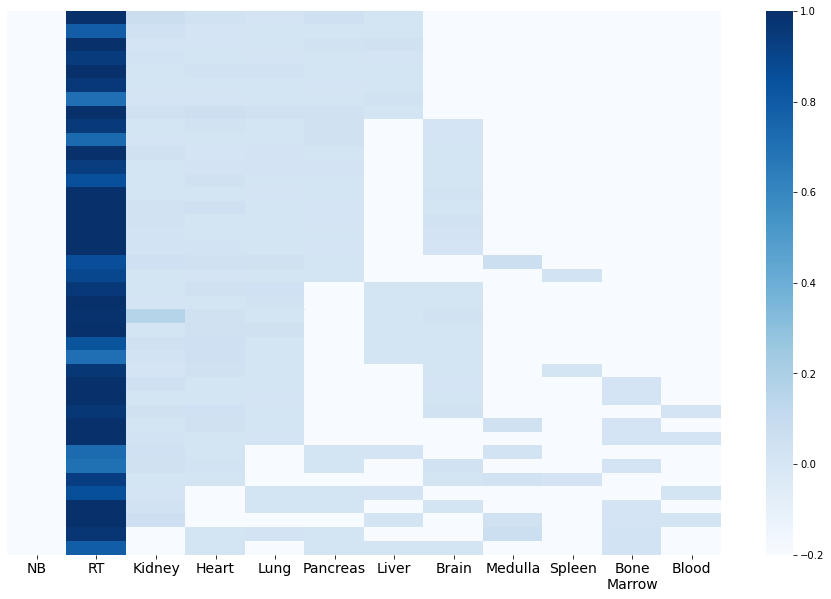

Somatic shared 7 tissues
10 mutations


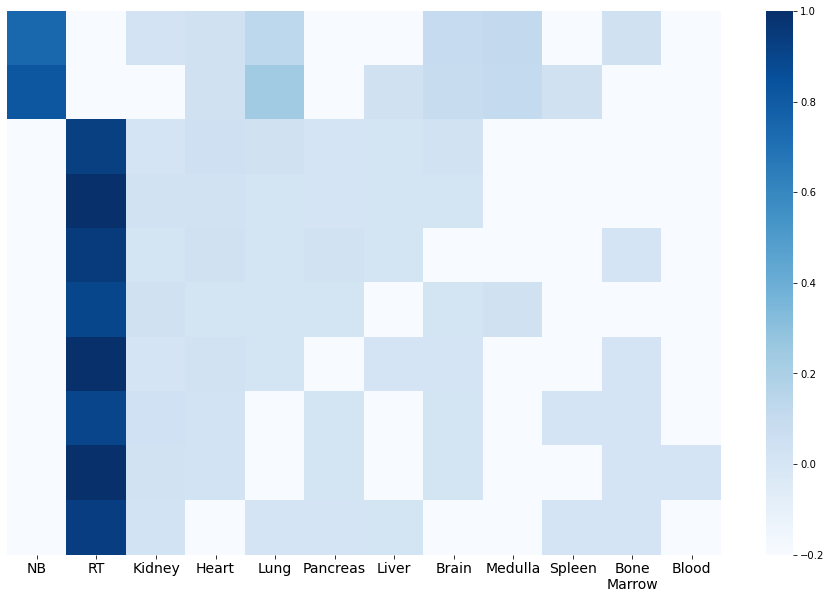

Somatic shared 8 tissues
1 mutations


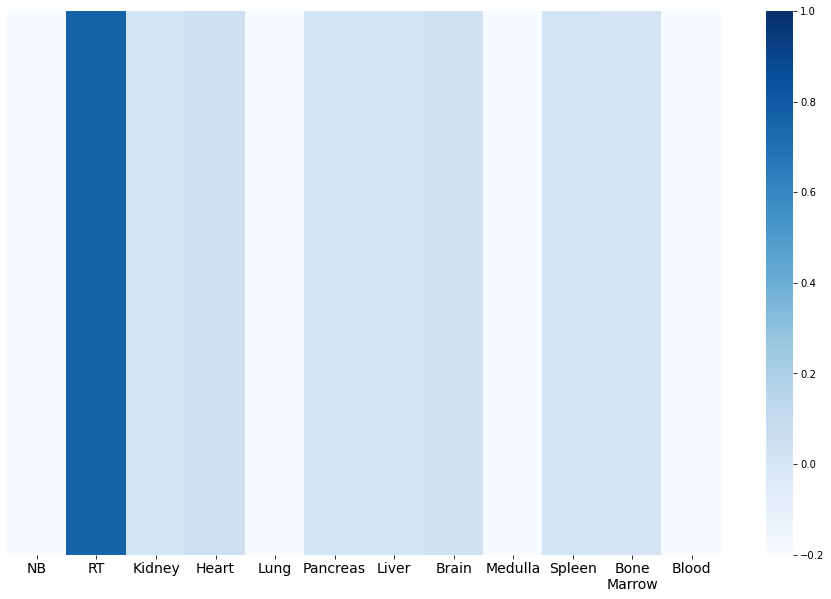

Somatic shared 9 tissues
3 mutations


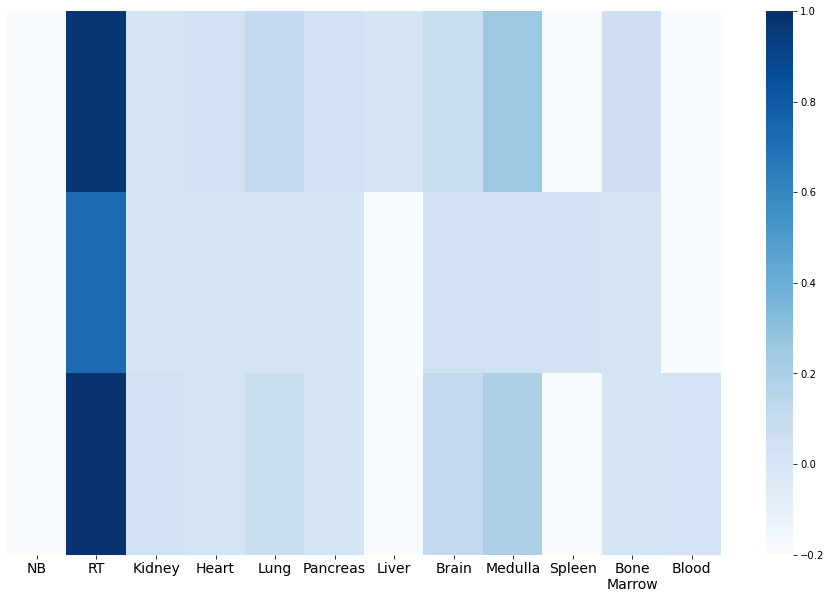

Somatic shared 10 tissues
0 mutations


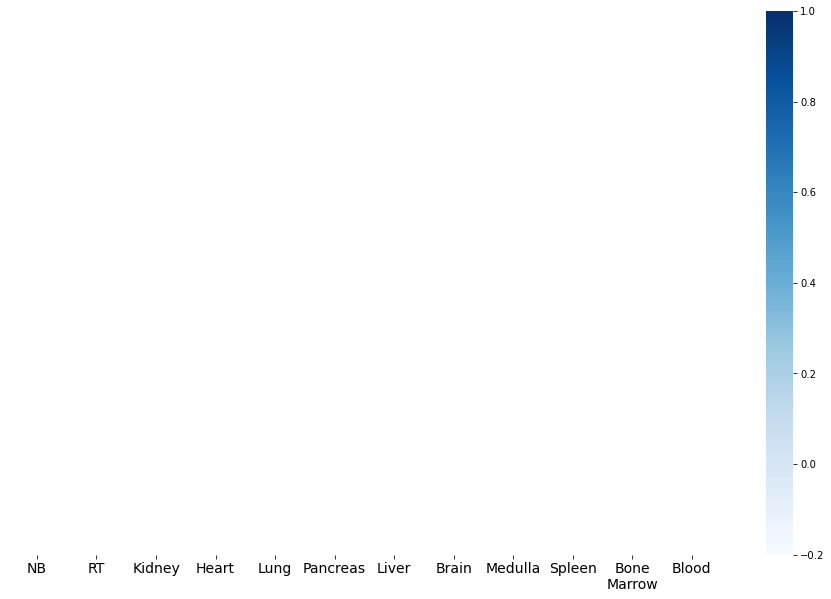

Somatic shared 11 tissues
1 mutations


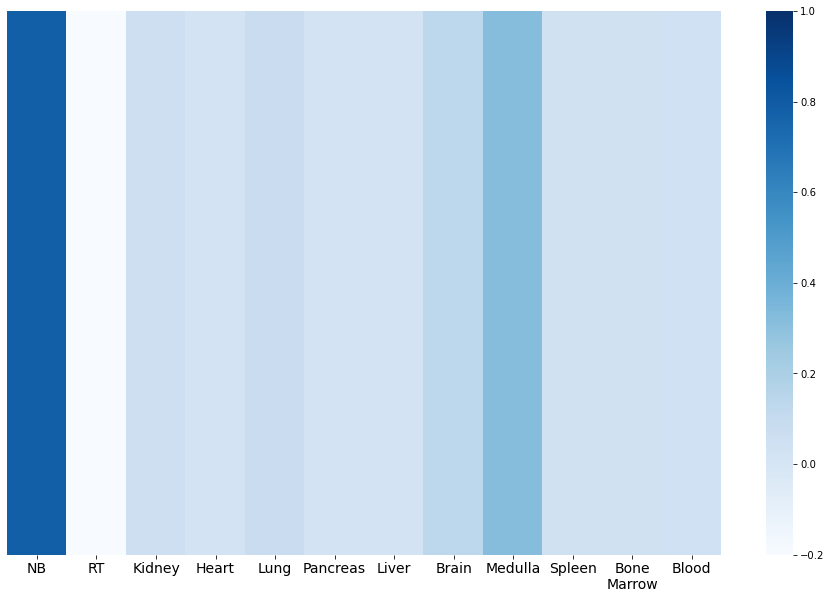

Somatic shared 12 tissues
17 mutations


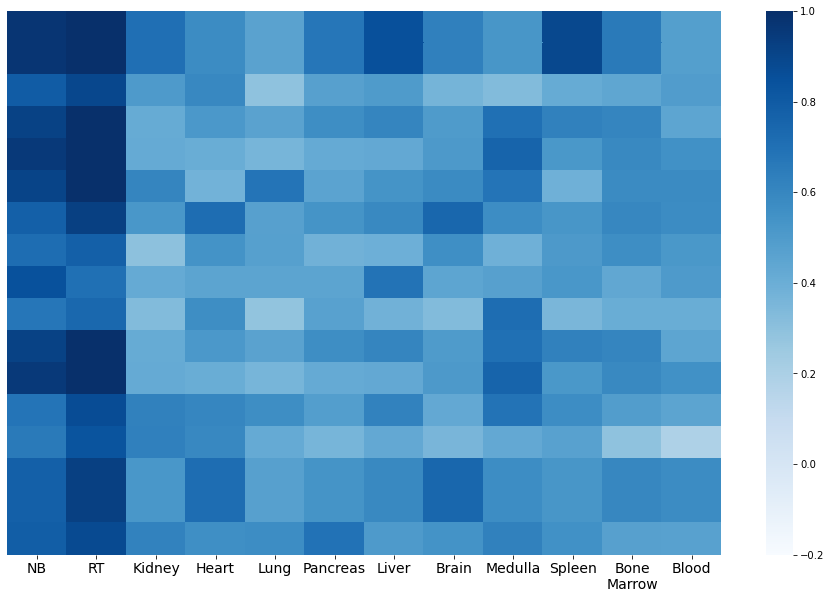

In [270]:
for n in range(13):
    print('Somatic shared '+str(n)+' tissues')
    order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
    order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
    x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
    data = df[(df['denovo_germline']==False)&(df['n_tissues']==n)&(((df['AF_t1']>0.25)&(df['AF_t2']==0))|((df['AF_t2']>0.2)&(df['AF_t1']==0))|((df['AF_t1']>0.25)&(df['AF_t2']>0.2)))].sort_values(by=order_cols2,ascending=False)
    data = data.drop_duplicates(subset=['SYMBOL','#Uploaded_variation'])
    data = data.set_index(['SYMBOL','Consequence'])
    data.index_name = ''
    data[order_cols] = data[order_cols].replace(0,-0.2)
    fig, ax = plt.subplots(figsize=(16,10)) 
    ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
    plt.xticks(fontsize=14,rotation=0)
    plt.ylabel('')
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
    print(len(data), 'mutations')
    plt.show()

In [271]:
n=12
df[(df['n_tissues']!=n)&(df['denovo_germline']==False)&(((df['AF_t1']>0.25)&(df['AF_t2']==0))|((df['AF_t1']>0.25)&(df['AF_t2']>0.2)))].sort_values(by=order_cols2,ascending=False)


CHROM        POS REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
2367   chr6   90428221  TT   -     NaN    False    indel     105.0     129.0   
572   chr14   40533139   C   A     NaN    False      snv     131.0     108.0   
1603   chr5   96434632   -   T     NaN    False    indel      85.0     108.0   
2372   chr8   17245954   A   -     NaN    False    indel     124.0     108.0   
1377   chr4    5490490   G   T     NaN    False      snv     102.0     128.0   
...     ...        ...  ..  ..     ...      ...      ...       ...       ...   
2325   chrX  147716126   G   T     NaN    False      snv     114.0     125.0   
2327   chrX  148991520   G   C     NaN    False      snv     103.0     121.0   
2328   chrX  149175566   T   A     NaN    False      snv      98.0     126.0   
2329   chrX  150107890   C   A     NaN    False      snv     149.0     110.0   
2332   chrX  152495998   C   A     NaN    False      snv     118.0     117.0   

      depth_b  ...    CF_b    CF_k   CF_l    CF_p    CF_h   CF_lu   CF_me  \
2367    127.0  ...  0.0476  0.0594  0.022  0.0228  0.0224  0.0800  0.3158   
572     123.0  ...  0.0000  0.0328  0.000  0.0186  0.0182  0.0182  0.0000   
1603    124.0  ...  0.0000  0.0194  0.000  0.0172  0.0172  0.0522  0.0000   
2372    118.0  ...  0.0000  0.0208  0.000  0.0000  0.0370  0.1334  0.1154   
1377    118.0  ...  0.0000  0.0136  0.000  0.0000  0.0170  0.0178  0.0000   
...       ...  ...     ...     ...    ...     ...     ...     ...     ...   
2325    129.0  ...  0.0000  0.0000  0.000  0.0000  0.0000  0.0000  0.0000   
2327    132.0  ...  0.0000  0.0000  0.000  0.0000  0.0000  0.0000  0.0000   
2328    115.0  ...  0.0000  0.0000  0.000  0.0000  0.0000  0.0000  0.0000   
2329    157.0  ...  0.0000  0.0000  0.000  0.0000  0.0000  0.0000  0.0000   
2332    140.0  ...  0.0000  0.0000  0.000  0.0000  0.0000  0.0000  0.0000   

        CF_s   CF_br   CF_bm  
2367  0.0354  0.1348  0.0388  
572   0.0000  0.0000  0.0000  
1603  0.0000  0.0000  0.0000  
2372  0.0000  0.1012  0.0392  
1377  0.0000  0.0208  0.0000  
...      ...     ...     ...  
2325  0.0000  0.0000  0.0000  
2327  0.0000  0.0000  0.0000  
2328  0.0000  0.0000  0.0000  
2329  0.0000  0.0000  0.0000  
2332  0.0000  0.0000  0.0000  

[817 rows x 232 columns]

In [276]:
n=12
mrt_muts_df = df[(df['n_tissues']!=n)&(df['denovo_germline']==False)&(((df['AF_t2']>0.2)&(df['AF_t1']==0))|((df['AF_t1']>0.25)&(df['AF_t2']>0.2)))].sort_values(by=order_cols2,ascending=False)
mrt_muts_df

CHROM        POS REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
2339  chr11   59412829  AA   -     NaN    False    indel      89.0     129.0   
1271   chr3   76498840   C   A     NaN    False      snv      99.0     123.0   
1336   chr3  166157976   G   C     NaN    False      snv     113.0     125.0   
1546   chr5   28294827   A   T     NaN    False      snv     101.0     135.0   
298   chr11   43149436   C   T     NaN    False      snv     113.0     152.0   
...     ...        ...  ..  ..     ...      ...      ...       ...       ...   
2211   chrX   44108243   C   T     NaN    False      snv     106.0     126.0   
2229   chrX   73356619   C   A     NaN    False      snv     113.0     116.0   
2263   chrX   98006518   G   A     NaN    False      snv     106.0     129.0   
2293   chrX  126874207   C   T     NaN    False      snv     112.0     116.0   
2317   chrX  143883363   G   A     NaN    False      snv     101.0     127.0   

      depth_b  ...  CF_b    CF_k    CF_l    CF_p    CF_h   CF_lu   CF_me  \
2339    135.0  ...   0.0  0.0186  0.0200  0.0360  0.0388  0.1166  0.2554   
1271    129.0  ...   0.0  0.0142  0.0166  0.0156  0.0512  0.0348  0.0000   
1336    112.0  ...   0.0  0.0308  0.0168  0.0138  0.0310  0.0188  0.0000   
1546    129.0  ...   0.0  0.0166  0.0176  0.0334  0.0392  0.0196  0.0000   
298     133.0  ...   0.0  0.0752  0.0170  0.0504  0.0326  0.0152  0.0000   
...       ...  ...   ...     ...     ...     ...     ...     ...     ...   
2211    144.0  ...   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2229    141.0  ...   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2263    130.0  ...   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2293    127.0  ...   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2317    139.0  ...   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

      CF_s   CF_br   CF_bm  
2339   0.0  0.0732  0.0624  
1271   0.0  0.0304  0.0000  
1336   0.0  0.0202  0.0000  
1546   0.0  0.0000  0.0126  
298    0.0  0.0000  0.0000  
...    ...     ...     ...  
2211   0.0  0.0000  0.0000  
2229   0.0  0.0000  0.0000  
2263   0.0  0.0000  0.0000  
2293   0.0  0.0000  0.0000  
2317   0.0  0.0000  0.0000  

[1304 rows x 232 columns]

In [279]:
mrt_muts_df.to_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/mrt_muts_clonal.tsv.gz',index=None,sep='\t',compression='gzip')

In [86]:
n=12
df[(df['n_tissues']!=n)&(df['denovo_germline']==False)&(((df['AF_t1']>0.25)&(df['AF_t2']>0.2)))].sort_values(by=order_cols2,ascending=False)


Empty DataFrame
Columns: [CHROM, POS, REF, ALT, _merge, parents, mut_type, depth_t1, depth_t2, depth_b, depth_k, depth_l, depth_p, depth_h, depth_lu, depth_me, depth_s, depth_br, depth_bm, filter_depth_t1, filter_depth_t2, filter_depth_b, filter_depth_k, filter_depth_l, filter_depth_p, filter_depth_h, filter_depth_lu, filter_depth_me, filter_depth_s, filter_depth_br, filter_depth_bm, filter_depth_all, AF_t1, ref_reads_t1, alt_reads_t1, DP_t1, AF_t2, ref_reads_t2, alt_reads_t2, DP_t2, AF_b, ref_reads_b, alt_reads_b, DP_b, AF_k, ref_reads_k, alt_reads_k, DP_k, AF_l, ref_reads_l, alt_reads_l, DP_l, AF_p, ref_reads_p, alt_reads_p, DP_p, AF_h, ref_reads_h, alt_reads_h, DP_h, AF_lu, ref_reads_lu, alt_reads_lu, DP_lu, AF_me, ref_reads_me, alt_reads_me, DP_me, AF_s, ref_reads_s, alt_reads_s, DP_s, AF_br, ref_reads_br, alt_reads_br, DP_br, AF_bm, ref_reads_bm, alt_reads_bm, DP_bm, AF_m, ref_reads_m, alt_reads_m, DP_m, AF_f, ref_reads_f, alt_reads_f, DP_f, tumor1, tumor2, blood, kidney, liver, pancreas, heart, lung, medulla, spleen, brain, bma, ...]
Index: []

[0 rows x 232 columns]

## Replace subclonal vaf by 0

In [151]:
af_cols = ['AF'+suffixes_dict[sample] for sample in suffixes_dict.keys()]

def remove_subclonal(af,threshold):
    if af <= threshold:
        return 0
    else:
        return af

df1 = df.copy()
df1['AF_t1'] = df1['AF_t1'].progress_apply(lambda af: remove_subclonal(af,0.25))
df1['AF_t2'] = df1['AF_t2'].progress_apply(lambda af: remove_subclonal(af,0.2))
df1[af_cols]

AF_t1   AF_t2    AF_b    AF_k    AF_l    AF_p    AF_h   AF_lu   AF_me  \
0     0.0000  0.3015  0.0000  0.0263  0.0000  0.0000  0.0066  0.0070  0.0000   
1     0.0000  0.3162  0.0000  0.0161  0.0000  0.0000  0.0091  0.0076  0.0000   
2     0.0000  0.2727  0.0000  0.0070  0.0060  0.0000  0.0142  0.0000  0.0000   
3     0.0000  0.3306  0.0000  0.0082  0.0000  0.0000  0.0000  0.0000  0.0000   
4     0.0000  0.2960  0.0000  0.0077  0.0071  0.0000  0.0373  0.0000  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2381  0.0000  0.2029  0.1558  0.2051  0.1905  0.1486  0.2283  0.3108  0.2391   
2382  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2383  0.3065  0.2683  0.2874  0.2614  0.2941  0.2697  0.3590  0.2361  0.2857   
2384  0.3100  0.2551  0.2347  0.3115  0.2527  0.3474  0.2816  0.2844  0.3137   
2385  0.0000  0.2093  0.1951  0.1742  0.1652  0.1984  0.2083  0.1009  0.0909   

        AF_s   AF_br   AF_bm  
0     0.0000  0.0000  0.0000  
1     0.0000  0.0000  0.0000  
2     0.0000  0.0066  0.0000  
3     0.0000  0.0000  0.0000  
4     0.0000  0.0000  0.0000  
...      ...     ...     ...  
2381  0.2297  0.2361  0.2024  
2382  0.2655  0.3725  0.2987  
2383  0.2655  0.3725  0.2987  
2384  0.2761  0.2712  0.2353  
2385  0.1157  0.0909  0.1000  

[2386 rows x 12 columns]

In [152]:
#re-annotate CF
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    if tissue == 'tumor1' or tissue == 'tumor2':
        df1['CF'+suffix] = df1.apply(lambda row: calculate_ccf (row,tissue,suffix),axis=1)
    else:
        df1['CF'+suffix] = df1['AF'+suffix].apply(lambda x: x*2)
df1

CHROM        POS   REF ALT  _merge  parents mut_type  depth_t1  depth_t2  \
0     chr1     865445     G   C     NaN    False      snv      81.0     136.0   
1     chr1    4101122     G   T     NaN    False      snv      81.0     117.0   
2     chr1    4352976     G   A     NaN    False      snv      73.0     121.0   
3     chr1    7591505     T   C     NaN    False      snv      75.0     121.0   
4     chr1    7983849     G   T     NaN    False      snv      76.0     125.0   
...    ...        ...   ...  ..     ...      ...      ...       ...       ...   
2381  chrX   16318693     A   -     NaN    False    indel      88.0     111.0   
2382  chrX   23394410  ACAC   -     NaN    False    indel      97.0     123.0   
2383  chrX   23394410    AC   -     NaN    False    indel      97.0     123.0   
2384  chrX   41403630  TATT   -     NaN    False    indel     132.0     125.0   
2385  chrX  153583477     T   A     NaN    False      snv     113.0     129.0   

      depth_b  ...    CF_b    CF_k    CF_l    CF_p    CF_h   CF_lu   CF_me  \
0       128.0  ...  0.0000  0.0526  0.0000  0.0000  0.0132  0.0140  0.0000   
1       134.0  ...  0.0000  0.0322  0.0000  0.0000  0.0182  0.0152  0.0000   
2       126.0  ...  0.0000  0.0140  0.0120  0.0000  0.0284  0.0000  0.0000   
3       129.0  ...  0.0000  0.0164  0.0000  0.0000  0.0000  0.0000  0.0000   
4       127.0  ...  0.0000  0.0154  0.0142  0.0000  0.0746  0.0000  0.0000   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
2381    131.0  ...  0.3116  0.4102  0.3810  0.2972  0.4566  0.6216  0.4782   
2382    121.0  ...  0.5748  0.5228  0.5882  0.5394  0.7180  0.4722  0.5714   
2383    121.0  ...  0.5748  0.5228  0.5882  0.5394  0.7180  0.4722  0.5714   
2384    130.0  ...  0.4694  0.6230  0.5054  0.6948  0.5632  0.5688  0.6274   
2385    123.0  ...  0.3902  0.3484  0.3304  0.3968  0.4166  0.2018  0.1818   

        CF_s   CF_br   CF_bm  
0     0.0000  0.0000  0.0000  
1     0.0000  0.0000  0.0000  
2     0.0000  0.0132  0.0000  
3     0.0000  0.0000  0.0000  
4     0.0000  0.0000  0.0000  
...      ...     ...     ...  
2381  0.4594  0.4722  0.4048  
2382  0.5310  0.7450  0.5974  
2383  0.5310  0.7450  0.5974  
2384  0.5522  0.5424  0.4706  
2385  0.2314  0.1818  0.2000  

[2386 rows x 232 columns]

In [153]:
#re-annotate True/False values
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    df1[tissue] = df1['AF'+suffix].apply(lambda x: True if x!=0 else False)
# re-annotate n_tissues
def count_tissues (row, tissues):
    all_tissues = []
    for tissue in tissues:
        all_tissues.append(row[tissue])
    
    return sum(all_tissues)

df1['n_tissues'] = df1.progress_apply(lambda row: count_tissues(row, tissues),axis=1)
df1[tissues+['n_tissues']]

tumor1  tumor2  blood  kidney  liver  pancreas  heart   lung  medulla  \
0      False    True  False    True  False     False   True   True    False   
1      False    True  False    True  False     False   True   True    False   
2      False    True  False    True   True     False   True  False    False   
3      False    True  False    True  False     False  False  False    False   
4      False    True  False    True   True     False   True  False    False   
...      ...     ...    ...     ...    ...       ...    ...    ...      ...   
2381   False    True   True    True   True      True   True   True     True   
2382    True    True   True    True   True      True   True   True     True   
2383    True    True   True    True   True      True   True   True     True   
2384    True    True   True    True   True      True   True   True     True   
2385   False    True   True    True   True      True   True   True     True   

      spleen  brain    bma  n_tissues  
0      False  False  False          4  
1      False  False  False          4  
2      False   True  False          5  
3      False  False  False          2  
4      False  False  False          4  
...      ...    ...    ...        ...  
2381    True   True   True         11  
2382    True   True   True         12  
2383    True   True   True         12  
2384    True   True   True         12  
2385    True   True   True         11  

[2386 rows x 13 columns]

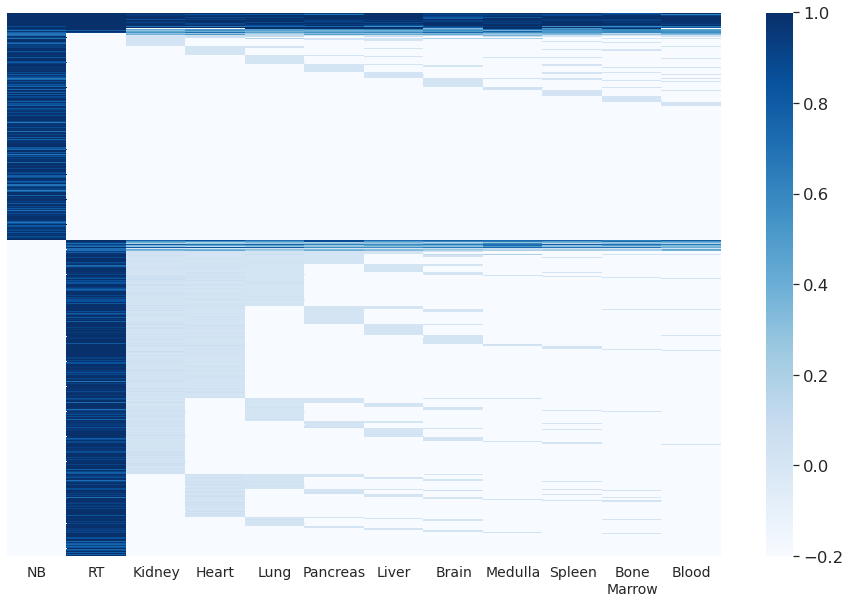

In [155]:
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df1.sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['SYMBOL','#Uploaded_variation'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
#plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
plt.show()

Mutations present in 1 tissue(s)
637 mutations


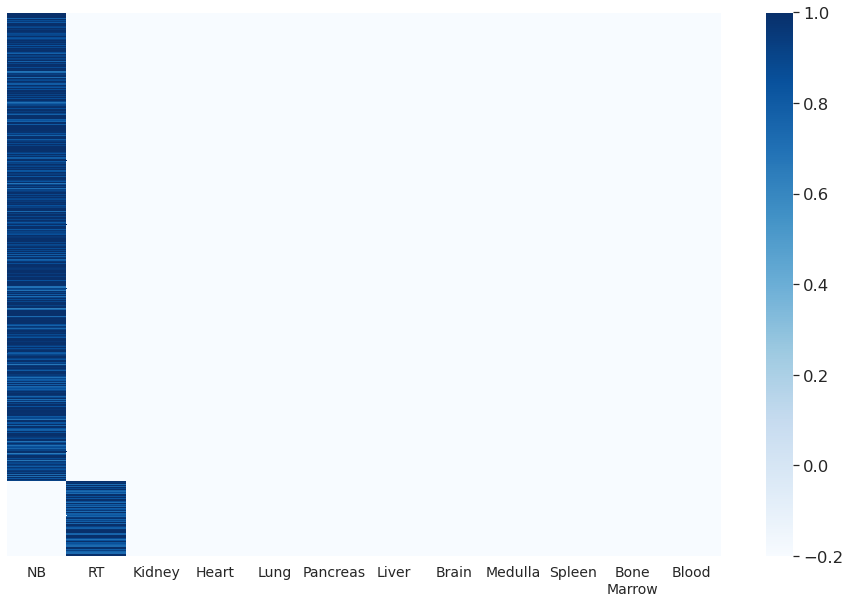

Mutations present in 2 tissue(s)
387 mutations


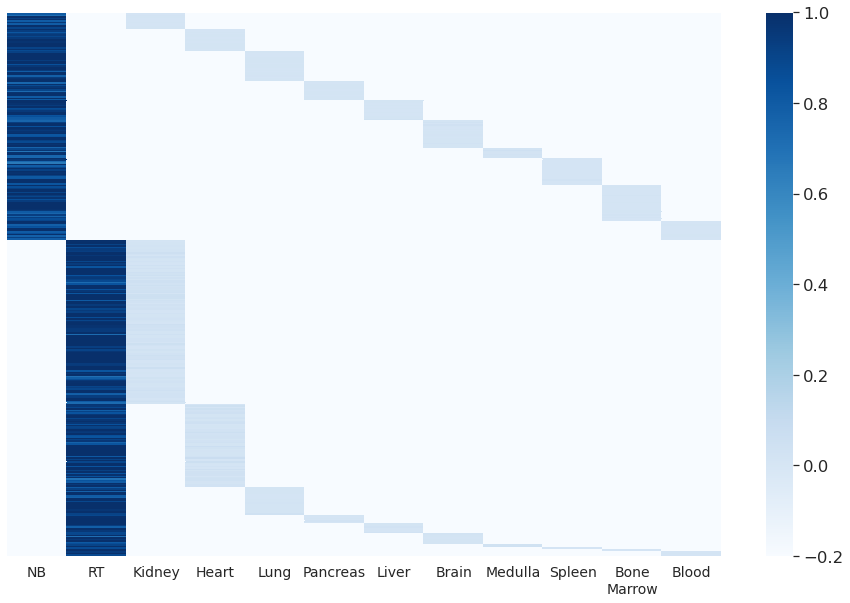

Mutations present in 3 tissue(s)
467 mutations


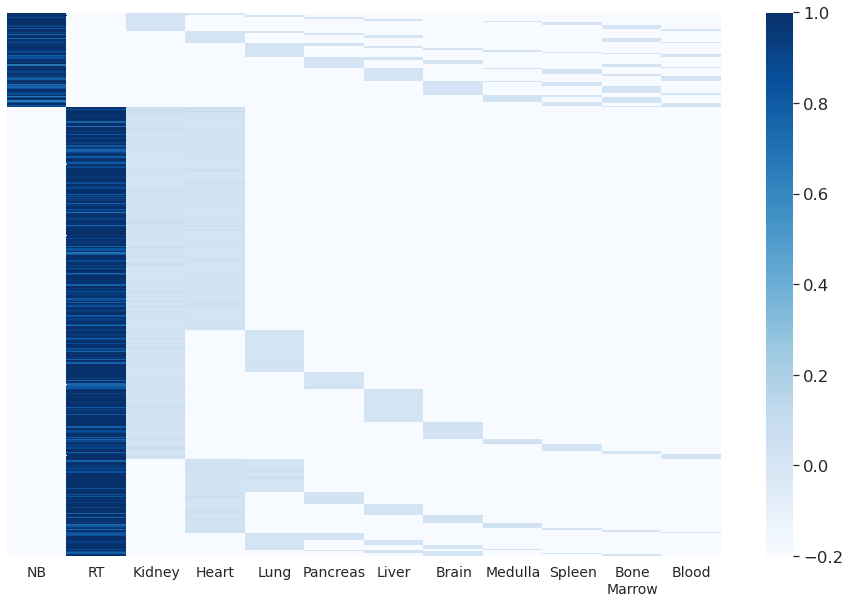

Mutations present in 4 tissue(s)
396 mutations


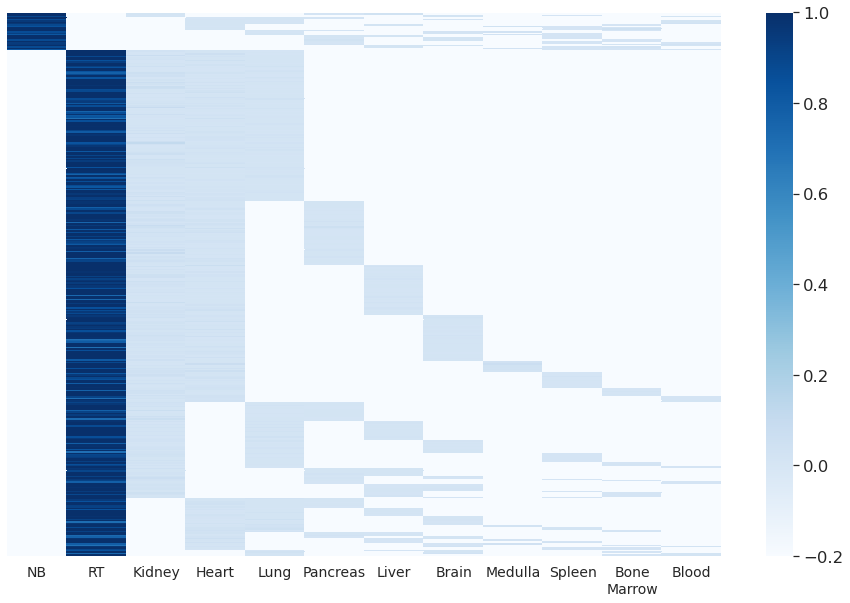

Mutations present in 5 tissue(s)
135 mutations


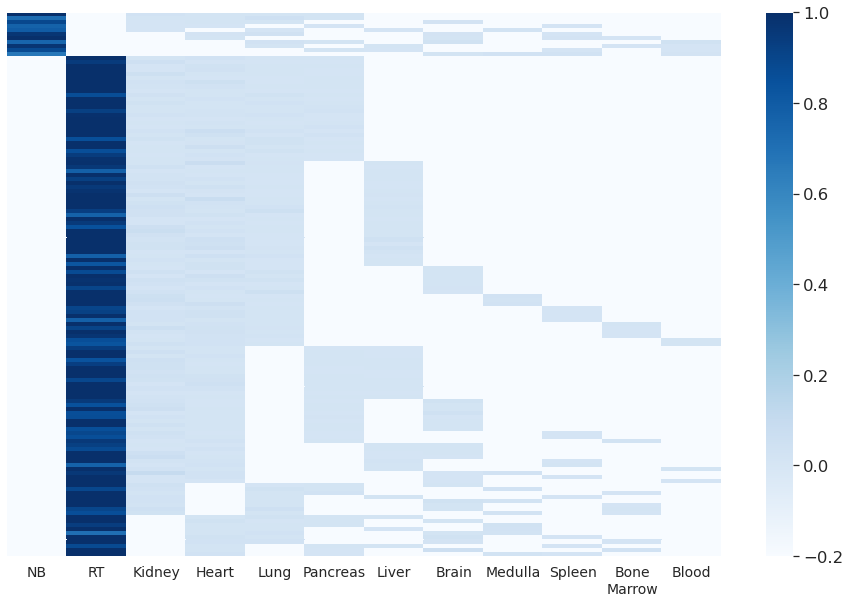

Mutations present in 6 tissue(s)
44 mutations


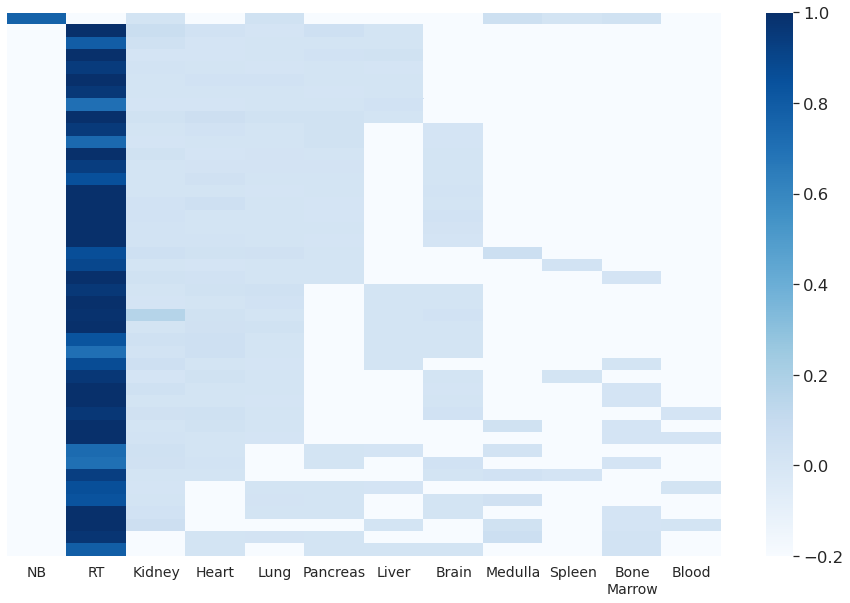

Mutations present in 7 tissue(s)
11 mutations


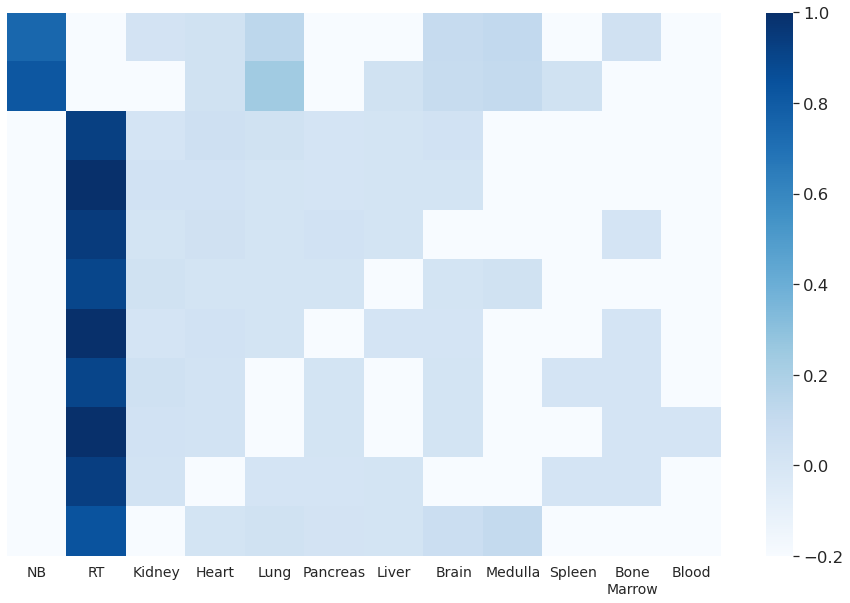

Mutations present in 8 tissue(s)
3 mutations


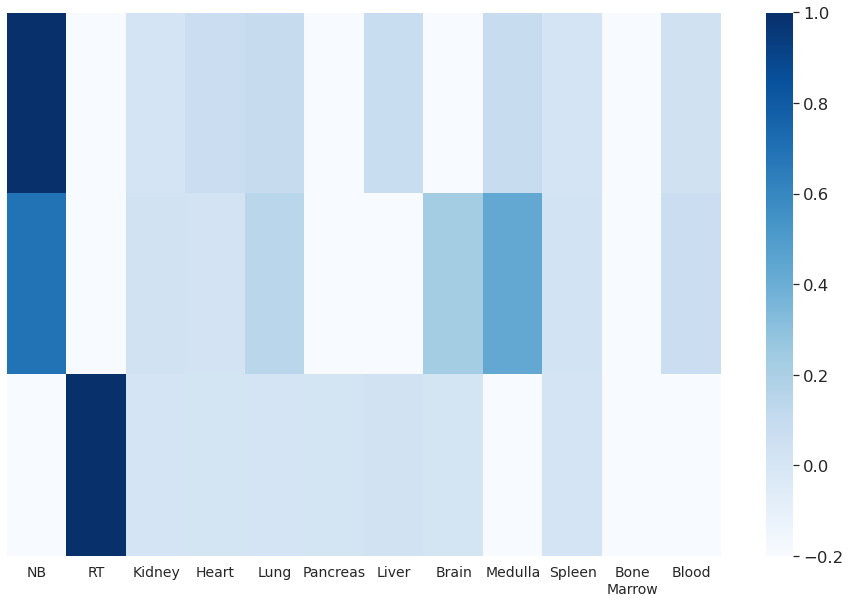

Mutations present in 9 tissue(s)
5 mutations


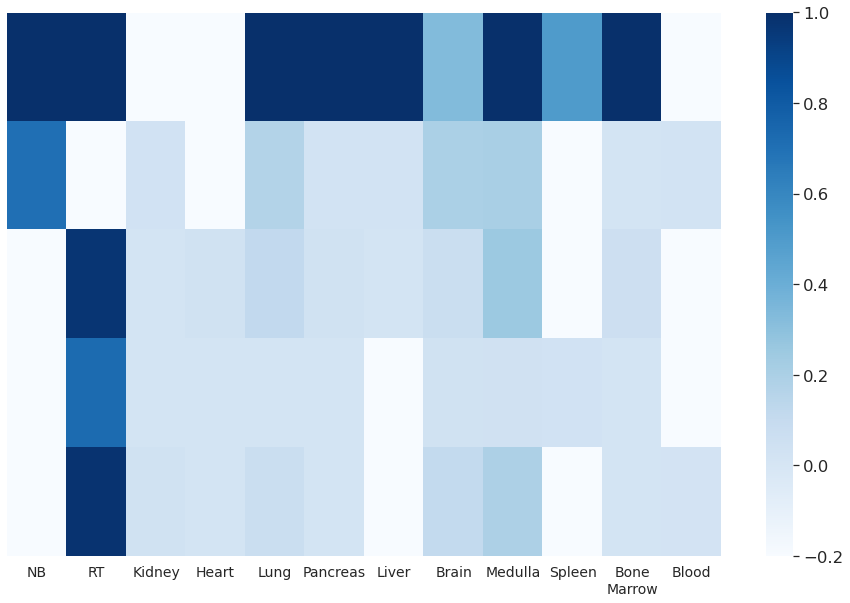

Mutations present in 10 tissue(s)
3 mutations


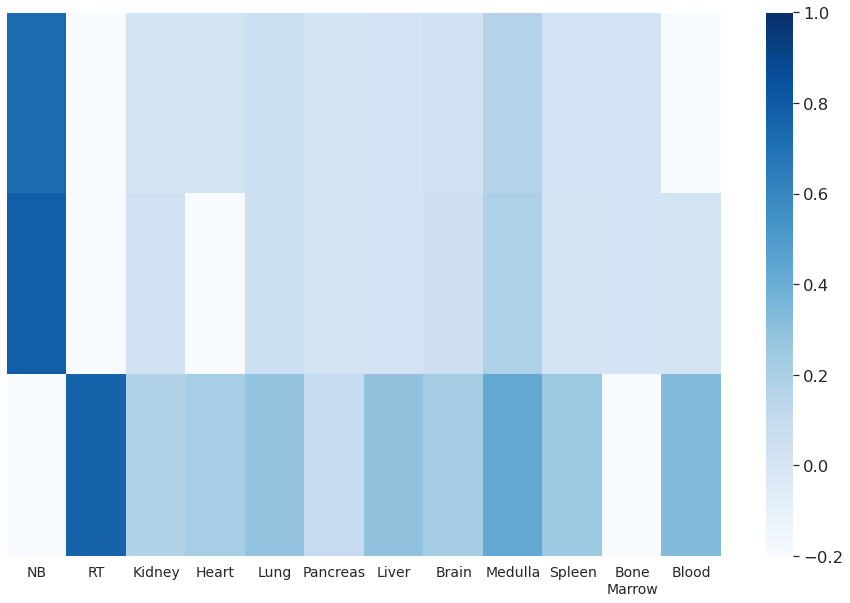

Mutations present in 11 tissue(s)
55 mutations


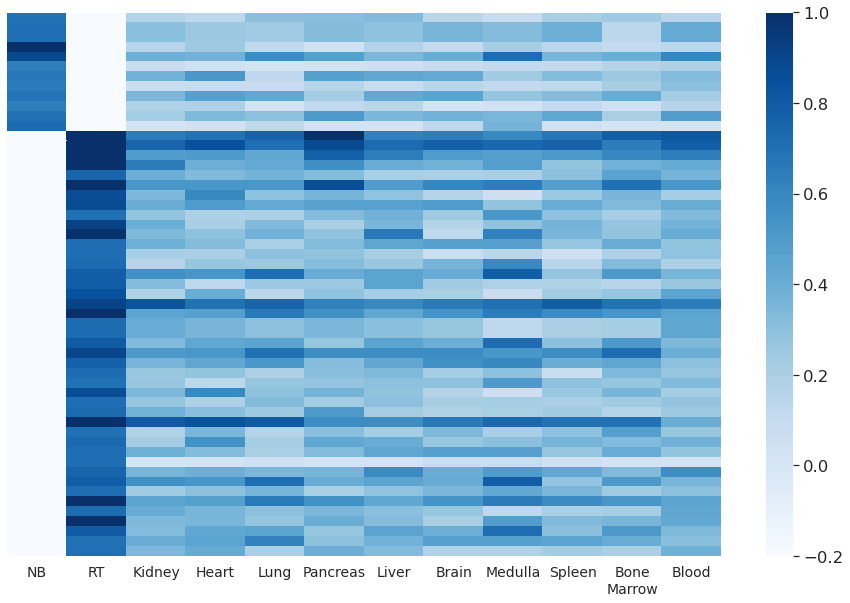

Mutations present in 12 tissue(s)
84 mutations


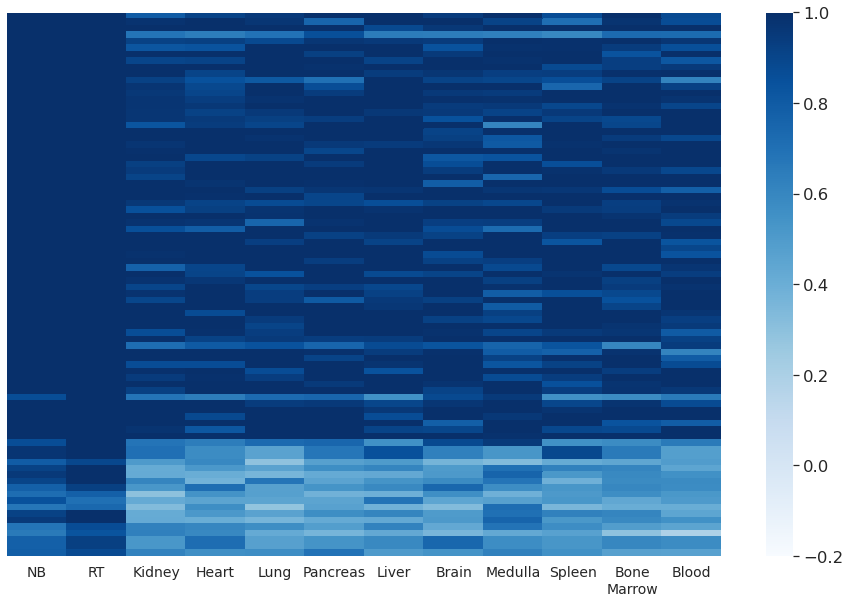

In [156]:
for n in range(1,13):
    print('Mutations present in',n,'tissue(s)')
    order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
    order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
    x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
    data = df1[df1['n_tissues']==n].sort_values(by=order_cols2,ascending=False)
    data = data.drop_duplicates(subset=['SYMBOL','#Uploaded_variation'])
    data = data.set_index(['SYMBOL','Consequence'])
    data.index_name = ''
    data[order_cols] = data[order_cols].replace(0,-0.2)
    fig, ax = plt.subplots(figsize=(16,10)) 
    ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
    plt.xticks(fontsize=14,rotation=0)
    plt.ylabel('')
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
    print(len(data), 'mutations')
    plt.show()

## Somatic shared mutations / mosaic

In [157]:
df1 = df[af_cols][(df['n_tissues']==12)&(df['denovo_germline']==False)]
print(df1['AF_b'].min(),df1['AF_b'].max(),'vaf range blood')
print(df1['AF_k'].min(),df1['AF_k'].max(),'vaf range kidney')
print(df1['AF_l'].min(),df1['AF_l'].max(),'vaf range liver')
print(df1['AF_p'].min(),df1['AF_p'].max(),'vaf range pancreas')
print(df1['AF_h'].min(),df1['AF_h'].max(),'vaf range heart')
print(df1['AF_lu'].min(),df1['AF_lu'].max(),'vaf range lung')
print(df1['AF_me'].min(),df1['AF_me'].max(),'vaf range medulla')
print(df1['AF_s'].min(),df1['AF_s'].max(),'vaf range spleen')
print(df1['AF_br'].min(),df1['AF_br'].max(),'vaf range brain')
print(df1['AF_bm'].min(),df1['AF_bm'].max(),'vaf range bone marrow')

0.0093 0.4074 vaf range blood
0.0077 0.4151 vaf range kidney
0.0103 0.4265 vaf range liver
0.0105 0.5079 vaf range pancreas
0.0086 0.4236 vaf range heart
0.0096 0.4023 vaf range lung
0.0189 0.3929 vaf range medulla
0.0198 0.4444 vaf range spleen
0.0101 0.3852 vaf range brain
0.0084 0.3904 vaf range bone marrow
